ÂêÑ„Éï„Ç°„Ç§„É´„ÅÆÊó•‰ªò„Çí„Ç≠„Éº„Å´„Åó„Å¶ÈÄ£Êê∫„Åô„Çã„ÄÇ
„Äåregi_acc_get_data_transform.csv„Äç„Å´„ÅØ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÅåÂê´„Åæ„Çå„Å¶„ÅÑ„Çã„Åü„ÇÅ„ÄÅ„Åì„ÅÆÊåáÊ®ô„ÇíÁõÆÁöÑÂ§âÊï∞„Å®„Åó„Å¶Áî®„ÅÑ„Å¶„ÄÅÊñ∞Ë¶èÈ°ßÂÆ¢„ÅÆÁç≤ÂæóÁä∂Ê≥Å„ÇíË©ï‰æ°„Åó„ÄÅ„Åï„Åæ„Åñ„Åæ„Å™Â§ñÈÉ®Ë¶ÅÂõ†ÔºàÁ•ùÊó•„ÄÅÁâπÂÆö„ÅÆÈÄ±„ÄÅCM„ÅÆÊîæÊò†ÊúâÁÑ°„Å™„Å©Ôºâ„Åå„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Å´„Å©„ÅÆ„Çà„ÅÜ„Å™ÂΩ±Èüø„Çí‰∏é„Åà„Çã„Åã„ÇíÂàÜÊûê„Åô„Çã„ÄÇ

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import xgboost as xgb
import shap
from google.colab import drive
from functools import reduce # Import reduce from functools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

!pip install optuna
import optuna

#ÊñáÂ≠óÂåñ„Åë„Åõ„Åö„Å´Êó•Êú¨Ë™ûË°®Á§∫„Åï„Åõ„Çã
!apt-get -y install fonts-ipafont-gothic
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'IPAPGothic'  # ‚Üê„Åì„Çå„ÅåË∂ÖÈáçË¶ÅÔºÅ


In [23]:
!apt-get -y install fonts-ipafont-gothic


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
calendar_data - Ê¨†ÊêçÂÄ§„ÅÆÊï∞:
cdr_date                     0
dow                          0
dow_name                     0
woy                          0
wom                          0
doy                          0
financial_year               0
day_before_holiday_flag      0
holiday_flag                 0
holiday_name               632
dtype: int64

cm_data - Ê¨†ÊêçÂÄ§„ÅÆÊï∞:
cdr_date    0
cm_flg      0
dtype: int64

gt_service_name - Ê¨†ÊêçÂÄ§„ÅÆÊï∞:
cdr_date      0
search_cnt    0
dtype: int64

regi_acc_get_data_transform - Ê¨†ÊêçÂÄ§„ÅÆÊï∞:
cdr_date       0
acc_get_cnt    0
dtype: int64

regi_call_data_transform - Ê¨†ÊêçÂÄ§„ÅÆÊï∞:
cdr_date    0
call_num    0
dtype: int64

calendar_data - Missing values in 'cdr_date': 0
cm_data - Missing values in 'cdr_date': 0
gt_service_name - Missing values in 'cdr_date': 0
regi_acc_get_data_transform - Missing value

/tmp/ipython-input-2592693962.py:82: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data['dow_name_encoded'] = merged_data['dow_name'].replace(dow_map)


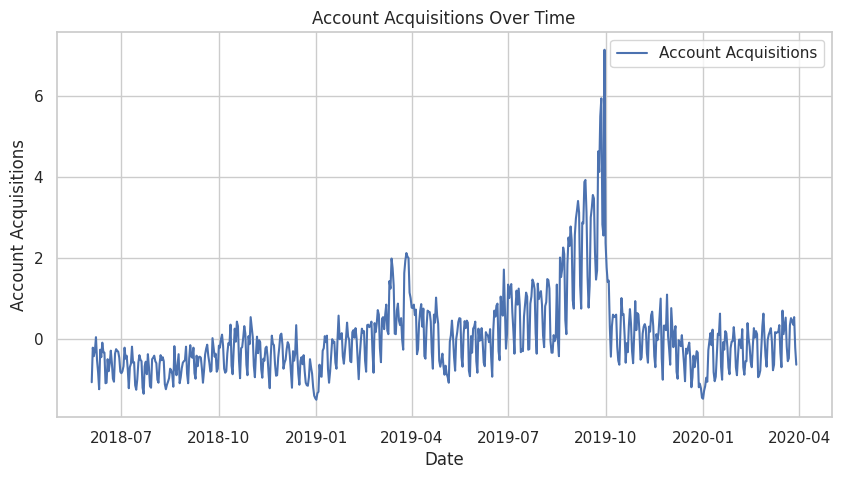

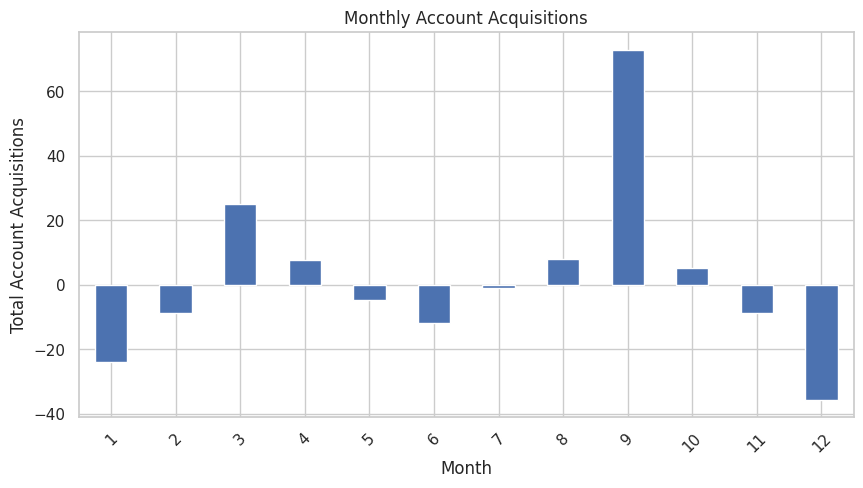

/tmp/ipython-input-2592693962.py:119: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([campaign_acquisitions, non_campaign_acquisitions], labels=['Campaign Days', 'Non-Campaign Days'])


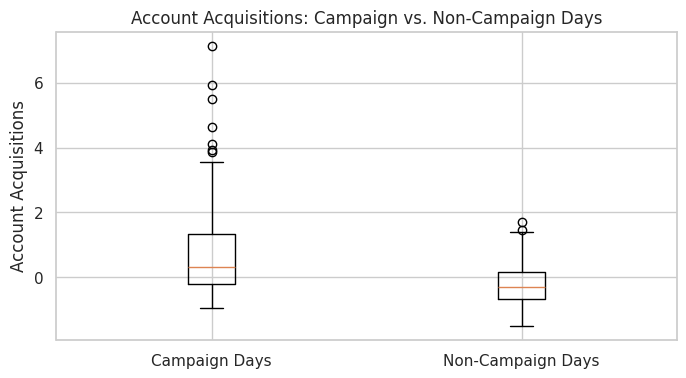

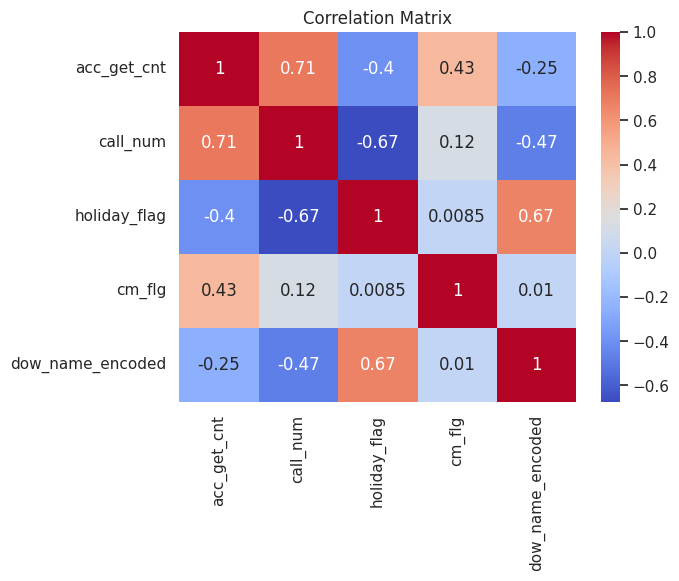

In [7]:


# „Éâ„É©„Ç§„Éñ„ÅÆ„Éû„Ç¶„É≥„Éà
drive.mount('/content/drive')

# Seaborn„ÅÆ„Çπ„Çø„Ç§„É´Ë®≠ÂÆö
sns.set(style="whitegrid")

# „Éï„Ç°„Ç§„É´„Éë„Çπ„Å®„Éá„Éº„Çø„Çª„ÉÉ„ÉàÂêç
paths = [
    '/content/drive/MyDrive/GCI/GCIÊúÄÁµÇË™≤È°åAirREGI/AirREGI/calender_data.csv',
    '/content/drive/MyDrive/GCI/GCIÊúÄÁµÇË™≤È°åAirREGI/AirREGI/cm_data.csv',
    '/content/drive/MyDrive/GCI/GCIÊúÄÁµÇË™≤È°åAirREGI/AirREGI/gt_service_name.csv',
    '/content/drive/MyDrive/GCI/GCIÊúÄÁµÇË™≤È°åAirREGI/AirREGI/regi_acc_get_data_transform.csv',
    '/content/drive/MyDrive/GCI/GCIÊúÄÁµÇË™≤È°åAirREGI/AirREGI/regi_call_data_transform.csv'
]
dataset_names = ['calendar_data', 'cm_data', 'gt_service_name', 'regi_acc_get_data_transform', 'regi_call_data_transform']

# „Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø
datasets = {name: pd.read_csv(path) for name, path in zip(dataset_names, paths)}

# Êó•‰ªò„Ç´„É©„É†„ÅÆÁµ±‰∏ÄÂá¶ÁêÜ
for name, df in datasets.items():
    if 'cdr_date' in df.columns or 'week' in df.columns:
        date_col = 'cdr_date' if 'cdr_date' in df.columns else 'week'
        df.rename(columns={date_col: 'cdr_date'}, inplace=True)
        df['cdr_date'] = pd.to_datetime(df['cdr_date'])

# Ê¨†ÊêçÂÄ§„ÅÆÁ¢∫Ë™ç
for name, df in datasets.items():
    print(f"{name} - Ê¨†ÊêçÂÄ§„ÅÆÊï∞:\n{df.isnull().sum()}\n")

# calendar_data „ÅÆÊ¨†ÊêçÂÄ§Âá¶ÁêÜ
calendar_data = datasets['calendar_data']
calendar_data['holiday_name'] = calendar_data['holiday_name'].fillna(
    calendar_data['holiday_flag'].map({True: 'Public Holiday', False: 'No Holiday'})
)
datasets['calendar_data'] = calendar_data  # ‰øÆÊ≠£„Åó„Åü„Éá„Éº„Çø„ÇíÂÜçÊ†ºÁ¥ç

# „Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Éá„Éº„Çø„ÅÆ„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞Ôºàholiday_nameÔºâ
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse „Çí sparse_output „Å´ÁΩÆ„ÅçÊèõ„Åà„Çã
holiday_name_onehot = onehot.fit_transform(calendar_data[['holiday_name']])
holiday_name_cols = onehot.get_feature_names_out(['holiday_name'])
holiday_name_df = pd.DataFrame(holiday_name_onehot, columns=holiday_name_cols, index=calendar_data.index)
calendar_data = pd.concat([calendar_data, holiday_name_df], axis=1)


# „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÁµ±Âêà
data_frames = [calendar_data, datasets['cm_data'], datasets['gt_service_name'],
               datasets['regi_acc_get_data_transform'], datasets['regi_call_data_transform']]
merged_data = reduce(lambda left, right: pd.merge(left, right, on='cdr_date', how='outer'), data_frames)

for name, df in datasets.items():
    if 'cdr_date' in df.columns:
        print(f"{name} - Missing values in 'cdr_date': {df['cdr_date'].isna().sum()}")
    else:
        print(f"{name} - 'cdr_date' column is missing.")



# Áµ±ÂêàÂæå„ÅÆÊ¨†ÊêçÂÄ§Âá¶ÁêÜ
merged_data.fillna({
    'holiday_flag': 0,
    'cm_flg': 0,
    'call_num': 0,
    'acc_get_cnt': merged_data['acc_get_cnt'].median()
}, inplace=True)



# Êó•‰ªò„Éï„Ç£„É´„Çø„É™„É≥„Ç∞
start_date = '2018-06-03'
end_date = '2020-03-29'
merged_data = merged_data[(merged_data['cdr_date'] >= start_date) & (merged_data['cdr_date'] <= end_date)]

print(f"Before filtering: {len(merged_data)} rows")
merged_data = merged_data[(merged_data['cdr_date'] >= start_date) & (merged_data['cdr_date'] <= end_date)]
print(f"After filtering: {len(merged_data)} rows")



# ÊõúÊó•„Ç®„É≥„Ç≥„Éº„Éâ
dow_map = {'Êúà': 0, 'ÁÅ´': 1, 'Ê∞¥': 2, 'Êú®': 3, 'Èáë': 4, 'Âúü': 5, 'Êó•': 6}
merged_data['dow_name_encoded'] = merged_data['dow_name'].replace(dow_map)

if 'dow_name' in merged_data.columns:
    print(f"Unique values in 'dow_name': {merged_data['dow_name'].unique()}")
else:
    print("Error: 'dow_name' column is missing.")


# acc_get_cnt „ÅÆÊôÇÁ≥ªÂàó„Éó„É≠„ÉÉ„Éà
plt.figure(figsize=(10, 5))
plt.plot(merged_data['cdr_date'], merged_data['acc_get_cnt'], label='Account Acquisitions')
plt.title('Account Acquisitions Over Time')
plt.xlabel('Date')
plt.ylabel('Account Acquisitions')
plt.legend()
plt.grid(True)
plt.show()


# ÊúàÂà•„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Éó„É≠„ÉÉ„Éà
# 'month' Âàó„Çí‰ΩúÊàê
merged_data['month'] = merged_data['cdr_date'].dt.month
monthly_acquisitions = merged_data.groupby('month')['acc_get_cnt'].sum()
plt.figure(figsize=(10, 5))
monthly_acquisitions.plot(kind='bar')
plt.title('Monthly Account Acquisitions')
plt.xlabel('Month')
plt.ylabel('Total Account Acquisitions')
plt.xticks(rotation=45)
plt.show()



# „Ç≠„É£„É≥„Éö„Éº„É≥Êó• vs Èùû„Ç≠„É£„É≥„Éö„Éº„É≥Êó•„ÅÆ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞ÊØîËºÉ
campaign_acquisitions = merged_data[merged_data['cm_flg'] == 1]['acc_get_cnt']
non_campaign_acquisitions = merged_data[merged_data['cm_flg'] == 0]['acc_get_cnt']
plt.figure(figsize=(8, 4))
plt.boxplot([campaign_acquisitions, non_campaign_acquisitions], labels=['Campaign Days', 'Non-Campaign Days'])
plt.title('Account Acquisitions: Campaign vs. Non-Campaign Days')
plt.ylabel('Account Acquisitions')
plt.show()

# ÁâπÂæ¥Èáè„Å®ÁõÆÁöÑÂ§âÊï∞„ÅÆÁõ∏Èñ¢ÂàÜÊûê
correlation = merged_data[['acc_get_cnt', 'call_num', 'holiday_flag', 'cm_flg', 'dow_name_encoded']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# „Éá„Éº„Çø„ÅÆ‰øùÂ≠ò
merged_data.to_csv('merged_data.csv', index=False)


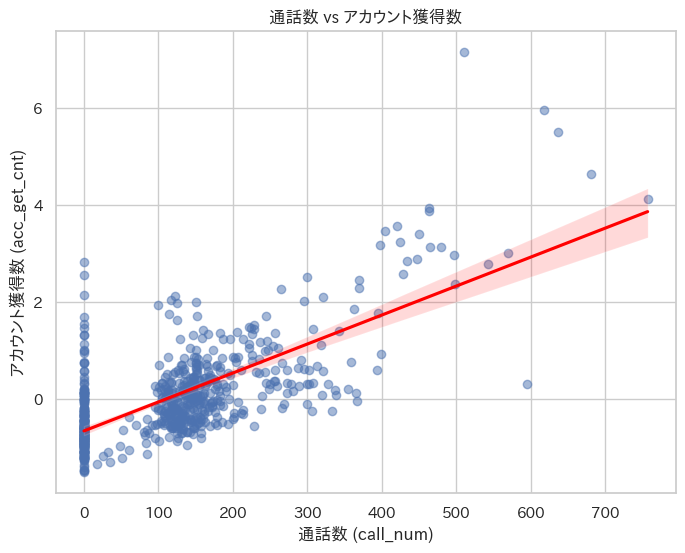

In [26]:

plt.figure(figsize=(8,6))
sns.regplot(x='call_num', y='acc_get_cnt', data=merged_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('ÈÄöË©±Êï∞ vs „Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞')
plt.xlabel('ÈÄöË©±Êï∞ (call_num)')
plt.ylabel('„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞ (acc_get_cnt)')
plt.show()


acc_get_cnt „Å®ÂêÑÂ§âÊï∞„ÅÆÁõ∏Èñ¢

Ôºë„ÄÅÈÄöË©±Êï∞„ÅåÂ¢ó„Åà„Çã„Å®„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÇÇÂ¢ó„Åà„ÇãÂÇæÂêë„ÄÇÈùûÂ∏∏„Å´ÈáçË¶Å„Å™ÁâπÂæ¥Èáè

Ôºí„ÄÅholiday_flagÔºàÁ•ùÊó•„Éï„É©„Ç∞Ôºâ: -0.4

Ë≤†„ÅÆÁõ∏Èñ¢„ÅåË¶ã„Çâ„Çå„ÄÅÁ•ùÊó•„Åß„ÅÇ„Çã„Å®„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÅåÊ∏õÂ∞ë„Åô„ÇãÂÇæÂêë„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ
„Åì„Çå„ÅØ„Éì„Ç∏„Éç„ÇπÁâπÊÄßÔºàÁ•ùÊó•„ÅØ‰ºÅÊ•≠Ê¥ªÂãï„ÅåÂ∞ë„Å™„ÅÑÔºâ„Å´Âü∫„Å•„ÅèÂèØËÉΩÊÄß„ÅåÈ´ò„ÅÑ

Ôºì„ÄÅcm_flgÔºàCMÊîæÈÄÅ„Éï„É©„Ç∞Ôºâ: 0.43

‰∏≠Á®ãÂ∫¶„ÅÆÊ≠£„ÅÆÁõ∏Èñ¢„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ
CMÊîæÈÄÅ„Åå„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Å´‰∏ÄÂÆö„ÅÆÂΩ±Èüø„Çí‰∏é„Åà„Çã

call_numÔºàÈÄöË©±Êï∞Ôºâ„Å®‰ªñ„ÅÆÂ§âÊï∞„ÅÆÁõ∏Èñ¢

Ôºë„ÄÅÈÄöË©±Êï∞„ÅØÁ•ùÊó•„Å´„ÅØÂ§ß„Åç„ÅèÊ∏õÂ∞ë„Åô„Çã

Ôºí„ÄÅcm_flg: 0.12

ÈÄöË©±Êï∞„Å´ÂØæ„Åô„ÇãCMÊîæÈÄÅ„ÅÆÂΩ±Èüø„ÅØÂº±„ÅÑ

dow_name_encoded: -0.47

ÊõúÊó•„Å´„Çà„ÇãÈÄöË©±Êï∞„ÅÆÂ§âÂãï„Åå‰∏≠Á®ãÂ∫¶„Å´Ë¶≥ÂØü„Åï„Çå„Åæ„Åô„ÄÇ





** „Éì„Ç∏„Éç„Çπ„Ç§„É≥„Çµ„Ç§„Éà**

ÈÄöË©±Êï∞„Åå„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Å´Âº∑„ÅÑÂΩ±Èüø„Çí‰∏é„Åà„Å¶„ÅÑ„Çã:

„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÇíÂ¢óÂä†„Åï„Åõ„Çã„Å´„ÅØ„ÄÅÈÄöË©±Êï∞„ÇíÂ¢ó„ÇÑ„ÅôÊñΩÁ≠ñÔºà‰æã„Åà„Å∞„ÄÅÁâπÂÆö„ÅÆÊõúÊó•„ÇÑÊôÇÈñìÂ∏Ø„Å´ÂäπÁéáÁöÑ„Å™Âñ∂Ê•≠Ê¥ªÂãï„ÇíË°å„ÅÜÔºâ„ÅåÊúâÂäπ„Åß„Åô„ÄÇ

Á•ùÊó•„Åå„Éç„Ç¨„ÉÜ„Ç£„Éñ„Å´‰ΩúÁî®„Åô„Çã:

Á•ùÊó•„Å´„ÅØÂñ∂Ê•≠Ê¥ªÂãï„Åå‰Ωé‰∏ã„Åô„Çã„Åü„ÇÅ„ÄÅÂà•„ÅÆ„Ç¢„Éó„É≠„Éº„ÉÅÔºà„Ç™„É≥„É©„Ç§„É≥„Ç≠„É£„É≥„Éö„Éº„É≥„Å™„Å©Ôºâ„ÇíÊ§úË®é„Åô„Çã‰æ°ÂÄ§„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

CMÊîæÈÄÅ„ÅØ‰∏≠Á®ãÂ∫¶„ÅÆÂäπÊûú„Åå„ÅÇ„Çã:

CMÊîæÈÄÅ„ÅåÁõ¥Êé•ÁöÑ„Å´„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÇíÂ¢óÂä†„Åï„Åõ„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çä„Åæ„Åô„Åå„ÄÅ„Åù„ÅÆÂäπÊûú„ÇíÊúÄÂ§ßÂåñ„Åô„Çã„Å´„ÅØ„ÄÅÁ•ùÊó•„ÇÑÁâπÂÆö„ÅÆÊõúÊó•„Å®„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„ÇíÊ§úË®é„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

In [9]:
print("Preview of merged_data:")
print(merged_data.head())
print("Columns in merged_data:", merged_data.columns.tolist())


Preview of merged_data:
     cdr_date  dow dow_name   woy  wom    doy  financial_year  \
94 2018-06-03  7.0        Êó•  22.0  2.0  154.0          2018.0   
95 2018-06-04  1.0        Êúà  23.0  2.0  155.0          2018.0   
96 2018-06-05  2.0        ÁÅ´  23.0  2.0  156.0          2018.0   
97 2018-06-06  3.0        Ê∞¥  23.0  2.0  157.0          2018.0   
98 2018-06-07  4.0        Êú®  23.0  2.0  158.0          2018.0   

   day_before_holiday_flag holiday_flag    holiday_name  ...  \
94                   False         True  Public Holiday  ...   
95                   False        False      No Holiday  ...   
96                   False        False      No Holiday  ...   
97                   False        False      No Holiday  ...   
98                   False        False      No Holiday  ...   

    holiday_name_Êò•ÂàÜ„ÅÆÊó•  holiday_name_Êò≠Âíå„ÅÆÊó•  holiday_name_Êµ∑„ÅÆÊó•  holiday_name_ÁßãÂàÜ„ÅÆÊó•  \
94                0.0                0.0               0.0                0.0  

ÊõúÊó•„Åî„Å®ÈÄöË©±Êï∞„ÅÆÊØîËºÉ:

In [10]:
print("Preview of merged_data:")
print(merged_data.head())

print("Unique values in dow_name:")
print(merged_data['dow_name'].unique())

print("Unique values in cm_flg:")
print(merged_data['cm_flg'].unique())


Preview of merged_data:
     cdr_date  dow dow_name   woy  wom    doy  financial_year  \
94 2018-06-03  7.0        Êó•  22.0  2.0  154.0          2018.0   
95 2018-06-04  1.0        Êúà  23.0  2.0  155.0          2018.0   
96 2018-06-05  2.0        ÁÅ´  23.0  2.0  156.0          2018.0   
97 2018-06-06  3.0        Ê∞¥  23.0  2.0  157.0          2018.0   
98 2018-06-07  4.0        Êú®  23.0  2.0  158.0          2018.0   

   day_before_holiday_flag holiday_flag    holiday_name  ...  \
94                   False         True  Public Holiday  ...   
95                   False        False      No Holiday  ...   
96                   False        False      No Holiday  ...   
97                   False        False      No Holiday  ...   
98                   False        False      No Holiday  ...   

    holiday_name_Êò•ÂàÜ„ÅÆÊó•  holiday_name_Êò≠Âíå„ÅÆÊó•  holiday_name_Êµ∑„ÅÆÊó•  holiday_name_ÁßãÂàÜ„ÅÆÊó•  \
94                0.0                0.0               0.0                0.0  

In [11]:
# ÊõúÊó•Âêç„ÇíÁîüÊàê
merged_data['dow_name'] = merged_data['cdr_date'].dt.day_name()

# ÊõúÊó•„ÅÆÈ†ÜÂ∫è„ÇíÊåáÂÆö
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# ÊõúÊó•„Çí„Ç´„ÉÜ„Ç¥„É™Âûã„Å´Ë®≠ÂÆö
merged_data['dow_name'] = pd.Categorical(merged_data['dow_name'], categories=weekday_order, ordered=True)

# `cm_flg` „ÅÆÊ¨†ÊêçÂÄ§„ÇíÁ¢∫Ë™ç„Åó„ÄÅÂá¶ÁêÜ„Åô„Çã
if merged_data['cm_flg'].isnull().sum() > 0:
    merged_data['cm_flg'].fillna(0, inplace=True)  # ÂøÖË¶Å„Å™„ÇâË£úÂÆå

# „Éá„Éº„Çø„ÅåÁ©∫„Åß„Å™„ÅÑ„ÅãÁ¢∫Ë™ç
if merged_data.empty:
    print("Error: Merged data is empty after preprocessing.")
else:
    print(f"Merged data contains {len(merged_data)} rows.")

# `call_num` „ÅÆÊ¨†ÊêçÂÄ§„ÇíÁ¢∫Ë™ç
if merged_data['call_num'].isnull().sum() > 0:
    merged_data['call_num'].fillna(0, inplace=True)  # ÂøÖË¶Å„Å™„ÇâË£úÂÆå


Merged data contains 666 rows.


/tmp/ipython-input-3860205411.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_comparison = merged_data.groupby(['dow_name', 'cm_flg'])['acc_get_cnt'].mean().unstack()


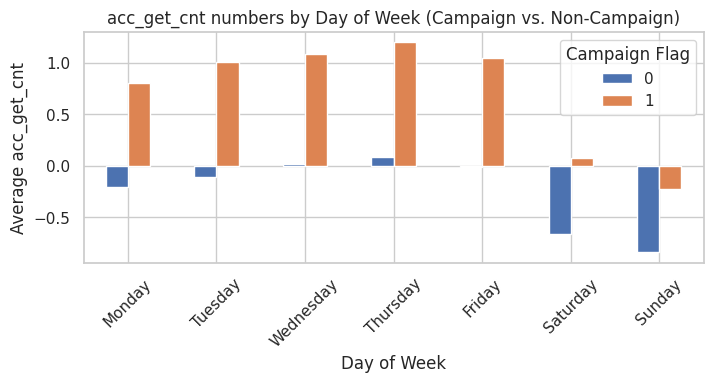

In [12]:
# ÁõÆÁöÑ: ÊõúÊó•Ôºàdow_nameÔºâ„Å®„Ç≠„É£„É≥„Éö„Éº„É≥„Éï„É©„Ç∞Ôºàcm_flgÔºâ„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åå„ÄÅ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Å´‰∏é„Åà„ÇãÂΩ±Èüø„ÇíÂàÜÊûê

# ÊõúÊó•„ÅÆÈ†ÜÂ∫è„ÇíÊåáÂÆö
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# ÊõúÊó•„Çí„Ç´„ÉÜ„Ç¥„É™Âûã„Å´Ë®≠ÂÆö
merged_data['dow_name'] = pd.Categorical(merged_data['dow_name'], categories=weekday_order, ordered=True)

# „Ç∞„É´„Éº„ÉóÂåñ„Å®„Éó„É≠„ÉÉ„Éà
weekday_comparison = merged_data.groupby(['dow_name', 'cm_flg'])['acc_get_cnt'].mean().unstack()
weekday_comparison.plot(kind='bar', figsize=(8, 3))
plt.title('acc_get_cnt numbers by Day of Week (Campaign vs. Non-Campaign)')
plt.xlabel('Day of Week')
plt.ylabel('Average acc_get_cnt')
plt.xticks(rotation=45)
plt.legend(title='Campaign Flag')
plt.show()


„Äå„Å©„ÅÆÊõúÊó•„ÉªÊù°‰ª∂‰∏ã„Åß„Ç≠„É£„É≥„Éö„Éº„É≥„ÅåÊàêÂäü„Åó„Å¶„ÅÑ„Çã„ÅãÔºü„Äç

ÁÅ´Êõú„ÄÅÊ∞¥Êõú„ÄÅÊú®Êõú„ÅåÈ°ïËëó„ÄÇ„ÄÄÂúüÊó•„ÅØ„Ç≠„É£„É≥„Éö„Éº„É≥„Åå„Åª„ÅºË°å„Çè„Çå„Å¶„ÅÑ„Å™„ÅÑ„ÅÆ„Åß„ÅØ„ÄÇ
Ê∞¥Èáë„ÅØ„Ç≠„É£„É≥„Éö„Éº„É≥„ÅåÂøÖ„ÅöË°å„Çè„Çå„Å¶„ÅÑ„Åü„ÅÆ„Åß„ÅØ„ÄÇ

In [13]:
# ‰ªÆË™¨„ÅÆÊ§úË®ºÔºöÊõúÊó•„Åî„Å®„Å´„Ç≠„É£„É≥„Éö„Éº„É≥„Éï„É©„Ç∞„ÅÆÊúâÁÑ°„ÇíÈõÜË®à
campaign_counts = merged_data.groupby(['dow_name', 'cm_flg'])['acc_get_cnt'].count().unstack()
print(campaign_counts)


/tmp/ipython-input-2159163663.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_counts = merged_data.groupby(['dow_name', 'cm_flg'])['acc_get_cnt'].count().unstack()


cm_flg      0   1
dow_name         
Monday     67  28
Tuesday    68  27
Wednesday  68  27
Thursday   67  28
Friday     65  30
Saturday   66  29
Sunday     68  28


„Ç≠„É£„É≥„Éö„Éº„É≥„Å™„Åó„ÄÄÔºê„ÄÄ„ÄÄ„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÇ„Çä„ÄÄÔºë

ÂúüÊó•„Å´„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÇ„Çä„Åå„Åù„Çå„Åû„Çå„ÄÅÔºíÔºô„ÄÅÔºíÔºò„ÅÇ„Çã„ÅÆ„Åß„ÄÅ„Ç≠„É£„É≥„Éö„Éº„É≥„ÅØË°å„Çè„Çå„Å¶„ÅÑ„Åü„ÄÇ

Ê∞¥Èáë„Åß„ÇÇ„Ç≠„É£„É≥„Éö„Éº„É≥„Å™„Åó„ÅÆÊó•„ÇÇ„ÅÇ„Å£„Åü„ÄÇ68, 65

„ÇÄ„Åó„Çç„ÄÅÊ∞¥Êõú„ÉªÈáëÊõú„ÅÆ„Ç≠„É£„É≥„Éö„Éº„É≥ÂÆüÊñΩÁéá„ÅØ‰ªñ„ÅÆÂπ≥Êó•„Å®Âêå„ÅòÁ®ãÂ∫¶

**üåªÂπ≥Êó•„Å®ÊØîËºÉ„Åó„Å¶„ÄÅÂúüÊó•„Åß„ÅÆ„Ç≠„É£„É≥„Éö„Éº„É≥ÂäπÊûú„ÅØÂ∞è„Åï„ÅÑ„Åü„ÇÅ„ÄÅ‰ªäÂæå„ÅÆÊñΩÁ≠ñ„Å®„Åó„Å¶„ÄÅÂúüÊó•„ÅÆ„É™„ÇΩ„Éº„ÇπÈÖçÂàÜ„ÇÑ‰ª£ÊõøÊñΩÁ≠ñÔºà‰æã: „Ç™„É≥„É©„Ç§„É≥„Éû„Éº„Ç±„ÉÜ„Ç£„É≥„Ç∞Ôºâ„ÅÆÊ§úË®é„ÅåÂøÖË¶Å„Åß„Åô„ÄÇ**

In [14]:
# print(merged_data.columns)  # ÂøÖË¶Å„Å™Âàó„ÅåÂ≠òÂú®„Åô„Çã„ÅãÁ¢∫Ë™ç
# print(merged_data[['dow_name', 'cm_flg', 'call_num']].head())  # „Çµ„É≥„Éó„É´„Éá„Éº„ÇøÁ¢∫Ë™ç


In [15]:
# print(merged_data['dow_name'].unique())  # ÊõúÊó•„ÅÆ„É¶„Éã„Éº„ÇØÂÄ§„ÇíÁ¢∫Ë™ç


In [16]:
# print(merged_data['call_num'].dtype)  # „Éá„Éº„ÇøÂûã„ÇíÁ¢∫Ë™ç


In [17]:
# print(weekday_comparison)  # „Ç∞„É´„Éº„ÉóÂåñÁµêÊûú„ÇíÁ¢∫Ë™ç


In [18]:
# import matplotlib
# print(matplotlib.get_backend())  # ‰ΩøÁî®‰∏≠„ÅÆ„Éê„ÉÉ„ÇØ„Ç®„É≥„Éâ„ÇíÁ¢∫Ë™ç


/tmp/ipython-input-1054107740.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_comparison = merged_data.groupby(['dow_name', 'cm_flg'])['call_num'].mean().unstack()


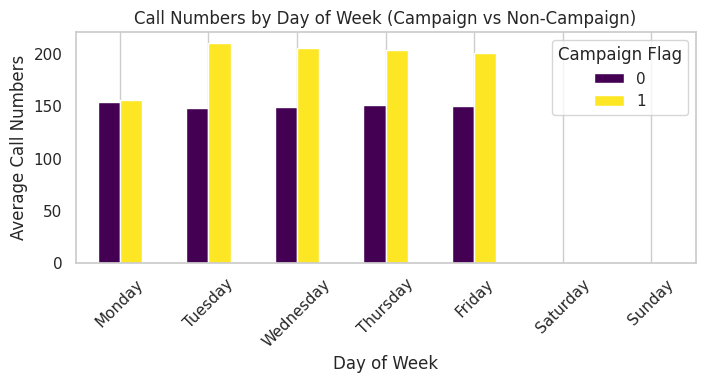

In [19]:
# „Ç∞„É´„Éº„ÉóÂåñ„Å®ÈõÜË®à
weekday_comparison = merged_data.groupby(['dow_name', 'cm_flg'])['call_num'].mean().unstack()

# „Éá„Éº„Çø„ÅåÁ©∫„Åß„Å™„ÅÑ„ÅãÁ¢∫Ë™ç
if weekday_comparison.empty:
    print("Grouped data is empty. Please check dow_name or cm_flg values.")
else:
    # „Éó„É≠„ÉÉ„Éà
    weekday_comparison.plot(kind='bar', figsize=(8, 3), colormap='viridis')
    plt.title('Call Numbers by Day of Week (Campaign vs Non-Campaign)')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Call Numbers')
    plt.xticks(rotation=45)
    plt.legend(title='Campaign Flag')
    plt.grid(axis='y')
    plt.show()


/tmp/ipython-input-2357516400.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_comparison = merged_data.groupby(['dow_name', 'cm_flg'])['call_num'].mean().unstack()


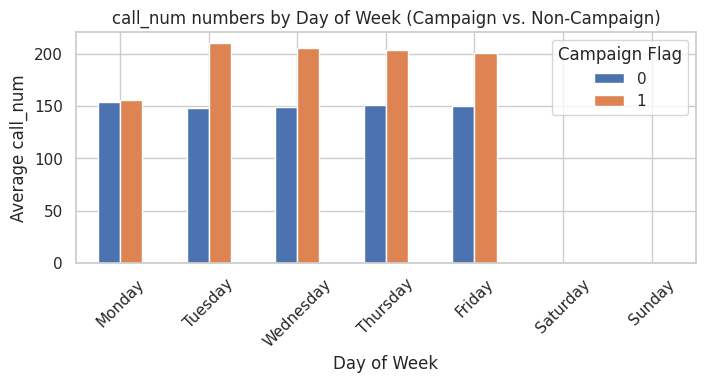

In [20]:
# ÁõÆÁöÑ: ÊõúÊó•Ôºàdow_nameÔºâ„Å®„Ç≠„É£„É≥„Éö„Éº„É≥„Éï„É©„Ç∞Ôºàcm_flgÔºâ„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„Åå„ÄÅÈÄöË©±Êï∞„Å´‰∏é„Åà„ÇãÂΩ±Èüø„ÇíÂàÜÊûê
plt.show()

# ÊõúÊó•„ÅÆÈ†ÜÂ∫è„ÇíÊåáÂÆö
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# ÊõúÊó•„Çí„Ç´„ÉÜ„Ç¥„É™Âûã„Å´Ë®≠ÂÆö
merged_data['dow_name'] = pd.Categorical(merged_data['dow_name'], categories=weekday_order, ordered=True)

# „Ç∞„É´„Éº„ÉóÂåñ„Å®„Éó„É≠„ÉÉ„Éà
weekday_comparison = merged_data.groupby(['dow_name', 'cm_flg'])['call_num'].mean().unstack()
weekday_comparison.plot(kind='bar', figsize=(8, 3))
plt.title('call_num numbers by Day of Week (Campaign vs. Non-Campaign)')
plt.xlabel('Day of Week')
plt.ylabel('Average call_num')
plt.xticks(rotation=45)
plt.legend(title='Campaign Flag')
plt.show()



ÈÄöË©±Êï∞„ÅåÂ§ö„ÅÑÊõúÊó•„Åå„Ç≠„É£„É≥„Éö„Éº„É≥ÊàêÂäü„ÅÆÊåáÊ®ô„Å´„Å™„Çã„ÅãÔºü

In [21]:
# ÊõúÊó•„Åî„Å®„ÅÆ„Ç≠„É£„É≥„Éö„Éº„É≥ÂäπÊûú„ÇíÂÜçÂàÜÊûê
weekday_comparison = merged_data.groupby(['dow_name', 'cm_flg'])['acc_get_cnt'].mean().unstack()
print(weekday_comparison)


/tmp/ipython-input-3069160725.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_comparison = merged_data.groupby(['dow_name', 'cm_flg'])['acc_get_cnt'].mean().unstack()


cm_flg            0         1
dow_name                     
Monday    -0.209270  0.804085
Tuesday   -0.108177  1.006709
Wednesday  0.013847  1.082850
Thursday   0.089437  1.197292
Friday    -0.006764  1.042073
Saturday  -0.656813  0.075643
Sunday    -0.839953 -0.229576


Âπ≥Êó•ÔºàÊúàÊõúÔΩûÈáëÊõúÔºâ„ÅÆÂÇæÂêë
„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÇ„ÇäÔºàcm_flg = 1Ôºâ:

Âπ≥Êó•ÔºàÊúàÊõúÔΩûÈáëÊõúÔºâ„ÅÆ„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÇ„Çä„ÅÆÂπ≥ÂùáÂÄ§„ÅØ„Åô„Åπ„Å¶Ê≠£„ÅÆÂÄ§„Åß„ÅÇ„Çä„ÄÅÁâπ„Å´ÁÅ´ÊõúÔºà1.007Ôºâ„ÄÅÊ∞¥ÊõúÔºà1.083Ôºâ„ÄÅ**Êú®ÊõúÔºà1.197Ôºâ**„ÅåÈ´ò„ÅÑ„Åß„Åô„ÄÇ
„Åì„Çå„ÅØ„ÄÅÂπ≥Êó•„ÅÆ„Ç≠„É£„É≥„Éö„Éº„É≥„Åå„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Å´ÂäπÊûúÁöÑ„Åß„ÅÇ„Çã„Åì„Å®„ÇíÁ§∫„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
„Ç≠„É£„É≥„Éö„Éº„É≥„Å™„ÅóÔºàcm_flg = 0Ôºâ:

„Ç≠„É£„É≥„Éö„Éº„É≥„Å™„Åó„ÅÆÂ†¥Âêà„ÄÅÂπ≥Êó•„ÅÆÂπ≥ÂùáÂÄ§„ÅØÂÖ®‰ΩìÁöÑ„Å´Â∞è„Åï„Åè„ÄÅ„Åª„Åº0‰ªòËøë„ÅÆÂÄ§Ôºà‰æã: Ê∞¥Êõú0.014„ÄÅÈáëÊõú-0.007Ôºâ„Å´„Å™„Å£„Å¶„ÅÑ„Åæ„Åô„ÄÇ
„Ç≠„É£„É≥„Éö„Éº„É≥„Å™„Åó„Åß„ÅØ„ÄÅ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤Âæó„Åå„Åª„Å®„Çì„Å©Áô∫Áîü„Åó„Å¶„ÅÑ„Å™„ÅÑ„Åì„Å®„ÇíÁ§∫ÂîÜ„Åó„Åæ„Åô

ÂúüÊó•„ÅÆÂÇæÂêë
„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÇ„ÇäÔºàcm_flg = 1Ôºâ:

ÂúüÊõúÊó•Ôºà0.076Ôºâ„ÇÑÊó•ÊõúÊó•Ôºà-0.230Ôºâ„Åß„ÅØ„ÄÅ„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÇ„Çä„Åß„ÇÇ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÅåÊ•µ„ÇÅ„Å¶‰Ωé„ÅÑ„ÄÅ„Åæ„Åü„ÅØË≤†„ÅÆÂÄ§„Å´„Å™„Å£„Å¶„ÅÑ„Åæ„Åô„ÄÇ
„Åì„Çå„ÅØ„ÄÅÂúüÊó•„ÅÆ„Ç≠„É£„É≥„Éö„Éº„É≥„Åå„Åª„Å®„Çì„Å©ÂäπÊûú„ÇíÁô∫ÊèÆ„Åó„Å¶„ÅÑ„Å™„ÅÑ„Åì„Å®„ÇíÁ§∫„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
„Ç≠„É£„É≥„Éö„Éº„É≥„Å™„ÅóÔºàcm_flg = 0Ôºâ:

ÂúüÊõúÔºà-0.657Ôºâ„ÄÅÊó•ÊõúÔºà-0.840Ôºâ„Åß„ÄÅ„Ç≠„É£„É≥„Éö„Éº„É≥„Å™„Åó„ÅÆÂ†¥Âêà„Å´„ÅØ„Åï„Çâ„Å´„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Åå‰Ωé„ÅÑÂÇæÂêë„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ
ÂúüÊó•„Åß„ÅØÂñ∂Ê•≠Ê¥ªÂãï„ÇÑ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤Âæó„Åå„Åª„ÅºÂÅúÊ≠¢„Åó„Å¶„ÅÑ„ÇãÂèØËÉΩÊÄß„ÅåËÄÉ„Åà„Çâ„Çå„Åæ„Åô„ÄÇ



Âπ≥Êó• vs ÂúüÊó•„ÅÆ„Ç≠„É£„É≥„Éö„Éº„É≥ÂäπÊûú
Âπ≥Êó•ÔºàÁâπ„Å´ÁÅ´ÊõúÔΩûÊú®ÊõúÔºâ„Åß„ÅØ„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÆÂäπÊûú„ÅåÊòé„Çâ„Åã„Å´È´ò„Åè„ÄÅ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Åå1.0‰ª•‰∏ä„Å´ÈÅî„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
ÂúüÊó•„Åß„ÅØ„Ç≠„É£„É≥„Éö„Éº„É≥„Åå„Åª„Å®„Çì„Å©ÂäπÊûú„ÇíÁô∫ÊèÆ„Åó„Å¶„Åä„Çâ„Åö„ÄÅ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÅÆÂπ≥Âùá„Åå0‰ªòËøë„ÄÅ„Åæ„Åü„ÅØË≤†„ÅÆÂÄ§„Åß„Åô„ÄÇ
4. Ëß£Èáà„ÅÆ„Éù„Ç§„É≥„Éà
Âπ≥Êó•„ÅÆ„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÆÊàêÂäü:

ÁÅ´ÊõúÔΩûÊú®Êõú„ÅåÁâπ„Å´„Ç≠„É£„É≥„Éö„Éº„É≥ÂäπÊûú„ÅÆÈ´ò„ÅÑÊõúÊó•„Åß„ÅÇ„Çã„Åü„ÇÅ„ÄÅ„Åì„Çå„Çâ„ÅÆÊõúÊó•„Å´„Ç≠„É£„É≥„Éö„Éº„É≥„ÇíÈõÜ‰∏≠„Åï„Åõ„Çã„Å®„ÄÅ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÅÆÂäπÁéáÁöÑ„Å™Â¢óÂä†„ÅåÊúüÂæÖ„Åß„Åç„Åæ„Åô„ÄÇ
ÂúüÊó•„ÅÆ„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÆÈùûÂäπÁéáÊÄß:

ÂúüÊó•„Åß„ÅØ„Ç≠„É£„É≥„Éö„Éº„É≥ÂäπÊûú„Åå„Åª„Å®„Çì„Å©„Å™„Åè„ÄÅ„É™„ÇΩ„Éº„ÇπÈÖçÂàÜ„ÅåÈùûÂäπÁéá„Åß„ÅÇ„ÇãÂèØËÉΩÊÄß„ÅåÈ´ò„ÅÑ„Åß„Åô„ÄÇ
„Åì„Çå„ÅØ„ÄÅÂñ∂Ê•≠Ê¥ªÂãï„ÅåÊ¥ªÁô∫„Åß„Å™„ÅÑ„Åü„ÇÅ„Åã„ÄÅ„Çø„Éº„Ç≤„ÉÉ„Éà„É¶„Éº„Ç∂„Éº„ÅÆË°åÂãï„Éë„Çø„Éº„É≥„Å´Âêà„Å£„Å¶„ÅÑ„Å™„ÅÑ„Åü„ÇÅ„Å®ËÄÉ„Åà„Çâ„Çå„Åæ„Åô„ÄÇ
„Ç≠„É£„É≥„Éö„Éº„É≥„Å™„Åó„ÅÆÂΩ±Èüø:

Âπ≥Êó•„Åß„ÇÇ„Ç≠„É£„É≥„Éö„Éº„É≥„Å™„Åó„ÅÆÂ†¥Âêà„ÄÅ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤Âæó„Åå„Åª„Å®„Çì„Å©Áô∫Áîü„Åó„Å™„ÅÑ„Åü„ÇÅ„ÄÅ„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÆÊúâÁÑ°„ÅåÈáçË¶Å„Å™„Éâ„É©„Ç§„Éê„Éº„Åß„ÅÇ„Çã„Åì„Å®„Åå„Çè„Åã„Çä„Åæ„Åô„ÄÇ


**Ê¨°„ÅÆ„Ç¢„ÇØ„Ç∑„Éß„É≥**
**„Ç≠„É£„É≥„Éö„Éº„É≥Êà¶Áï•„ÅÆÊúÄÈÅ©Âåñ:**

Âπ≥Êó•ÔºàÁâπ„Å´ÁÅ´ÊõúÔΩûÊú®ÊõúÔºâ„Å´„Ç≠„É£„É≥„Éö„Éº„É≥„ÇíÈõÜ‰∏≠ÁöÑ„Å´ÂÆüÊñΩ„Åô„Çã„ÄÇ
ÂúüÊó•„Åß„ÅØ„É™„ÇΩ„Éº„Çπ„ÇíÂà•„ÅÆÊñΩÁ≠ñÔºà„Ç™„É≥„É©„Ç§„É≥ÂØæÂøú„ÄÅÂ∫ÉÂëä„Å™„Å©Ôºâ„Å´Âàá„ÇäÊõø„Åà„Çã„Åì„Å®„ÇíÊ§úË®é„Åô„Çã„ÄÇ
„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÆÂÜÖÂÆπ„ÇíË¶ãÁõ¥„Åó:

ÂúüÊó•„Åß„Ç≠„É£„É≥„Éö„Éº„É≥„ÇíÁ∂ö„Åë„ÇãÂ†¥Âêà„ÄÅ„Çø„Éº„Ç≤„ÉÉ„ÉàÂ±§„Å´Âøú„Åò„ÅüÊñΩÁ≠ñÔºà‰æã: „Ç™„É≥„É©„Ç§„É≥„Ç≠„É£„É≥„Éö„Éº„É≥„ÇÑ„ÇΩ„Éº„Ç∑„É£„É´„É°„Éá„Ç£„Ç¢Â∫ÉÂëäÔºâ„ÇíÂº∑Âåñ„ÄÇ
„Éá„Éº„ÇøË£úÂÆå„Å®‰ªÆË™¨Ê§úË®º:

‰ªñ„ÅÆË¶ÅÂõ†Ôºà‰æã: ÊôÇÈñìÂ∏Ø„ÄÅÂ≠£ÁØÄÊÄß„Å™„Å©Ôºâ„Åå„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÆÂäπÊûú„Å´„Å©„ÅÆ„Çà„ÅÜ„Å´ÂΩ±Èüø„Åó„Å¶„ÅÑ„Çã„Åã„ÇíÂàÜÊûê„Åô„Çã„ÄÇ

cm_flg         0         1
month                     
1      -0.468161 -0.116346
2      -0.237701 -0.078721
3       0.280841  0.447289
4       0.251531       NaN
5      -0.298907 -0.001112
6      -0.205997       NaN
7      -0.017185       NaN
8      -0.737282  0.998941
9      -0.536898  1.909399
10     -0.057410  0.575415
11     -0.144565       NaN
12     -0.574286       NaN


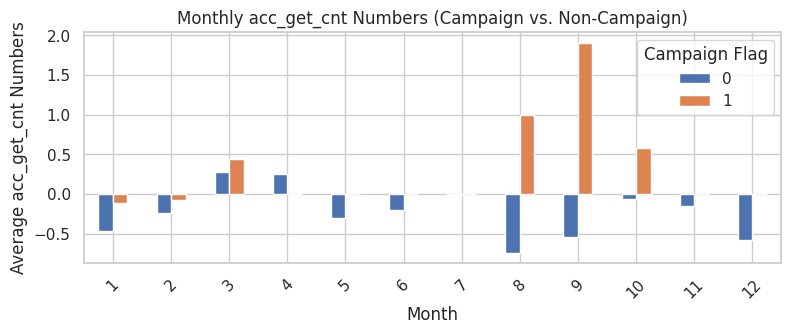

In [22]:
monthly_comparison = merged_data.groupby(['month', 'cm_flg'])['acc_get_cnt'].mean().unstack()
print(monthly_comparison)
monthly_comparison.plot(kind='bar', figsize=(9, 3))
plt.title('Monthly acc_get_cnt Numbers (Campaign vs. Non-Campaign)')
plt.xlabel('Month')
plt.ylabel('Average acc_get_cnt Numbers')
plt.xticks(rotation=45)
plt.legend(title='Campaign Flag')
plt.show()

üåª„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÆÂ§ß„Åç„Å™ÂäπÊûú:

„Ç≠„É£„É≥„Éö„Éº„É≥„Åå„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤Âæó„Å´„Å®„Å£„Å¶ÈùûÂ∏∏„Å´ÈáçË¶Å„Åß„ÅÇ„Çã„Åì„Å®„ÅåÊòéÁôΩ„Åß„Åô„ÄÇ
Áâπ„Å´9Êúà„ÅÆ„Ç≠„É£„É≥„Éö„Éº„É≥„ÅØ„ÄÅÈùûÂ∏∏„Å´È´ò„ÅÑÂäπÊûú„ÇíÁô∫ÊèÆ„Åó„Å¶„ÅÑ„Çã„Åü„ÇÅ„ÄÅÈáçÁÇπÁöÑ„Å´ÂàÜÊûê„Åô„Çã‰æ°ÂÄ§„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

Â≠£ÁØÄÁöÑ„Å™Â§âÂãï:

6ÊúàÔΩû7Êúà„ÅØ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Åå‰ΩéËø∑„Åó„Å¶„ÅÑ„Çã„Åü„ÇÅ„ÄÅ„Åì„ÅÆÊôÇÊúü„ÅÆÂñ∂Ê•≠ÂäπÁéá„ÇíÊîπÂñÑ„Åô„Çã„Åã„ÄÅÁâπÂà•„Å™ÊñΩÁ≠ñ„ÇíÊ§úË®é„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çä„Åæ„Åô

_name____lpÊúà„Åî„Å®„ÅÆÈÄöË©±Êï∞„ÅÆÊØîËºÉ:

cm_flg           0           1
month                         
1        67.937500    0.000000
2        85.777778   86.833333
3        91.500000   83.960000
4       114.166667         NaN
5        90.125000  113.466667
6        98.413793         NaN
7       122.693548         NaN
8        80.516129  173.741935
9        66.470588  245.372093
10      148.958333  202.857143
11      123.050000         NaN
12      121.161290         NaN


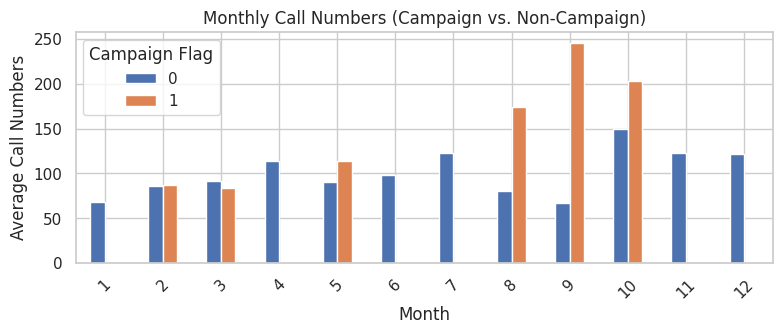

In [23]:
monthly_comparison = merged_data.groupby(['month', 'cm_flg'])['call_num'].mean().unstack()
print(monthly_comparison)
monthly_comparison.plot(kind='bar', figsize=(9, 3))
plt.title('Monthly Call Numbers (Campaign vs. Non-Campaign)')
plt.xlabel('Month')
plt.ylabel('Average Call Numbers')
plt.xticks(rotation=45)
plt.legend(title='Campaign Flag')
plt.show()


üåªÈÄöË©±Êï∞„Åå„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤Âæó„Å´ÂØÑ‰∏é:

ÈÄöË©±Êï∞„ÅåÂ§ö„ÅÑÊúà„ÅØ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÇÇÈ´ò„Åè„Å™„ÇãÂÇæÂêë„ÅåË¶ã„Çâ„Çå„Çã„Åü„ÇÅ„ÄÅÈÄöË©±Êï∞„ÇíÂ¢ó„ÇÑ„Åô„Åì„Å®„ÅåÊàêÂäü„ÅÆÈçµ„Å®„Å™„Çä„Åæ„Åô„ÄÇ

Áâπ„Å´9Êúà„ÇÑ10Êúà„ÅÆ„Ç≠„É£„É≥„Éö„Éº„É≥„Åß„ÅØ„ÄÅÈÄöË©±Êï∞„Å®„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Åå‰∏ÄËá¥„Åó„Å¶Â¢óÂä†„Åó„Å¶„ÅÑ„Çã„Åü„ÇÅ„ÄÅÂº∑Âåñ„Åô„Åπ„Åç„Çø„Ç§„Éü„É≥„Ç∞„ÄÇ

üåª ÈÄöË©±Êï∞„ÅåÂ∞ë„Å™„ÅÑÊúüÈñìÔºà6ÊúàÔΩû7ÊúàÔºâ„ÅØ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÇÇ‰ΩéËø∑„Åó„Å¶„ÅÑ„Çã„Åü„ÇÅ„ÄÅ„Åì„ÅÆÊôÇÊúü„ÅÆÈÄöË©±

In [24]:
# search_cnt„ÅÆÊ¨†ÊêçÂÄ§Êï∞
print(merged_data['search_cnt'].isna().sum())

# Ê¨†ÊêçÂÄ§Âá¶ÁêÜ

from sklearn.linear_model import LinearRegression

# ÂÆåÂÖ®„Éá„Éº„ÇøÔºàÊ¨†ÊêçÂÄ§„ÅÆ„Å™„ÅÑË°åÔºâ„ÅÆÊäΩÂá∫
complete_data = merged_data.dropna(subset=['search_cnt', 'call_num'])

# ÁâπÂæ¥Èáè„Å®ÁõÆÁöÑÂ§âÊï∞„ÇíË®≠ÂÆö
X = complete_data[['call_num']]  # ‰ªñ„Å´‰Ωø„Åà„Åù„ÅÜ„Å™ÁâπÂæ¥Èáè„Åå„ÅÇ„Çå„Å∞ËøΩÂä†ÂèØËÉΩ
y = complete_data['search_cnt']

# Á∑öÂΩ¢ÂõûÂ∏∞„É¢„Éá„É´„ÅÆ„Éà„É¨„Éº„Éã„É≥„Ç∞
model = LinearRegression().fit(X, y)

# Ê¨†ÊêçÂÄ§„ÇíË£úÂÆå
merged_data['search_cnt'] = merged_data.apply(
    lambda row: model.predict([[row['call_num']]])[0] if pd.isna(row['search_cnt']) else row['search_cnt'],
    axis=1
)

# Ë£úÂÆåÁµêÊûú„ÅÆÁ¢∫Ë™ç
print(merged_data['search_cnt'].isna().sum())  # ÁµêÊûú„ÅØ0„Å®„Å™„Çã„ÅØ„Åö


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/

570


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/

0


Ê§úÁ¥¢„Éà„É¨„É≥„Éâ„Å®„Ç≠„É£„É≥„Éö„Éº„É≥„Éï„É©„Ç∞„ÅÆÈñ¢‰øÇ:

cm_flg
0    36.321406
1    37.171690
Name: search_cnt, dtype: float64


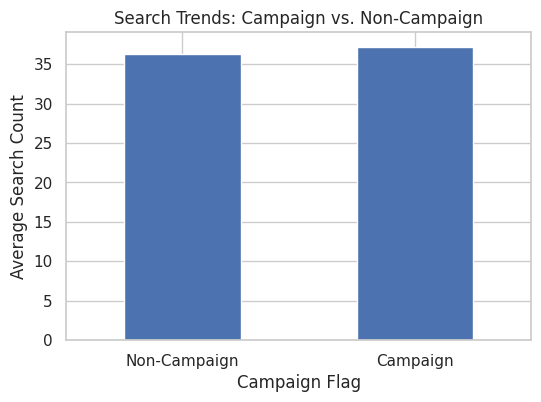

In [25]:
trend_campaign_comparison = merged_data.groupby('cm_flg')['search_cnt'].mean()
print(trend_campaign_comparison)
trend_campaign_comparison.plot(kind='bar', figsize=(6, 4))
plt.title('Search Trends: Campaign vs. Non-Campaign')
plt.xlabel('Campaign Flag')
plt.ylabel('Average Search Count')
plt.xticks([0, 1], ['Non-Campaign', 'Campaign'], rotation=0)
plt.show()


„Ç≠„É£„É≥„Éö„Éº„É≥„Å™„ÅóÔºàcm_flg=0Ôºâ„ÅÆÂπ≥ÂùáÊ§úÁ¥¢Êï∞Ôºö34.84

„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÇ„ÇäÔºàcm_flg=1Ôºâ„ÅÆÂπ≥ÂùáÊ§úÁ¥¢Êï∞Ôºö40.79

        search_cnt    call_num
cm_flg                        
0        36.321406  107.345416
1        37.171690  138.487310


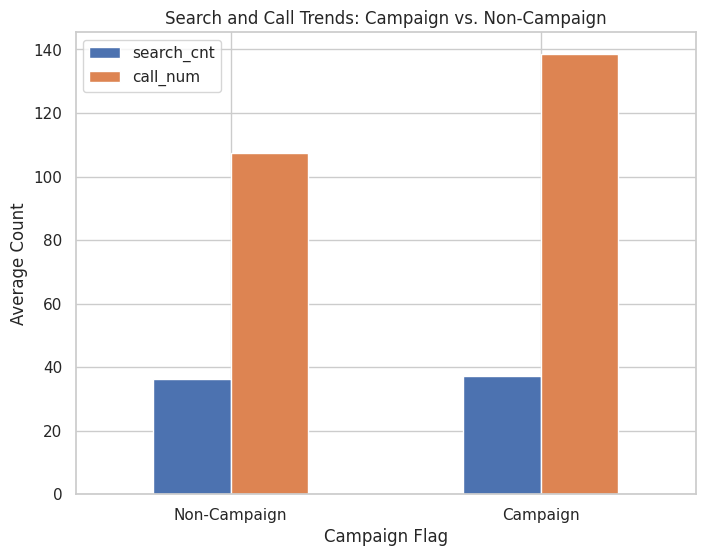

In [26]:
comparison = merged_data.groupby('cm_flg')[['search_cnt', 'call_num']].mean()
print(comparison)

comparison.plot(kind='bar', figsize=(8, 6))
plt.title('Search and Call Trends: Campaign vs. Non-Campaign')
plt.xlabel('Campaign Flag')
plt.ylabel('Average Count')
plt.xticks([0, 1], ['Non-Campaign', 'Campaign'], rotation=0)
plt.show()


4. ÊôÇÈñìÁöÑ„Éà„É¨„É≥„Éâ„ÅÆÂàÜÊûê
ÈÄ±Âçò‰Ωç„ÉªÊúàÂçò‰Ωç„ÅÆ„Éà„É¨„É≥„Éâ„ÇíÂèØË¶ñÂåñ
„Éá„Éº„Çø„ÇíÈÄ±„Åæ„Åü„ÅØÊúàÂçò‰Ωç„Å´ÈõÜÁ¥Ñ„Åó„Å¶„ÄÅÈÄöË©±Êï∞„ÅÆÂ§âÂåñ„ÇíÁ¢∫Ë™ç„Åó„Åæ„Åô„ÄÇ

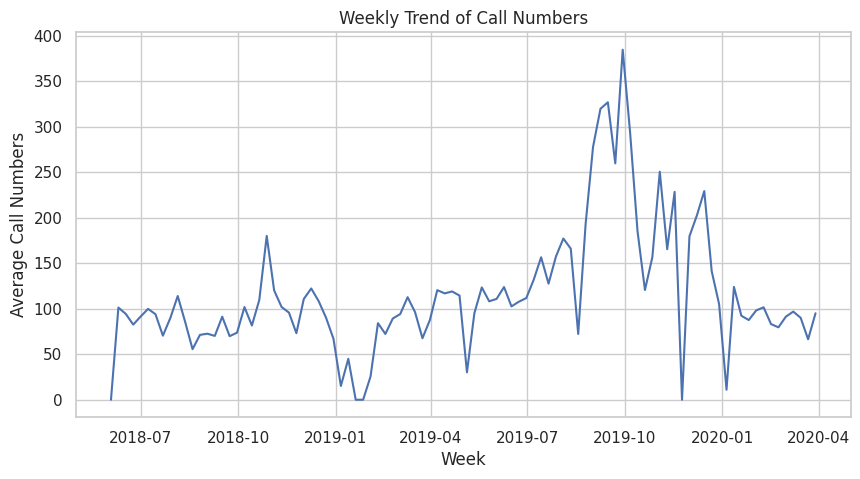

In [27]:
weekly_trend = merged_data.groupby('cdr_date')['call_num'].sum().resample('W').mean()
plt.figure(figsize=(10, 5))
plt.plot(weekly_trend)
plt.title('Weekly Trend of Call Numbers')
plt.xlabel('Week')
plt.ylabel('Average Call Numbers')
plt.grid(True)
plt.show()


Áï∞Â∏∏ÂÄ§„ÅÆË©≥Á¥∞ÂàÜÊûê
ÈÄöË©±Êï∞„ÅÆÂ§ñ„ÇåÂÄ§„ÇíË™øÊüª
Áï∞Â∏∏„Å´È´ò„ÅÑÈÄöË©±Êï∞„ÅÆÊó•„ÇíÁâπÂÆö„Åó„Å¶„ÄÅ„Åù„ÅÆÊó•‰ªò„ÇÑÈñ¢ÈÄ£„Åô„ÇãË¶ÅÂõ†Ôºà„Ç≠„É£„É≥„Éö„Éº„É≥„ÇÑ‰ºëÊó•Ôºâ„ÇíË™ø„Åπ„Åæ„Åô:

In [28]:
high_calls = merged_data[merged_data['call_num'] > merged_data['call_num'].quantile(0.95)]
print("High Call Days Analysis:")
print(high_calls[['cdr_date', 'call_num', 'cm_flg', 'holiday_flag', 'holiday_name']])


High Call Days Analysis:
      cdr_date  call_num  cm_flg holiday_flag holiday_name
238 2018-10-25     595.0       0        False   No Holiday
543 2019-08-26     363.0       1        False   No Holiday
545 2019-08-28     369.0       1        False   No Holiday
546 2019-08-29     543.0       1        False   No Holiday
547 2019-08-30     369.0       1        False   No Holiday
550 2019-09-02     428.0       1        False   No Holiday
551 2019-09-03     497.0       1        False   No Holiday
552 2019-09-04     398.0       1        False   No Holiday
553 2019-09-05     450.0       1        False   No Holiday
554 2019-09-06     465.0       1        False   No Holiday
557 2019-09-09     447.0       1        False   No Holiday
558 2019-09-10     434.0       1        False   No Holiday
559 2019-09-11     463.0       1        False   No Holiday
560 2019-09-12     464.0       1        False   No Holiday
561 2019-09-13     480.0       1        False   No Holiday
565 2019-09-17     569.0       

Ê¨°„ÅÆ„Çπ„ÉÜ„ÉÉ„Éó

6. ‰∫àÊ∏¨„É¢„Éá„É´ÊßãÁØâ„ÅÆÊ∫ñÂÇô
„Éá„Éº„Çø„ÅÆ„Çπ„Ç±„Éº„É™„É≥„Ç∞„Å®ÁâπÂæ¥„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞
Ê©üÊ¢∞Â≠¶Áøí„É¢„Éá„É´Áî®„Å´„Éá„Éº„Çø„ÇíÊ∫ñÂÇôÔºàÁâπÂæ¥Èáè„ÅÆ„Çπ„Ç±„Éº„É™„É≥„Ç∞„ÇÑÈáçË¶Å„Å™ÁâπÂæ¥Èáè„ÅÆ‰ΩúÊàêÔºâ„ÄÇ
ÂõûÂ∏∞„É¢„Éá„É´„ÅÆÊßãÁØâ
ÈÄöË©±Êï∞„Çí‰∫àÊ∏¨„Åô„Çã„É¢„Éá„É´„ÇíÊßãÁØâ„Åó„ÄÅ„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÆÂäπÊûú„ÇíÊï∞ÂÄ§ÁöÑ„Å´Ë©ï‰æ°„ÄÇ

In [29]:
#####################

**„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞Ôºàacc_get_cntÔºâ„Å´ÂØæ„Åô„ÇãEDA**

„Éá„Éº„Çø„ÅÆ„Éó„É¨„Éì„É•„Éº:
     cdr_date  dow   dow_name   woy  wom    doy  financial_year  \
94 2018-06-03  7.0     Sunday  22.0  2.0  154.0          2018.0   
95 2018-06-04  1.0     Monday  23.0  2.0  155.0          2018.0   
96 2018-06-05  2.0    Tuesday  23.0  2.0  156.0          2018.0   
97 2018-06-06  3.0  Wednesday  23.0  2.0  157.0          2018.0   
98 2018-06-07  4.0   Thursday  23.0  2.0  158.0          2018.0   

   day_before_holiday_flag holiday_flag    holiday_name  ...  \
94                   False         True  Public Holiday  ...   
95                   False        False      No Holiday  ...   
96                   False        False      No Holiday  ...   
97                   False        False      No Holiday  ...   
98                   False        False      No Holiday  ...   

    holiday_name_Êò•ÂàÜ„ÅÆÊó•  holiday_name_Êò≠Âíå„ÅÆÊó•  holiday_name_Êµ∑„ÅÆÊó•  holiday_name_ÁßãÂàÜ„ÅÆÊó•  \
94                0.0                0.0               0.0              

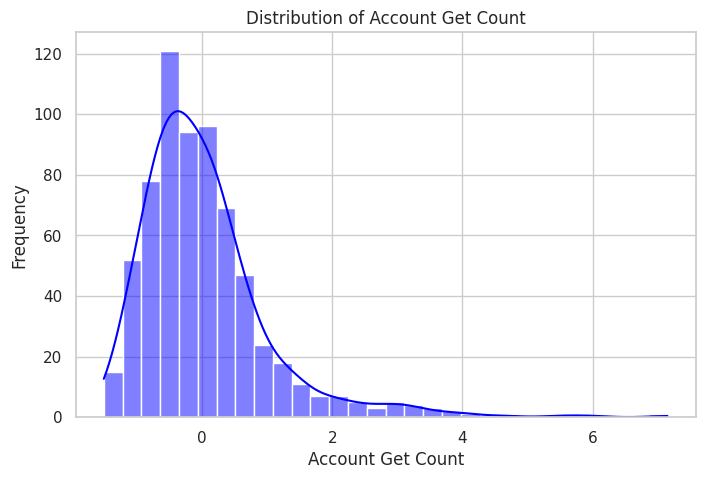


ÊõúÊó•Âà•„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÅÆÊØîËºÉÔºàCMÊîæÈÄÅÊúâÁÑ°Ôºâ:
cm_flg            0         1
dow_name                     
Friday    -0.006764  1.042073
Monday    -0.209270  0.804085
Saturday  -0.656813  0.075643
Sunday    -0.839953 -0.229576
Thursday   0.089437  1.197292
Tuesday   -0.108177  1.006709
Wednesday  0.013847  1.082850


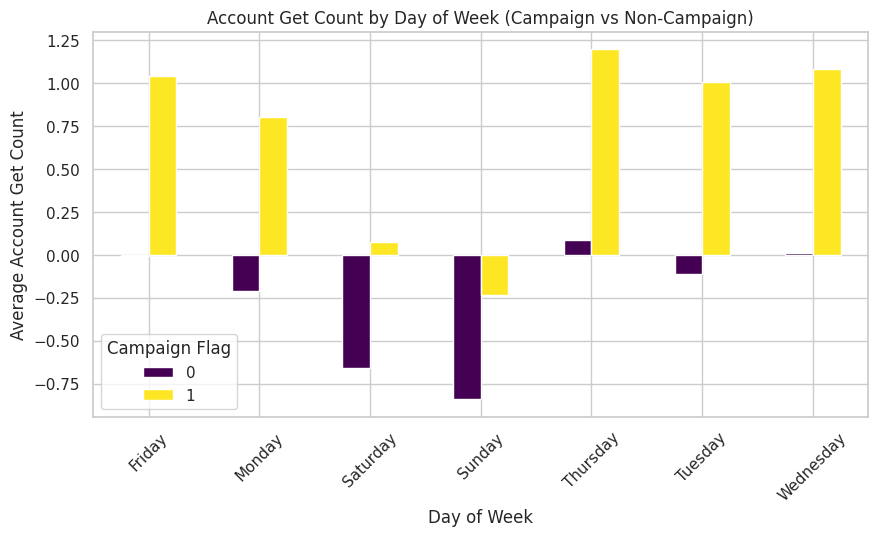

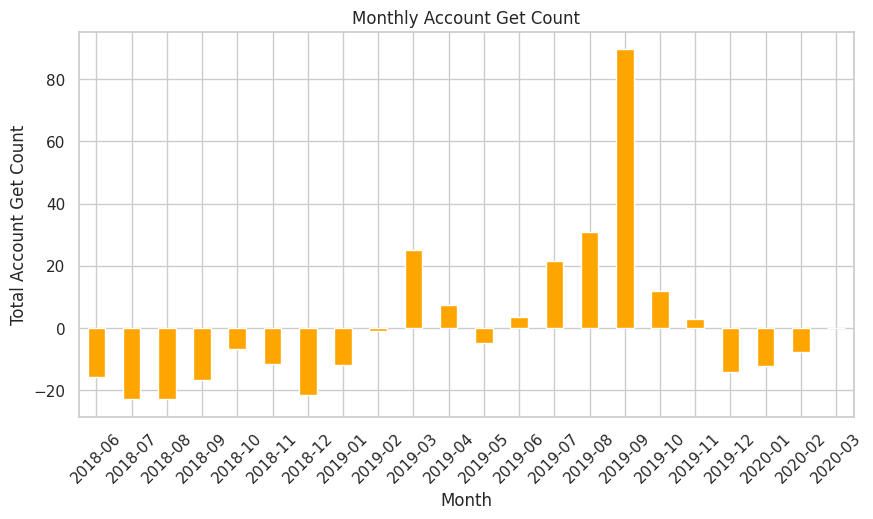


„Ç≠„É£„É≥„Éö„Éº„É≥ÊúâÁÑ°„Å´„Çà„Çã„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÅÆÊØîËºÉ:
„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÇ„Çä: 0.7080426327850847
„Ç≠„É£„É≥„Éö„Éº„É≥„Å™„Åó: -0.245947619188324


/tmp/ipython-input-3559195486.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


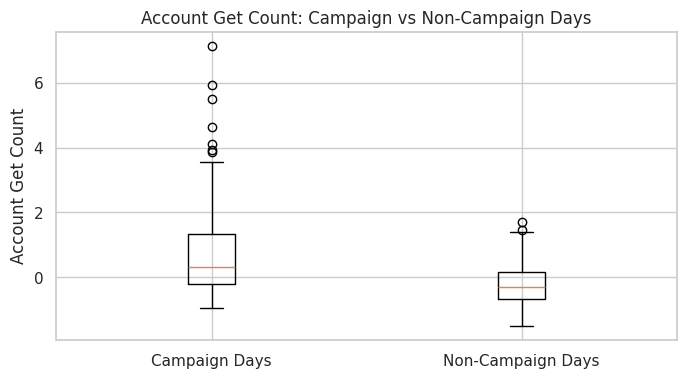


Á•ùÊó•Âà•„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞:
holiday_flag
False    0.321499
True    -0.546006
Name: acc_get_cnt, dtype: float64


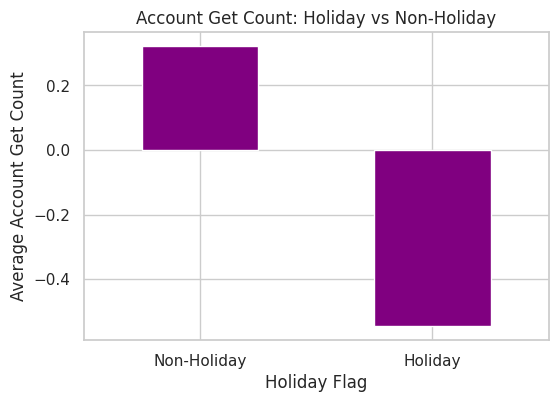


ÁâπÂÆö„ÅÆ‰ºëÊó•Âà•„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞:
holiday_name
ÂÖÉÊó•                   -1.496330
Â§©ÁöáË™ïÁîüÊó•                -1.025720
„Åì„Å©„ÇÇ„ÅÆÊó•                -0.951414
Êàê‰∫∫„ÅÆÊó•                 -0.877107
„Åø„Å©„Çä„ÅÆÊó•                -0.864722
‰ºëÊó•                   -0.737781
Â±±„ÅÆÊó•                  -0.734685
‰ΩìËÇ≤„ÅÆÊó•                 -0.722301
‰ºëÊó• (Â§©Áöá„ÅÆÂç≥‰Ωç„ÅÆÊó•)         -0.678955
ÊÜ≤Ê≥ïË®òÂøµÊó•                -0.666571
Êµ∑„ÅÆÊó•                  -0.654186
ÊñáÂåñ„ÅÆÊó•                 -0.592264
Âã§Âä¥ÊÑüË¨ù„ÅÆÊó•               -0.555110
Êò≠Âíå„ÅÆÊó•                 -0.542726
Public Holiday       -0.535268
Âª∫ÂõΩË®òÂøµ„ÅÆÊó•               -0.486996
‰ºëÊó• (Âç≥‰ΩçÁ§ºÊ≠£ÊÆø„ÅÆÂÑÄ„ÅÆË°å„Çè„Çå„ÇãÊó•)   -0.332190
Êò•ÂàÜ„ÅÆÊó•                  0.070305
Êï¨ËÄÅ„ÅÆÊó•                  0.262265
ÁßãÂàÜ„ÅÆÊó•                  0.435647
Name: acc_get_cnt, dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30343 (\N{CJK UNIFIED IDEOGRAPH-7687}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35477 (\N{CJK UNIFIED IDEOGRAPH-8A95}) missing from font(s) DejaVu Sans.
  fig.canvas

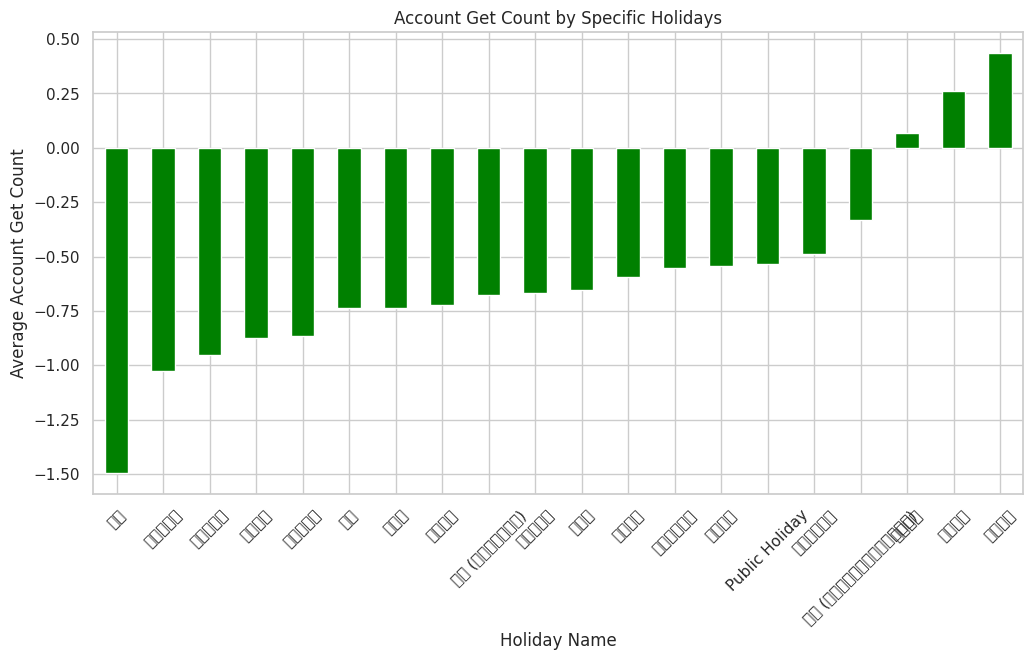

In [30]:
# ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn„ÅÆ„Çπ„Çø„Ç§„É´Ë®≠ÂÆö
sns.set(style="whitegrid")

# „Éá„Éº„Çø„ÅÆÁµ±ÂêàÂæå„ÅÆÁ¢∫Ë™ç
print("„Éá„Éº„Çø„ÅÆ„Éó„É¨„Éì„É•„Éº:")
print(merged_data.head())

# Ê¨†ÊêçÂÄ§„ÅÆÁ¢∫Ë™ç
print("\nÊ¨†ÊêçÂÄ§„ÅÆÁ¢∫Ë™ç:")
print(merged_data.isnull().sum())

# Êó•‰ªò„Éï„Ç£„É´„Çø„É™„É≥„Ç∞
start_date = '2018-06-03'
end_date = '2020-03-29'
merged_data = merged_data[(merged_data['cdr_date'] >= start_date) & (merged_data['cdr_date'] <= end_date)]

print(f"\n„Éá„Éº„Çø„Éï„Ç£„É´„Çø„É™„É≥„Ç∞Âæå„ÅÆË°åÊï∞: {len(merged_data)}")

# „Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞Ôºàacc_get_cntÔºâ„ÅÆÂü∫Êú¨Áµ±Ë®àÈáè
print("\n„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞Ôºàacc_get_cntÔºâ„ÅÆÂü∫Êú¨Áµ±Ë®àÈáè:")
print(merged_data['acc_get_cnt'].describe())

# „Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÅÆÂàÜÂ∏É„ÇíÂèØË¶ñÂåñ
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['acc_get_cnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Account Get Count')
plt.xlabel('Account Get Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# ÊõúÊó•„Åî„Å®„ÅÆ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞
merged_data['dow_name'] = merged_data['cdr_date'].dt.day_name()
weekday_comparison = merged_data.groupby(['dow_name', 'cm_flg'])['acc_get_cnt'].mean().unstack()

print("\nÊõúÊó•Âà•„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÅÆÊØîËºÉÔºàCMÊîæÈÄÅÊúâÁÑ°Ôºâ:")
print(weekday_comparison)

weekday_comparison.plot(kind='bar', figsize=(10, 5), colormap='viridis')
plt.title('Account Get Count by Day of Week (Campaign vs Non-Campaign)')
plt.xlabel('Day of Week')
plt.ylabel('Average Account Get Count')
plt.xticks(rotation=45)
plt.legend(title='Campaign Flag')
plt.grid(True)
plt.show()

# ÊúàÂà•„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞
merged_data['month'] = merged_data['cdr_date'].dt.to_period('M')
monthly_acc = merged_data.groupby('month')['acc_get_cnt'].sum()

plt.figure(figsize=(10, 5))
monthly_acc.plot(kind='bar', color='orange')
plt.title('Monthly Account Get Count')
plt.xlabel('Month')
plt.ylabel('Total Account Get Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# „Ç≠„É£„É≥„Éö„Éº„É≥ÂäπÊûú„ÅÆÂàÜÊûê
campaign_data = merged_data[merged_data['cm_flg'] == 1]
non_campaign_data = merged_data[merged_data['cm_flg'] == 0]

print("\n„Ç≠„É£„É≥„Éö„Éº„É≥ÊúâÁÑ°„Å´„Çà„Çã„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÅÆÊØîËºÉ:")
print("„Ç≠„É£„É≥„Éö„Éº„É≥„ÅÇ„Çä:", campaign_data['acc_get_cnt'].mean())
print("„Ç≠„É£„É≥„Éö„Éº„É≥„Å™„Åó:", non_campaign_data['acc_get_cnt'].mean())

# „Ç≠„É£„É≥„Éö„Éº„É≥ÂäπÊûú„ÅÆÂèØË¶ñÂåñ
plt.figure(figsize=(8, 4))
plt.boxplot(
    [campaign_data['acc_get_cnt'], non_campaign_data['acc_get_cnt']],
    labels=['Campaign Days', 'Non-Campaign Days']
)
plt.title('Account Get Count: Campaign vs Non-Campaign Days')
plt.ylabel('Account Get Count')
plt.grid(True)
plt.show()

# Á•ùÊó•„Å®„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÅÆÊØîËºÉ
holiday_comparison = merged_data.groupby('holiday_flag')['acc_get_cnt'].mean()

print("\nÁ•ùÊó•Âà•„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞:")
print(holiday_comparison)

holiday_comparison.plot(kind='bar', figsize=(6, 4), color='purple')
plt.title('Account Get Count: Holiday vs Non-Holiday')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Account Get Count')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.grid(True)
plt.show()

# ÁâπÂÆö„ÅÆ‰ºëÊó•„ÅÆÂàÜÊûê
specific_holidays = merged_data[merged_data['holiday_name'] != 'No Holiday']
specific_holiday_comparison = specific_holidays.groupby('holiday_name')['acc_get_cnt'].mean().sort_values()

print("\nÁâπÂÆö„ÅÆ‰ºëÊó•Âà•„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞:")
print(specific_holiday_comparison)

specific_holiday_comparison.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Account Get Count by Specific Holidays')
plt.xlabel('Holiday Name')
plt.ylabel('Average Account Get Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [31]:
#####################

**ÁâπÂæ¥„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞**(Êñ∞„Åü„Å™ÁâπÂæ¥Èáè„ÇíÁîüÊàê„Åô„Çã)

In [32]:
# # ÈÄ±Êú´„Å®Âπ≥Êó•„ÅÆÈÅï„ÅÑ„ÇíÊçâ„Åà„Çã„ÄÇ
merged_data['is_weekend'] = merged_data['dow'].isin([5, 6]).astype(int)


In [33]:
# ÁõÆÁöÑ: Â§èÂ≠£Ôºà6ÊúàÔΩû8ÊúàÔºâ„ÅÆÁâπÊÄß„ÇíÊçâ„Åà„Çã„ÄÇÁêÜÁî±: Â§è„ÅØ„Ç≠„É£„É≥„Éö„Éº„É≥„ÇÑÊ∂àË≤ªÊ¥ªÂãï„ÅåÂ¢óÂä†„Åô„Çã„Åì„Å®„ÅåÂ§ö„Åè„ÄÅÈÄöË©±Êï∞„Å´ÂΩ±Èüø„Çí‰∏é„Åà„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çã„Åü„ÇÅ„ÄÇ
merged_data['is_summer'] = merged_data['month'].isin([6, 7, 8]).astype(int)
#  ÁõÆÁöÑ: Âπ¥Êú´Ôºà12ÊúàÔºâ„ÅÆÁâπÊÄß„ÇíÊçâ„Åà„Çã„ÄÇÁêÜÁî±: Âπ¥Êú´„ÅØÊ∂àË≤ªÊ¥ªÂãï„ÅåÊ¥ªÁô∫„Å´„Å™„ÇãÊôÇÊúü„Åß„ÅÇ„Çä„ÄÅÈÄöË©±Êï∞„Å´ÂΩ±Èüø„Çí‰∏é„Åà„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çã„Åü„ÇÅ„ÄÇ
merged_data['is_year_end'] = merged_data['month'].isin([12]).astype(int)


In [34]:
# „Ç≠„É£„É≥„Éö„Éº„É≥„Å®‰ºëÊó•„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ„ÅåÈÄöË©±Êï∞„Å´‰∏é„Åà„ÇãÂΩ±Èüø„ÇíÊçâ„Åà„Çã„ÄÇÁêÜÁî±: „Ç≠„É£„É≥„Éö„Éº„É≥„ÅåË°å„Çè„Çå„Å¶„ÅÑ„Çã‰ºëÊó•„ÅØÁâπÂÆö„ÅÆË°åÂãï„Éë„Çø„Éº„É≥„ÇíÂºï„ÅçËµ∑„Åì„ÅôÂèØËÉΩÊÄß„ÅåÈ´ò„ÅÑ„ÄÇ

merged_data['holiday_campaign'] = (merged_data['cm_flg'] == 1) & (merged_data['holiday_flag'] == True)


In [35]:
"""call_num_7d_avg „ÅØ„ÄÅÂêÑË°åÔºàÂêÑÊó•‰ªòÔºâ„Å´ÂØæ„Åó„Å¶„ÄÅ
„Åù„ÅÆÊó•„ÇíÂê´„ÇÄÈÅéÂéª7Êó•Èñì„ÅÆÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅÆÂπ≥ÂùáÂÄ§„ÇíË®àÁÆó„Åó„Åü„ÇÇ„ÅÆ„Åß„Åô„ÄÇ
„Åì„Çå„ÅØ ÁßªÂãïÂπ≥ÂùáÔºàRolling AverageÔºâ
„Å®Âëº„Å∞„Çå„ÇãÊâãÊ≥ï„Åß„ÄÅÊôÇÈñìÁöÑ„Å™Â§âÂãï„ÇíÊªë„Çâ„Åã„Å´„Åô„Çã„Åü„ÇÅ„Å´„Çà„Åè‰Ωø„Çè„Çå„Åæ„Åô„ÄÇ

Ë®àÁÆó„ÅÆÂÖ∑‰Ωì‰æã
‰æã„Åà„Å∞„ÄÅ„Éá„Éº„Çø„ÅåÊó•Âçò‰Ωç„ÅßÊßãÊàê„Åï„Çå„Å¶„ÅÑ„ÇãÂ†¥ÂêàÔºö

2023-01-08 „ÅÆ call_num_7d_avg „ÅØ 2023-01-02 ÔΩû 2023-01-08 „ÅÆÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅÆÂπ≥Âùá„ÄÇ
2023-01-09 „ÅÆ call_num_7d_avg „ÅØ 2023-01-03 ÔΩû 2023-01-09 „ÅÆÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅÆÂπ≥Âùá„ÄÇ
„Åì„Çå„Åå Pandas „ÅÆ rolling(window=7).mean() Èñ¢Êï∞„ÅßË®àÁÆó„Åï„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ"""
# ÈÅéÂéª7Êó•Èñì„ÅÆÁßªÂãïÂπ≥Âùá„ÇíË®àÁÆó„Åó„ÄÅÁü≠ÊúüÁöÑ„Å™„Éà„É¨„É≥„Éâ„ÇíÊçâ„Åà„Çã„ÄÇÁêÜÁî±: ÊôÇÁ≥ªÂàó„Éá„Éº„Çø„Åß„ÅØÁõ¥Ëøë„ÅÆÂãïÂêë„ÅåÈáçË¶Å„Å™‰∫àÊ∏¨Ë¶ÅÂõ†„Å®„Å™„Çã„Åü„ÇÅ„ÄÅÁü≠Êúü„Éà„É¨„É≥„Éâ„ÇíÊòéÁ§∫„Åô„Çã„Åì„Å®„ÅåÊúâÁõä„ÄÇ

merged_data['call_num_7d_avg'] = merged_data['call_num'].rolling(window=7).mean()


In [36]:
# ÈÅéÂéª„Éá„Éº„Çø„Çí‰Ωø„Å£„Å¶Ë®àÁÆó
# Âàù„ÇÅ„Å¶call_num_7d_avg„ÄÅcall_num_diff„ÇíÂÆöÁæ©
merged_data['call_num_7d_avg'] = merged_data['call_num'].shift(1).rolling(window=7).mean()
merged_data['call_num_diff'] = merged_data['call_num'].shift(1).diff()


‚ö†Ô∏è
call_num_7d_avgÔºörolling(window=7) „Å´„Çà„Çä„ÄÅÊúÄÂàù„ÅÆ7Ë°åÔºà„Éá„Éº„Çø„Åå‰∏çË∂≥„Åô„ÇãÁØÑÂõ≤Ôºâ„ÅåÊ¨†ÊêçÂÄ§„Å´„Å™„Çã

call_num_diff:„ÄÄshift(1) „Å´„Çà„Çä„ÄÅÊúÄÂàù„ÅÆ1Ë°å„ÅåÊ¨†ÊêçÂÄ§„Å´„Å™„Çã

In [37]:
merged_data['call_num_7d_avg'].fillna(method='ffill', inplace=True)
merged_data['call_num_diff'].fillna(method='ffill', inplace=True)


/tmp/ipython-input-1881135284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['call_num_7d_avg'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-1881135284.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['call_num_7d_avg'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-1881135284.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment us

In [38]:
# call_num_7d_avg „ÅÆÊ¨†ÊêçÂÄ§Âá¶ÁêÜ
merged_data['call_num_7d_avg'] = merged_data['call_num_7d_avg'].fillna(merged_data['call_num_7d_avg'].mean())
merged_data['call_num_7d_avg'] = merged_data['call_num_7d_avg'].ffill()

# call_num_diff „ÅÆÊ¨†ÊêçÂÄ§Âá¶ÁêÜ

merged_data['call_num_diff'] = merged_data['call_num_diff'].fillna(0)

# Ê¨†ÊêçÂÄ§Á¢∫Ë™ç
print("Ê¨†ÊêçÂÄ§„ÅÆÁ¢∫Ë™ç:")
print(merged_data[['call_num_7d_avg', 'call_num_diff']].isnull().sum())


Ê¨†ÊêçÂÄ§„ÅÆÁ¢∫Ë™ç:
call_num_7d_avg    0
call_num_diff      0
dtype: int64


In [39]:
# # call_num_diff „ÅÆÊÆã„Å£„ÅüÊ¨†ÊêçÂÄ§„Çí 0 „ÅßÂüã„ÇÅ„Çã
# merged_data['call_num_diff'] = merged_data['call_num_diff'].fillna(0)

# # Á¢∫Ë™ç
# print("Ê¨†ÊêçÂÄ§„ÅÆÁ¢∫Ë™çÔºàÊúÄÁµÇÁ¢∫Ë™çÔºâ:")
# print(merged_data[['call_num_7d_avg', 'call_num_diff']].isnull().sum())


In [40]:
# dow „Å® is_weekend „ÅÆÈñ¢‰øÇ„ÇíÁ¢∫Ë™ç
weekend_check = merged_data[['dow', 'is_weekend']].value_counts()
print("dow „Å® is_weekend „ÅÆÂàÜÂ∏É:")
print(weekend_check)

# dow=7 (Êó•Êõú) „ÇÑ dow=6 (ÂúüÊõú) „Åß is_weekend=0 „ÅÆ„Éá„Éº„Çø„ÇíÁ¢∫Ë™ç
invalid_weekend = merged_data[(merged_data['dow'].isin([6.0, 7.0])) & (merged_data['is_weekend'] == 0)]
print("\n‰∏çÊ≠£„Å™ is_weekend ÂÄ§„ÇíÊåÅ„Å§„Éá„Éº„Çø:")
print(invalid_weekend)


dow „Å® is_weekend „ÅÆÂàÜÂ∏É:
dow  is_weekend
7.0  0             96
2.0  0             95
1.0  0             95
3.0  0             95
4.0  0             95
5.0  1             95
6.0  1             95
Name: count, dtype: int64

‰∏çÊ≠£„Å™ is_weekend ÂÄ§„ÇíÊåÅ„Å§„Éá„Éº„Çø:
      cdr_date  dow dow_name   woy  wom    doy  financial_year  \
94  2018-06-03  7.0   Sunday  22.0  2.0  154.0          2018.0   
101 2018-06-10  7.0   Sunday  23.0  3.0  161.0          2018.0   
108 2018-06-17  7.0   Sunday  24.0  4.0  168.0          2018.0   
115 2018-06-24  7.0   Sunday  25.0  5.0  175.0          2018.0   
122 2018-07-01  7.0   Sunday  26.0  1.0  182.0          2018.0   
..         ...  ...      ...   ...  ...    ...             ...   
731 2020-03-01  7.0   Sunday   9.0  1.0   61.0          2019.0   
738 2020-03-08  7.0   Sunday  10.0  2.0   68.0          2019.0   
745 2020-03-15  7.0   Sunday  11.0  3.0   75.0          2019.0   
752 2020-03-22  7.0   Sunday  12.0  4.0   82.0          2019.0   
759

In [41]:
# dow „ÅÆÂÄ§„Å´Âü∫„Å•„ÅÑ„Å¶ is_weekend „ÇíÂÜçË®àÁÆó
merged_data['is_weekend'] = merged_data['dow'].apply(lambda x: 1 if x in [6.0, 7.0] else 0)

# ÂÜçË®àÁÆóÂæå„ÅÆÂàÜÂ∏ÉÁ¢∫Ë™ç
print("‰øÆÊ≠£Âæå„ÅÆ dow „Å® is_weekend „ÅÆÂàÜÂ∏É:")
print(merged_data[['dow', 'is_weekend']].value_counts())


‰øÆÊ≠£Âæå„ÅÆ dow „Å® is_weekend „ÅÆÂàÜÂ∏É:
dow  is_weekend
7.0  1             96
2.0  0             95
1.0  0             95
3.0  0             95
4.0  0             95
5.0  0             95
6.0  1             95
Name: count, dtype: int64


In [42]:
# ‰∏çÊ≠£„Å™ is_weekend ÂÄ§„ÇíÂÜçÁ¢∫Ë™ç
invalid_weekend = merged_data[(merged_data['dow'].isin([6.0, 7.0])) & (merged_data['is_weekend'] == 0)]
print("\n‰øÆÊ≠£Âæå„ÇÇ‰∏çÊ≠£„Å™„Éá„Éº„Çø„ÅåÊÆã„Å£„Å¶„ÅÑ„ÇãÂ†¥Âêà:")
print(invalid_weekend)



‰øÆÊ≠£Âæå„ÇÇ‰∏çÊ≠£„Å™„Éá„Éº„Çø„ÅåÊÆã„Å£„Å¶„ÅÑ„ÇãÂ†¥Âêà:
Empty DataFrame
Columns: [cdr_date, dow, dow_name, woy, wom, doy, financial_year, day_before_holiday_flag, holiday_flag, holiday_name, holiday_name_No Holiday, holiday_name_Public Holiday, holiday_name_„Åì„Å©„ÇÇ„ÅÆÊó•, holiday_name_„Åø„Å©„Çä„ÅÆÊó•, holiday_name_‰ºëÊó•, holiday_name_‰ºëÊó• (Âç≥‰ΩçÁ§ºÊ≠£ÊÆø„ÅÆÂÑÄ„ÅÆË°å„Çè„Çå„ÇãÊó•), holiday_name_‰ºëÊó• (Â§©Áöá„ÅÆÂç≥‰Ωç„ÅÆÊó•), holiday_name_‰ΩìËÇ≤„ÅÆÊó•, holiday_name_ÂÖÉÊó•, holiday_name_Âã§Âä¥ÊÑüË¨ù„ÅÆÊó•, holiday_name_Â§©ÁöáË™ïÁîüÊó•, holiday_name_Â±±„ÅÆÊó•, holiday_name_Âª∫ÂõΩË®òÂøµ„ÅÆÊó•, holiday_name_ÊÜ≤Ê≥ïË®òÂøµÊó•, holiday_name_Êàê‰∫∫„ÅÆÊó•, holiday_name_Êï¨ËÄÅ„ÅÆÊó•, holiday_name_ÊñáÂåñ„ÅÆÊó•, holiday_name_Êò•ÂàÜ„ÅÆÊó•, holiday_name_Êò≠Âíå„ÅÆÊó•, holiday_name_Êµ∑„ÅÆÊó•, holiday_name_ÁßãÂàÜ„ÅÆÊó•, cm_flg, search_cnt, acc_get_cnt, call_num, dow_name_encoded, month, is_weekend, is_summer, is_year_end, holiday_campaign, call_num_7d_avg, call_num_diff]
Index: []

[0 rows x 43 col

In [43]:
# Â§èÂ≠£„Éï„É©„Ç∞„ÅÆÂÜçÁ¢∫Ë™ç
summer_invalid = merged_data[(merged_data['month'].isin([6, 7, 8])) & (merged_data['is_summer'] == 0)]
print("‰∏çÊ≠£„Å™Â§èÂ≠£„Éá„Éº„Çø:")
print(summer_invalid)

# Âπ¥Êú´„Éï„É©„Ç∞„ÅÆÂÜçÁ¢∫Ë™ç
year_end_invalid = merged_data[(merged_data['month'] == 12) & (merged_data['is_year_end'] == 0)]
print("‰∏çÊ≠£„Å™Âπ¥Êú´„Éá„Éº„Çø:")
print(year_end_invalid)

if summer_invalid.empty:
    print("Â§èÂ≠£„Éï„É©„Ç∞„ÅØ„Åô„Åπ„Å¶Ê≠£„Åó„ÅèË®≠ÂÆö„Åï„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ")
else:
    print("Â§èÂ≠£„Éï„É©„Ç∞„Å´‰∏çÊ≠£„Å™„Éá„Éº„Çø„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ")
    print(summer_invalid)

if year_end_invalid.empty:
    print("Â§èÂ≠£„Éï„É©„Ç∞„ÅØ„Åô„Åπ„Å¶Ê≠£„Åó„ÅèË®≠ÂÆö„Åï„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ")
else:
    print("Â§èÂ≠£„Éï„É©„Ç∞„Å´‰∏çÊ≠£„Å™„Éá„Éº„Çø„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ")
    print(year_end_invalid)

print(f"‰∏çÊ≠£„Å™„Éá„Éº„Çø„ÅÆË°åÊï∞: {len(summer_invalid)}")


‰∏çÊ≠£„Å™Â§èÂ≠£„Éá„Éº„Çø:
Empty DataFrame
Columns: [cdr_date, dow, dow_name, woy, wom, doy, financial_year, day_before_holiday_flag, holiday_flag, holiday_name, holiday_name_No Holiday, holiday_name_Public Holiday, holiday_name_„Åì„Å©„ÇÇ„ÅÆÊó•, holiday_name_„Åø„Å©„Çä„ÅÆÊó•, holiday_name_‰ºëÊó•, holiday_name_‰ºëÊó• (Âç≥‰ΩçÁ§ºÊ≠£ÊÆø„ÅÆÂÑÄ„ÅÆË°å„Çè„Çå„ÇãÊó•), holiday_name_‰ºëÊó• (Â§©Áöá„ÅÆÂç≥‰Ωç„ÅÆÊó•), holiday_name_‰ΩìËÇ≤„ÅÆÊó•, holiday_name_ÂÖÉÊó•, holiday_name_Âã§Âä¥ÊÑüË¨ù„ÅÆÊó•, holiday_name_Â§©ÁöáË™ïÁîüÊó•, holiday_name_Â±±„ÅÆÊó•, holiday_name_Âª∫ÂõΩË®òÂøµ„ÅÆÊó•, holiday_name_ÊÜ≤Ê≥ïË®òÂøµÊó•, holiday_name_Êàê‰∫∫„ÅÆÊó•, holiday_name_Êï¨ËÄÅ„ÅÆÊó•, holiday_name_ÊñáÂåñ„ÅÆÊó•, holiday_name_Êò•ÂàÜ„ÅÆÊó•, holiday_name_Êò≠Âíå„ÅÆÊó•, holiday_name_Êµ∑„ÅÆÊó•, holiday_name_ÁßãÂàÜ„ÅÆÊó•, cm_flg, search_cnt, acc_get_cnt, call_num, dow_name_encoded, month, is_weekend, is_summer, is_year_end, holiday_campaign, call_num_7d_avg, call_num_diff]
Index: []

[0 rows x 43 columns]
‰∏çÊ≠£„Å™Âπ¥Êú´„Éá„Éº„Çø:

In [44]:
# dow „Å® dow_name_encoded „ÅÆÂØæÂøúÈñ¢‰øÇÁ¢∫Ë™ç
dow_encoded_check = merged_data[['dow', 'dow_name_encoded']].drop_duplicates()
print("\ndow „Å® dow_name_encoded „ÅÆÂØæÂøúÈñ¢‰øÇ:")
print(dow_encoded_check)



dow „Å® dow_name_encoded „ÅÆÂØæÂøúÈñ¢‰øÇ:
     dow  dow_name_encoded
94   7.0                 6
95   1.0                 0
96   2.0                 1
97   3.0                 2
98   4.0                 3
99   5.0                 4
100  6.0                 5


In [45]:
# Êó•Êõú„Åß holiday_flag=True „ÅÆÂ†¥Âêà„ÅÆÁ¢∫Ë™ç
holiday_sunday = merged_data[(merged_data['dow'] == 7.0) & (merged_data['holiday_flag'] == True)]
print("\nÊó•ÊõúÊó•„Åã„Å§Á•ùÊó•„ÅÆ„Éá„Éº„Çø:")
print(holiday_sunday[['cdr_date', 'dow', 'holiday_flag', 'is_weekend']])



Êó•ÊõúÊó•„Åã„Å§Á•ùÊó•„ÅÆ„Éá„Éº„Çø:
      cdr_date  dow holiday_flag  is_weekend
94  2018-06-03  7.0         True           1
101 2018-06-10  7.0         True           1
108 2018-06-17  7.0         True           1
115 2018-06-24  7.0         True           1
122 2018-07-01  7.0         True           1
..         ...  ...          ...         ...
731 2020-03-01  7.0         True           1
738 2020-03-08  7.0         True           1
745 2020-03-15  7.0         True           1
752 2020-03-22  7.0         True           1
759 2020-03-29  7.0         True           1

[96 rows x 4 columns]


In [46]:
# ‰øÆÊ≠£Ê∏à„Åø„ÅÆ„Éá„Éº„Çø„ÅÆ„Çµ„É≥„Éó„É´„ÇíË°®Á§∫
sample_data = merged_data[['cdr_date', 'dow', 'dow_name', 'is_weekend']].head(10)
print("\n‰øÆÊ≠£Ê∏à„Åø„Éá„Éº„Çø„ÅÆ„Çµ„É≥„Éó„É´:")
print(sample_data)



‰øÆÊ≠£Ê∏à„Åø„Éá„Éº„Çø„ÅÆ„Çµ„É≥„Éó„É´:
      cdr_date  dow   dow_name  is_weekend
94  2018-06-03  7.0     Sunday           1
95  2018-06-04  1.0     Monday           0
96  2018-06-05  2.0    Tuesday           0
97  2018-06-06  3.0  Wednesday           0
98  2018-06-07  4.0   Thursday           0
99  2018-06-08  5.0     Friday           0
100 2018-06-09  6.0   Saturday           1
101 2018-06-10  7.0     Sunday           1
102 2018-06-11  1.0     Monday           0
103 2018-06-12  2.0    Tuesday           0


In [47]:
# ‰øÆÊ≠£Ê∏à„Åø„Éá„Éº„Çø„ÅÆ‰øùÂ≠ò
merged_data.to_csv('corrected_data.csv', index=False, encoding='utf-8')


In [48]:
# 'dow' Âàó„ÅåÊï∞ÂÄ§Âûã„Åß„ÅÇ„Çã„Åì„Å®„ÇíÁ¢∫Ë™ç
merged_data['dow'] = pd.to_numeric(merged_data['dow'], errors='coerce')

# Ê¨†ÊêçÂÄ§„ÇíÂá¶ÁêÜ
merged_data['dow'] = merged_data['dow'].fillna(-1)  # Ê¨†ÊêçÂÄ§„ÅØ‰∏ÄÊôÇÁöÑ„Å´ -1 „Å´Ë®≠ÂÆö

# ÈÄ±Êú´„Éï„É©„Ç∞„ÅÆ‰ΩúÊàê (dow=6 or dow=7 „ÇíÈÄ±Êú´„Å®Âà§ÂÆö)
merged_data['is_weekend'] = merged_data['dow'].isin([6, 7]).astype(int)

# Â§èÂ≠£„Éï„É©„Ç∞
merged_data['is_summer'] = merged_data['month'].isin([6, 7, 8]).astype(int)

# Âπ¥Êú´„Éï„É©„Ç∞
merged_data['is_year_end'] = merged_data['month'].isin([12]).astype(int)

# ÁµêÊûú„ÇíÁ¢∫Ë™ç
print(merged_data[['dow', 'is_weekend', 'is_summer', 'is_year_end']].head())


    dow  is_weekend  is_summer  is_year_end
94  7.0           1          0            0
95  1.0           0          0            0
96  2.0           0          0            0
97  3.0           0          0            0
98  4.0           0          0            0


In [49]:
print("merged_data „ÅÆÂàó‰∏ÄË¶ß:")
print(merged_data.columns)


merged_data „ÅÆÂàó‰∏ÄË¶ß:
Index(['cdr_date', 'dow', 'dow_name', 'woy', 'wom', 'doy', 'financial_year',
       'day_before_holiday_flag', 'holiday_flag', 'holiday_name',
       'holiday_name_No Holiday', 'holiday_name_Public Holiday',
       'holiday_name_„Åì„Å©„ÇÇ„ÅÆÊó•', 'holiday_name_„Åø„Å©„Çä„ÅÆÊó•', 'holiday_name_‰ºëÊó•',
       'holiday_name_‰ºëÊó• (Âç≥‰ΩçÁ§ºÊ≠£ÊÆø„ÅÆÂÑÄ„ÅÆË°å„Çè„Çå„ÇãÊó•)', 'holiday_name_‰ºëÊó• (Â§©Áöá„ÅÆÂç≥‰Ωç„ÅÆÊó•)',
       'holiday_name_‰ΩìËÇ≤„ÅÆÊó•', 'holiday_name_ÂÖÉÊó•', 'holiday_name_Âã§Âä¥ÊÑüË¨ù„ÅÆÊó•',
       'holiday_name_Â§©ÁöáË™ïÁîüÊó•', 'holiday_name_Â±±„ÅÆÊó•', 'holiday_name_Âª∫ÂõΩË®òÂøµ„ÅÆÊó•',
       'holiday_name_ÊÜ≤Ê≥ïË®òÂøµÊó•', 'holiday_name_Êàê‰∫∫„ÅÆÊó•', 'holiday_name_Êï¨ËÄÅ„ÅÆÊó•',
       'holiday_name_ÊñáÂåñ„ÅÆÊó•', 'holiday_name_Êò•ÂàÜ„ÅÆÊó•', 'holiday_name_Êò≠Âíå„ÅÆÊó•',
       'holiday_name_Êµ∑„ÅÆÊó•', 'holiday_name_ÁßãÂàÜ„ÅÆÊó•', 'cm_flg', 'search_cnt',
       'acc_get_cnt', 'call_num', 'dow_name_encoded', 'month', 'is_weekend',
     

In [50]:
print("Current columns in merged_data:")
print(merged_data.columns.tolist())


Current columns in merged_data:
['cdr_date', 'dow', 'dow_name', 'woy', 'wom', 'doy', 'financial_year', 'day_before_holiday_flag', 'holiday_flag', 'holiday_name', 'holiday_name_No Holiday', 'holiday_name_Public Holiday', 'holiday_name_„Åì„Å©„ÇÇ„ÅÆÊó•', 'holiday_name_„Åø„Å©„Çä„ÅÆÊó•', 'holiday_name_‰ºëÊó•', 'holiday_name_‰ºëÊó• (Âç≥‰ΩçÁ§ºÊ≠£ÊÆø„ÅÆÂÑÄ„ÅÆË°å„Çè„Çå„ÇãÊó•)', 'holiday_name_‰ºëÊó• (Â§©Áöá„ÅÆÂç≥‰Ωç„ÅÆÊó•)', 'holiday_name_‰ΩìËÇ≤„ÅÆÊó•', 'holiday_name_ÂÖÉÊó•', 'holiday_name_Âã§Âä¥ÊÑüË¨ù„ÅÆÊó•', 'holiday_name_Â§©ÁöáË™ïÁîüÊó•', 'holiday_name_Â±±„ÅÆÊó•', 'holiday_name_Âª∫ÂõΩË®òÂøµ„ÅÆÊó•', 'holiday_name_ÊÜ≤Ê≥ïË®òÂøµÊó•', 'holiday_name_Êàê‰∫∫„ÅÆÊó•', 'holiday_name_Êï¨ËÄÅ„ÅÆÊó•', 'holiday_name_ÊñáÂåñ„ÅÆÊó•', 'holiday_name_Êò•ÂàÜ„ÅÆÊó•', 'holiday_name_Êò≠Âíå„ÅÆÊó•', 'holiday_name_Êµ∑„ÅÆÊó•', 'holiday_name_ÁßãÂàÜ„ÅÆÊó•', 'cm_flg', 'search_cnt', 'acc_get_cnt', 'call_num', 'dow_name_encoded', 'month', 'is_weekend', 'is_summer', 'is_year_end', 'holiday_campaign', 'call_num_7d_avg', 'call_nu

In [51]:
required_columns = ['dow', 'dow_name', 'cdr_date']
missing_columns = [col for col in required_columns if col not in merged_data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present.")


All required columns are present.


In [52]:
print(merged_data[['dow', 'dow_name', 'cdr_date']].head())


    dow   dow_name   cdr_date
94  7.0     Sunday 2018-06-03
95  1.0     Monday 2018-06-04
96  2.0    Tuesday 2018-06-05
97  3.0  Wednesday 2018-06-06
98  4.0   Thursday 2018-06-07


In [53]:
print(merged_data.head())  # ÂêÑÂá¶ÁêÜÂæå„Å´ÂÆüË°å


     cdr_date  dow   dow_name   woy  wom    doy  financial_year  \
94 2018-06-03  7.0     Sunday  22.0  2.0  154.0          2018.0   
95 2018-06-04  1.0     Monday  23.0  2.0  155.0          2018.0   
96 2018-06-05  2.0    Tuesday  23.0  2.0  156.0          2018.0   
97 2018-06-06  3.0  Wednesday  23.0  2.0  157.0          2018.0   
98 2018-06-07  4.0   Thursday  23.0  2.0  158.0          2018.0   

   day_before_holiday_flag holiday_flag    holiday_name  ...  acc_get_cnt  \
94                   False         True  Public Holiday  ...    -1.075258   
95                   False        False      No Holiday  ...    -0.220730   
96                   False        False      No Holiday  ...    -0.431266   
97                   False        False      No Holiday  ...    -0.295037   
98                   False        False      No Holiday  ...     0.039344   

    call_num  dow_name_encoded    month  is_weekend  is_summer  is_year_end  \
94       0.0                 6  2018-06           1    

# ÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞„ÄÄÔºí

In [54]:

# ÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞

# ÈÄ±Êú´„Éï„É©„Ç∞
merged_data['is_weekend'] = merged_data['dow'].isin([6, 7]).astype(int)

# Â≠£ÁØÄ„Éï„É©„Ç∞
merged_data['is_summer'] = merged_data['month'].isin([6, 7, 8]).astype(int)
merged_data['is_year_end'] = merged_data['month'].isin([12]).astype(int)

# „Ç≠„É£„É≥„Éö„Éº„É≥ √ó Á•ùÊó•
merged_data['holiday_campaign'] = ((merged_data['cm_flg'] == 1) & (merged_data['holiday_flag'] == True)).astype(int)

# ÈÅéÂéª7Êó•Èñì„ÅÆÁßªÂãïÂπ≥Âùá„Å®Â§âÂåñÈáè
merged_data['call_num_7d_avg'] = merged_data['call_num'].shift(1).rolling(window=7).mean().ffill()
merged_data['call_num_diff'] = merged_data['call_num'].shift(1).diff().ffill()

# ÊõúÊó• √ó „Ç≠„É£„É≥„Éö„Éº„É≥„ÅÆÁõ∏‰∫í‰ΩúÁî®
merged_data['dow_campaign_interaction'] = merged_data['dow'] * merged_data['cm_flg']

# Á•ùÊó• √ó ÈÄöË©±Êï∞„ÅÆÁõ∏‰∫í‰ΩúÁî®
merged_data['holiday_call_interaction'] = merged_data['holiday_flag'] * merged_data['call_num']

# Êúà„ÅÆÂë®ÊúüÊÄß

merged_data['month_sin'] = np.sin(2 * np.pi * merged_data['month'].dt.month / 12)  # Use .dt.month to extract numeric month
merged_data['month_cos'] = np.cos(2 * np.pi * merged_data['month'].dt.month / 12)  # Use .dt.month here as well


# ÁâπÂÆö„ÅÆÊõúÊó•„ÅÆ„Ç≠„É£„É≥„Éö„Éº„É≥ÂäπÊûú
merged_data['specific_campaign_effect'] = ((merged_data['cm_flg'] == 1) & (merged_data['dow'] == 5)).astype(int)

# „Éá„Éº„ÇøÁ¢∫Ë™ç
print(merged_data[['dow', 'is_weekend', 'is_summer', 'is_year_end',
                   'holiday_campaign', 'call_num_7d_avg', 'call_num_diff']].head())

# ‰øùÂ≠ò
merged_data.to_csv('processed_data.csv', index=False, encoding='utf-8')


    dow  is_weekend  is_summer  is_year_end  holiday_campaign  \
94  7.0           1          0            0                 0   
95  1.0           0          0            0                 0   
96  2.0           0          0            0                 0   
97  3.0           0          0            0                 0   
98  4.0           0          0            0                 0   

    call_num_7d_avg  call_num_diff  
94              NaN            NaN  
95              NaN            NaN  
96              NaN          213.0  
97              NaN          -70.0  
98              NaN          -12.0  


# „Éá„Éº„ÇøÂâçÂá¶ÁêÜÔºàÁâπÂæ¥Èáè„ÅÆ„Çπ„Ç±„Éº„É™„É≥„Ç∞„Å®ÂûãÂ§âÊèõÔºâ

In [55]:
# ÁõÆÁöÑÂ§âÊï∞„Å®ÁâπÂæ¥Èáè„ÅÆÂÆöÁæ©
X = merged_data.drop(columns=['acc_get_cnt'], errors='ignore')  # ÁâπÂæ¥Èáè„Åã„ÇâÁõÆÁöÑÂ§âÊï∞„ÇíÈô§„Åè
y = merged_data['acc_get_cnt']  # ÁõÆÁöÑÂ§âÊï∞„Çí„Ç¢„Ç´„Ç¶„É≥„ÉàÂèñÂæóÊï∞„Å´Êõ¥Êñ∞


In [56]:
# ÁâπÂæ¥ÈáèÈáçË¶ÅÂ∫¶„ÅåÈùûÂ∏∏„Å´‰Ωé„ÅÑ„ÇÇ„ÅÆ„Çí„É™„Çπ„Éà„Ç¢„ÉÉ„Éó
low_importance_features = [
    'is_summer', 'is_year_end', 'search_cnt', 'holiday_name_Public Holiday',
    'holiday_name_„Åì„Å©„ÇÇ„ÅÆÊó•', 'holiday_name_„Åø„Å©„Çä„ÅÆÊó•', 'holiday_name_Êï¨ËÄÅ„ÅÆÊó•'
]

# ÂâäÈô§
X = X.drop(columns=low_importance_features, errors='ignore')


In [57]:
# „Éá„Éº„Çø„ÅÆÂâçÂá¶ÁêÜÈñ¢Êï∞„ÇíÂÆöÁæ©
def preprocess_features(df):
    """
    ÁâπÂæ¥Èáè„ÇíÂâçÂá¶ÁêÜ„Åô„ÇãÈñ¢Êï∞
    """
    # PeriodÂûã„ÅÆ„Ç´„É©„É†„ÇíÊï∞ÂÄ§Âåñ
    period_columns = [col for col in df.columns if str(df[col].dtype).startswith("period")]
    for col in period_columns:
        if str(df[col].dtype) == "period[M]":
            df[col] = df[col].dt.to_timestamp().dt.month
        elif str(df[col].dtype) == "period[Y]":
            df[col] = df[col].dt.to_timestamp().dt.year
        else:
            print(f"Warning: Skipping unsupported Period column {col}")
            df.drop(columns=[col], inplace=True)

    # Êó•‰ªò„Ç´„É©„É†„ÇíÊï∞ÂÄ§Âåñ
    datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns
    for col in datetime_columns:
        df[f"{col}_year"] = df[col].dt.year
        df[f"{col}_month"] = df[col].dt.month
        df[f"{col}_day"] = df[col].dt.day
        df[f"{col}_dayofweek"] = df[col].dt.dayofweek
        df.drop(columns=[col], inplace=True)

    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str)) # object Âûã„ÇíÊï∞ÂÄ§„Å´Â§âÊèõ

    return df


# ÁâπÂæ¥Èáè„ÅÆÂâçÂá¶ÁêÜ
X = preprocess_features(X)

# „Éá„Éº„ÇøÂàÜÂâ≤
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÁâπÂæ¥Èáè„ÅÆ„Çπ„Ç±„Éº„É™„É≥„Ç∞
scaler = StandardScaler()

# Convert all columns to numeric, errors='coerce' will replace invalid values with NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Impute NaN values with the median
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now apply the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ê©üÊ¢∞Â≠¶Áøí

**„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„ÉàÂõûÂ∏∞„É¢„Éá„É´„Çí‰ΩøÁî®**

In [58]:
# ÁâπÂæ¥ÈáèÂêç„Çí‰øùÂ≠òÔºà„Çπ„Ç±„Éº„É™„É≥„Ç∞Ââç„ÅÆ„Éá„Éº„Çø„Åã„ÇâÂèñÂæóÔºâ
feature_names = X.columns  # X „ÅØÂÖÉ„ÅÆ„Éá„Éº„Çø„Éï„É¨„Éº„É†

# „É¢„Éá„É´„ÅÆ„Éà„É¨„Éº„Éã„É≥„Ç∞
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# ‰∫àÊ∏¨
y_pred = model.predict(X_test_scaled)

# „É¢„Éá„É´„ÅÆË©ï‰æ°ÊåáÊ®ô
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R¬≤):", r2_score(y_test, y_pred))

# ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíÁ¢∫Ë™ç
if len(feature_names) == len(model.feature_importances_):
    feature_importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importances:")
    print(feature_importances)
else:
    print("Error: Mismatch in the lengths of feature names and importances.")
    print(f"Feature names length: {len(feature_names)}")
    print(f"Importances length: {len(model.feature_importances_)}")


Mean Absolute Error (MAE): 0.2462966152407316
Mean Squared Error (MSE): 0.10181934826300615
R-squared (R¬≤): 0.8940537873618608

Feature Importances:
                            Feature    Importance
27                         call_num  4.897606e-01
32                  call_num_7d_avg  1.809593e-01
39                    cdr_date_year  7.604160e-02
4                               doy  5.001301e-02
36                        month_sin  3.215216e-02
37                        month_cos  2.984864e-02
41                     cdr_date_day  2.753842e-02
2                               woy  2.533685e-02
34         dow_campaign_interaction  1.365030e-02
33                    call_num_diff  1.237824e-02
3                               wom  1.007109e-02
5                    financial_year  9.899976e-03
9           holiday_name_No Holiday  6.338068e-03
26                           cm_flg  4.867948e-03
1                          dow_name  4.669102e-03
8                      holiday_name  4.103701e-03


ËâØ„ÅÑÁµêÊûú

In [59]:
print(type(X))  # DataFrame „Åß„ÅÇ„Çã„Åπ„Åç
print(type(X_train))  # „ÇÇ„Åó NumPy ÈÖçÂàó„Å™„Çâ„ÄÅÂÖÉ„Éá„Éº„Çø„Å´Êàª„Åô


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [60]:
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"Feature names length: {len(feature_names)}")


X_train_scaled shape: (532, 43)
Feature names length: 43


In [61]:
# ÂâäÈô§„Åæ„Åü„ÅØËøΩÂä†„Åï„Çå„ÅüÂàó„ÇíÁâπÂÆö
# X_train_scaled „ÅÆÂàó„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÅÆ„Çª„ÉÉ„Éà„Çí‰ΩúÊàê
# X_train_scaled is a NumPy array, so we need to create a range of numbers
# representing the column indices
X_train_scaled_columns = set(range(X_train_scaled.shape[1]))
missing_features = set(feature_names) - X_train_scaled_columns
extra_features = len(feature_names) - X_train_scaled.shape[1]

print(f"Missing features: {missing_features}")
print(f"Extra features detected: {extra_features}")

Missing features: {'wom', 'holiday_name_ÊñáÂåñ„ÅÆÊó•', 'is_weekend', 'cdr_date_year', 'day_before_holiday_flag', 'cdr_date_dayofweek', 'month_cos', 'holiday_call_interaction', 'holiday_name_ÊÜ≤Ê≥ïË®òÂøµÊó•', 'holiday_name_‰ºëÊó•', 'holiday_name_Êµ∑„ÅÆÊó•', 'holiday_name_Êò≠Âíå„ÅÆÊó•', 'holiday_name', 'holiday_name_Â±±„ÅÆÊó•', 'holiday_name_Âª∫ÂõΩË®òÂøµ„ÅÆÊó•', 'cdr_date_day', 'holiday_name_‰ºëÊó• (Âç≥‰ΩçÁ§ºÊ≠£ÊÆø„ÅÆÂÑÄ„ÅÆË°å„Çè„Çå„ÇãÊó•)', 'specific_campaign_effect', 'dow', 'month_sin', 'dow_name', 'holiday_name_Âã§Âä¥ÊÑüË¨ù„ÅÆÊó•', 'cdr_date_month', 'doy', 'dow_name_encoded', 'holiday_name_ÁßãÂàÜ„ÅÆÊó•', 'financial_year', 'holiday_name_‰ºëÊó• (Â§©Áöá„ÅÆÂç≥‰Ωç„ÅÆÊó•)', 'holiday_campaign', 'cm_flg', 'holiday_flag', 'dow_campaign_interaction', 'call_num_diff', 'holiday_name_Â§©ÁöáË™ïÁîüÊó•', 'call_num_7d_avg', 'woy', 'holiday_name_No Holiday', 'month', 'holiday_name_ÂÖÉÊó•', 'holiday_name_‰ΩìËÇ≤„ÅÆÊó•', 'call_num', 'holiday_name_Êò•ÂàÜ„ÅÆÊó•', 'holiday_name_Êàê‰∫∫„ÅÆÊó•'}
Extra features 

In [62]:
print("Original feature names:", feature_names)
print("Scaled data columns:", X_train_scaled.shape[1])


Original feature names: Index(['dow', 'dow_name', 'woy', 'wom', 'doy', 'financial_year',
       'day_before_holiday_flag', 'holiday_flag', 'holiday_name',
       'holiday_name_No Holiday', 'holiday_name_‰ºëÊó•',
       'holiday_name_‰ºëÊó• (Âç≥‰ΩçÁ§ºÊ≠£ÊÆø„ÅÆÂÑÄ„ÅÆË°å„Çè„Çå„ÇãÊó•)', 'holiday_name_‰ºëÊó• (Â§©Áöá„ÅÆÂç≥‰Ωç„ÅÆÊó•)',
       'holiday_name_‰ΩìËÇ≤„ÅÆÊó•', 'holiday_name_ÂÖÉÊó•', 'holiday_name_Âã§Âä¥ÊÑüË¨ù„ÅÆÊó•',
       'holiday_name_Â§©ÁöáË™ïÁîüÊó•', 'holiday_name_Â±±„ÅÆÊó•', 'holiday_name_Âª∫ÂõΩË®òÂøµ„ÅÆÊó•',
       'holiday_name_ÊÜ≤Ê≥ïË®òÂøµÊó•', 'holiday_name_Êàê‰∫∫„ÅÆÊó•', 'holiday_name_ÊñáÂåñ„ÅÆÊó•',
       'holiday_name_Êò•ÂàÜ„ÅÆÊó•', 'holiday_name_Êò≠Âíå„ÅÆÊó•', 'holiday_name_Êµ∑„ÅÆÊó•',
       'holiday_name_ÁßãÂàÜ„ÅÆÊó•', 'cm_flg', 'call_num', 'dow_name_encoded', 'month',
       'is_weekend', 'holiday_campaign', 'call_num_7d_avg', 'call_num_diff',
       'dow_campaign_interaction', 'holiday_call_interaction', 'month_sin',
       'month_cos', 'specific_campaign_effect',

In [63]:
# „Çπ„Ç±„Éº„É™„É≥„Ç∞ÂâçÂæå„ÅÆÁâπÂæ¥ÈáèÂêç„ÇíÊØîËºÉ
scaled_feature_count = X_train_scaled.shape[1]  # ÁèæÂú®„ÅÆÂàóÊï∞
missing_features = list(set(feature_names) - set(feature_names[:scaled_feature_count]))
print("Missing features:", missing_features)


Missing features: []


In [64]:
print("Columns before scaling:", X.columns)


Columns before scaling: Index(['dow', 'dow_name', 'woy', 'wom', 'doy', 'financial_year',
       'day_before_holiday_flag', 'holiday_flag', 'holiday_name',
       'holiday_name_No Holiday', 'holiday_name_‰ºëÊó•',
       'holiday_name_‰ºëÊó• (Âç≥‰ΩçÁ§ºÊ≠£ÊÆø„ÅÆÂÑÄ„ÅÆË°å„Çè„Çå„ÇãÊó•)', 'holiday_name_‰ºëÊó• (Â§©Áöá„ÅÆÂç≥‰Ωç„ÅÆÊó•)',
       'holiday_name_‰ΩìËÇ≤„ÅÆÊó•', 'holiday_name_ÂÖÉÊó•', 'holiday_name_Âã§Âä¥ÊÑüË¨ù„ÅÆÊó•',
       'holiday_name_Â§©ÁöáË™ïÁîüÊó•', 'holiday_name_Â±±„ÅÆÊó•', 'holiday_name_Âª∫ÂõΩË®òÂøµ„ÅÆÊó•',
       'holiday_name_ÊÜ≤Ê≥ïË®òÂøµÊó•', 'holiday_name_Êàê‰∫∫„ÅÆÊó•', 'holiday_name_ÊñáÂåñ„ÅÆÊó•',
       'holiday_name_Êò•ÂàÜ„ÅÆÊó•', 'holiday_name_Êò≠Âíå„ÅÆÊó•', 'holiday_name_Êµ∑„ÅÆÊó•',
       'holiday_name_ÁßãÂàÜ„ÅÆÊó•', 'cm_flg', 'call_num', 'dow_name_encoded', 'month',
       'is_weekend', 'holiday_campaign', 'call_num_7d_avg', 'call_num_diff',
       'dow_campaign_interaction', 'holiday_call_interaction', 'month_sin',
       'month_cos', 'specific_campaign_effect',

In [65]:
"""„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„ÉàÂõûÂ∏∞„É¢„Éá„É´Ôºâ„ÇíÊßãÁØâ„Åó„ÄÅ„Éá„Éº„Çø„ÅÆÂâçÂá¶ÁêÜ„Åã„Çâ„É¢„Éá„É´„ÅÆË©ï‰æ°„ÄÅÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÅÆÁ¢∫Ë™ç„Åæ„Åß„ÇíË°å„ÅÜ"""

# ÁâπÂæ¥ÈáèÂêç„Çí„Çπ„Ç±„Éº„É™„É≥„Ç∞Ââç„Å´‰øùÂ≠ò
feature_names = X.columns  # ÂÖÉ„ÅÆ DataFrame X „ÅÆÂàóÂêç„Çí‰øùÂ≠ò

# Ê¨†ÊêçÂÄ§Ë£úÂÆå
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# „Çπ„Ç±„Éº„É™„É≥„Ç∞
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# „Çπ„Ç±„Éº„É´Ê∏à„Åø„Éá„Éº„Çø„Çí DataFrame „Å´Êàª„Åô
# Assuming X_train, feature_names, and imputer are in your environment
X_train = pd.DataFrame(X_train_imputed, columns=feature_names[:X_train_imputed.shape[1]]) # Use X_train_imputed which has the correct number of columns, and slice feature_names to match the number of columns in X_train_imputed
print("X_train_imputed shape:", X_train_imputed.shape)
print("Columns after imputation:", X_train.columns)  # Now X_train has columns
# „É¢„Éá„É´„ÅÆ„Éà„É¨„Éº„Éã„É≥„Ç∞
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# ‰∫àÊ∏¨: „ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÇíÁî®„ÅÑ„Å¶‰∫àÊ∏¨ÂÄ§„ÇíÂá∫„Åô
y_pred = model.predict(X_test_scaled)

# „É¢„Éá„É´„ÅÆË©ï‰æ°ÊåáÊ®ô
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R¬≤):", r2_score(y_test, y_pred))

# ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíÁ¢∫Ë™ç
feature_importances = pd.DataFrame({
    'Feature': feature_names[:len(model.feature_importances_)],
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


X_train_imputed shape: (532, 43)
Columns after imputation: Index(['dow', 'dow_name', 'woy', 'wom', 'doy', 'financial_year',
       'day_before_holiday_flag', 'holiday_flag', 'holiday_name',
       'holiday_name_No Holiday', 'holiday_name_‰ºëÊó•',
       'holiday_name_‰ºëÊó• (Âç≥‰ΩçÁ§ºÊ≠£ÊÆø„ÅÆÂÑÄ„ÅÆË°å„Çè„Çå„ÇãÊó•)', 'holiday_name_‰ºëÊó• (Â§©Áöá„ÅÆÂç≥‰Ωç„ÅÆÊó•)',
       'holiday_name_‰ΩìËÇ≤„ÅÆÊó•', 'holiday_name_ÂÖÉÊó•', 'holiday_name_Âã§Âä¥ÊÑüË¨ù„ÅÆÊó•',
       'holiday_name_Â§©ÁöáË™ïÁîüÊó•', 'holiday_name_Â±±„ÅÆÊó•', 'holiday_name_Âª∫ÂõΩË®òÂøµ„ÅÆÊó•',
       'holiday_name_ÊÜ≤Ê≥ïË®òÂøµÊó•', 'holiday_name_Êàê‰∫∫„ÅÆÊó•', 'holiday_name_ÊñáÂåñ„ÅÆÊó•',
       'holiday_name_Êò•ÂàÜ„ÅÆÊó•', 'holiday_name_Êò≠Âíå„ÅÆÊó•', 'holiday_name_Êµ∑„ÅÆÊó•',
       'holiday_name_ÁßãÂàÜ„ÅÆÊó•', 'cm_flg', 'call_num', 'dow_name_encoded', 'month',
       'is_weekend', 'holiday_campaign', 'call_num_7d_avg', 'call_num_diff',
       'dow_campaign_interaction', 'holiday_call_interaction', 'month_sin',
       'mont

„É¢„Éá„É´„ÅÆÊÄßËÉΩ

Âπ≥ÂùáÁµ∂ÂØæË™§Â∑ÆÔºàMAEÔºâ: 0.2455

Âπ≥Âùá‰∫å‰πóË™§Â∑ÆÔºàMSEÔºâ: 0.1009

Ê±∫ÂÆö‰øÇÊï∞ÔºàR¬≤Ôºâ: 0.895

R¬≤„ÅåÈ´ò„ÅÑ„Åü„ÇÅ„ÄÅ„Åì„ÅÆ„É¢„Éá„É´„ÅØ„Çø„Éº„Ç≤„ÉÉ„ÉàÂ§âÊï∞Ôºàcall_numÔºâ„Çí„Çà„Åè‰∫àÊ∏¨„Åß„Åç„Å¶„ÅÑ„Åæ„Åô„ÄÇ


ÊúÄ„ÇÇÈáçË¶Å„Å™ÁâπÂæ¥Èáè„ÅØÊ¨°„ÅÆÈÄö„ÇäÔºö

call_numÔºà„Çø„Éº„Ç≤„ÉÉ„Éà„ÅÆÈñ¢ÈÄ£ÊåáÊ®ôÔºâÔºö49.0%

call_num_7d_avgÔºàÈÅéÂéª7Êó•Èñì„ÅÆÂπ≥ÂùáÈÄöË©±Êï∞ÔºâÔºö18.1%

cdr_date_yearÔºàÂπ¥ÔºâÔºö7.6%

doyÔºàÂπ¥‰∏≠„ÅÆÊó•Áï™Âè∑ÔºâÔºö4.9%

month_sinÔºàÊúà„ÅÆÂë®ÊúüÊÄß„ÇíÂèçÊò†ÔºâÔºö3.2%

In [66]:
# Assuming X_train, feature_names, and imputer are in your environment
X_train = pd.DataFrame(X_train_imputed, columns=feature_names[:X_train_imputed.shape[1]]) # Use X_train_imputed which has the correct number of columns, and slice feature_names to match the number of columns in X_train_imputed
print("X_train_imputed shape:", X_train_imputed.shape)
print("Columns after imputation:", X_train.columns)  # Now X_train has columns

X_train_imputed shape: (532, 43)
Columns after imputation: Index(['dow', 'dow_name', 'woy', 'wom', 'doy', 'financial_year',
       'day_before_holiday_flag', 'holiday_flag', 'holiday_name',
       'holiday_name_No Holiday', 'holiday_name_‰ºëÊó•',
       'holiday_name_‰ºëÊó• (Âç≥‰ΩçÁ§ºÊ≠£ÊÆø„ÅÆÂÑÄ„ÅÆË°å„Çè„Çå„ÇãÊó•)', 'holiday_name_‰ºëÊó• (Â§©Áöá„ÅÆÂç≥‰Ωç„ÅÆÊó•)',
       'holiday_name_‰ΩìËÇ≤„ÅÆÊó•', 'holiday_name_ÂÖÉÊó•', 'holiday_name_Âã§Âä¥ÊÑüË¨ù„ÅÆÊó•',
       'holiday_name_Â§©ÁöáË™ïÁîüÊó•', 'holiday_name_Â±±„ÅÆÊó•', 'holiday_name_Âª∫ÂõΩË®òÂøµ„ÅÆÊó•',
       'holiday_name_ÊÜ≤Ê≥ïË®òÂøµÊó•', 'holiday_name_Êàê‰∫∫„ÅÆÊó•', 'holiday_name_ÊñáÂåñ„ÅÆÊó•',
       'holiday_name_Êò•ÂàÜ„ÅÆÊó•', 'holiday_name_Êò≠Âíå„ÅÆÊó•', 'holiday_name_Êµ∑„ÅÆÊó•',
       'holiday_name_ÁßãÂàÜ„ÅÆÊó•', 'cm_flg', 'call_num', 'dow_name_encoded', 'month',
       'is_weekend', 'holiday_campaign', 'call_num_7d_avg', 'call_num_diff',
       'dow_campaign_interaction', 'holiday_call_interaction', 'month_sin',
       'mont

In [67]:
# ÂÖÉ„ÅÆÁâπÂæ¥ÈáèÂêç„Çí‰øùÂ≠ò
feature_names = X_train.columns  # ÂÖÉ„ÅÆ X_train „ÅØ DataFrame ÂΩ¢Âºè„Åß„ÅÇ„ÇãÂøÖË¶Å„Åå„ÅÇ„Çä„Åæ„Åô

# Ê¨†ÊêçÂÄ§Ë£úÂÆå
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# „Çπ„Ç±„Éº„É™„É≥„Ç∞
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# „Çπ„Ç±„Éº„É´Ê∏à„Åø„Éá„Éº„Çø„Çí DataFrame „Å´Êàª„Åô
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

# „É¢„Éá„É´„ÅÆ„Éà„É¨„Éº„Éã„É≥„Ç∞
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# ‰∫àÊ∏¨
y_pred = model.predict(X_test_scaled)

# „É¢„Éá„É´„ÅÆË©ï‰æ°ÊåáÊ®ô
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R¬≤):", r2_score(y_test, y_pred))

# ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíÁ¢∫Ë™ç
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Mean Absolute Error (MAE): 0.2462966152407316
Mean Squared Error (MSE): 0.10181934826300615
R-squared (R¬≤): 0.8940537873618608

Feature Importances:
                            Feature    Importance
27                         call_num  4.897606e-01
32                  call_num_7d_avg  1.809593e-01
39                    cdr_date_year  7.604160e-02
4                               doy  5.001301e-02
36                        month_sin  3.215216e-02
37                        month_cos  2.984864e-02
41                     cdr_date_day  2.753842e-02
2                               woy  2.533685e-02
34         dow_campaign_interaction  1.365030e-02
33                    call_num_diff  1.237824e-02
3                               wom  1.007109e-02
5                    financial_year  9.899976e-03
9           holiday_name_No Holiday  6.338068e-03
26                           cm_flg  4.867948e-03
1                          dow_name  4.669102e-03
8                      holiday_name  4.103701e-03


In [68]:
"""„Çπ„Ç±„Éº„É™„É≥„Ç∞ÔºàStandardScalerÔºâ„ÇÑÊ¨†ÊêçÂÄ§Ë£úÂÆåÔºàSimpleImputerÔºâ„ÅÆÊìç‰ΩúÂæå„ÄÅNumPy ÈÖçÂàó„Å´Â§âÊèõ„Åï„Çå„Å¶„ÅÑ„Åü X_train_scaled „Å® X_test_scaled „ÇíÂÖÉ„ÅÆÂΩ¢ÔºàDataFrameÔºâ„Å´Êàª„Åó„Åæ„Åô„ÄÇ
ÂÜçÂ§âÊèõ„Åô„Çã„Åì„Å®„Åß„ÄÅÁâπÂæ¥ÈáèÂêçÔºàÂàóÂêçÔºâ„Çí‰øùÊåÅ„Åó„ÄÅÂæåÁ∂ö„ÅÆÂàÜÊûê„ÇÑÁ¢∫Ë™ç„ÅåÁ∞°Âçò„Å´„Å™„Çä„Åæ„Åô„ÄÇ"""

# Convert NumPy arrays to Pandas DataFrames
# Assuming feature_names was saved before scaling and imputation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)  # Use feature_names here
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)  # Use feature_names here

# Now you can use isnull()
print(X_train_scaled.isnull().sum())
print(X_test_scaled.isnull().sum())

dow                                0
dow_name                           0
woy                                0
wom                                0
doy                                0
financial_year                     0
day_before_holiday_flag            0
holiday_flag                       0
holiday_name                       0
holiday_name_No Holiday            0
holiday_name_‰ºëÊó•                    0
holiday_name_‰ºëÊó• (Âç≥‰ΩçÁ§ºÊ≠£ÊÆø„ÅÆÂÑÄ„ÅÆË°å„Çè„Çå„ÇãÊó•)    0
holiday_name_‰ºëÊó• (Â§©Áöá„ÅÆÂç≥‰Ωç„ÅÆÊó•)          0
holiday_name_‰ΩìËÇ≤„ÅÆÊó•                  0
holiday_name_ÂÖÉÊó•                    0
holiday_name_Âã§Âä¥ÊÑüË¨ù„ÅÆÊó•                0
holiday_name_Â§©ÁöáË™ïÁîüÊó•                 0
holiday_name_Â±±„ÅÆÊó•                   0
holiday_name_Âª∫ÂõΩË®òÂøµ„ÅÆÊó•                0
holiday_name_ÊÜ≤Ê≥ïË®òÂøµÊó•                 0
holiday_name_Êàê‰∫∫„ÅÆÊó•                  0
holiday_name_ÊñáÂåñ„ÅÆÊó•                  0
holiday_name_Êò•ÂàÜ„ÅÆÊó•                  0
holiday_nam

XGBOOST

In [69]:
!pip install --upgrade scikit-learn xgboost
import os


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.5/9.5 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


# Êó•‰ªò„Éï„Ç£„É´„Çø„É™„É≥„Ç∞
start_date = '2018-06-03'

end_date = '2020-03-29'

merged_data = merged_data[(merged_data['cdr_date'] >= start_date)

& (merged_data['cdr_date'] <= end_date)]


In [70]:
# „Éá„Éº„Çø„Éï„É¨„Éº„É†„ÅÆÂàóÂêç„ÇíÁ¢∫Ë™ç
print(merged_data.columns)


Index(['cdr_date', 'dow', 'dow_name', 'woy', 'wom', 'doy', 'financial_year',
       'day_before_holiday_flag', 'holiday_flag', 'holiday_name',
       'holiday_name_No Holiday', 'holiday_name_Public Holiday',
       'holiday_name_„Åì„Å©„ÇÇ„ÅÆÊó•', 'holiday_name_„Åø„Å©„Çä„ÅÆÊó•', 'holiday_name_‰ºëÊó•',
       'holiday_name_‰ºëÊó• (Âç≥‰ΩçÁ§ºÊ≠£ÊÆø„ÅÆÂÑÄ„ÅÆË°å„Çè„Çå„ÇãÊó•)', 'holiday_name_‰ºëÊó• (Â§©Áöá„ÅÆÂç≥‰Ωç„ÅÆÊó•)',
       'holiday_name_‰ΩìËÇ≤„ÅÆÊó•', 'holiday_name_ÂÖÉÊó•', 'holiday_name_Âã§Âä¥ÊÑüË¨ù„ÅÆÊó•',
       'holiday_name_Â§©ÁöáË™ïÁîüÊó•', 'holiday_name_Â±±„ÅÆÊó•', 'holiday_name_Âª∫ÂõΩË®òÂøµ„ÅÆÊó•',
       'holiday_name_ÊÜ≤Ê≥ïË®òÂøµÊó•', 'holiday_name_Êàê‰∫∫„ÅÆÊó•', 'holiday_name_Êï¨ËÄÅ„ÅÆÊó•',
       'holiday_name_ÊñáÂåñ„ÅÆÊó•', 'holiday_name_Êò•ÂàÜ„ÅÆÊó•', 'holiday_name_Êò≠Âíå„ÅÆÊó•',
       'holiday_name_Êµ∑„ÅÆÊó•', 'holiday_name_ÁßãÂàÜ„ÅÆÊó•', 'cm_flg', 'search_cnt',
       'acc_get_cnt', 'call_num', 'dow_name_encoded', 'month', 'is_weekend',
       'is_summer', 'is_year_en

**XGBoost„ÅÆÈ´òÂ∫¶„Å™„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøË™øÊï¥Ê©üËÉΩ**

Best num_boost_round: 148
Final MAE: 0.23855483523418955
Final MSE: 0.1127597871876582
Final R-squared (R¬≤): 0.8826699188885356


<Figure size 1000x600 with 0 Axes>

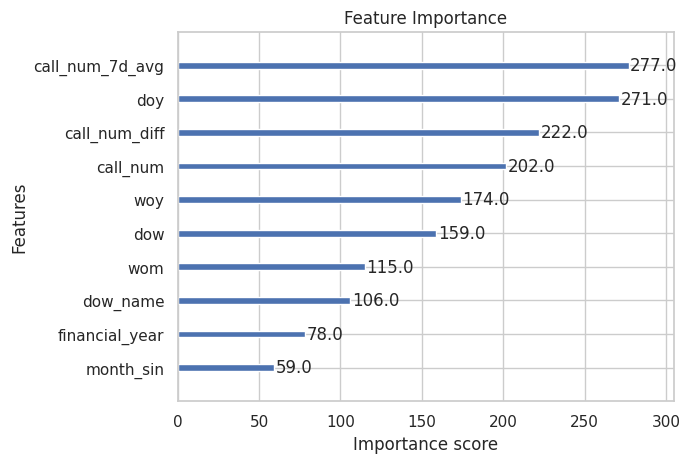

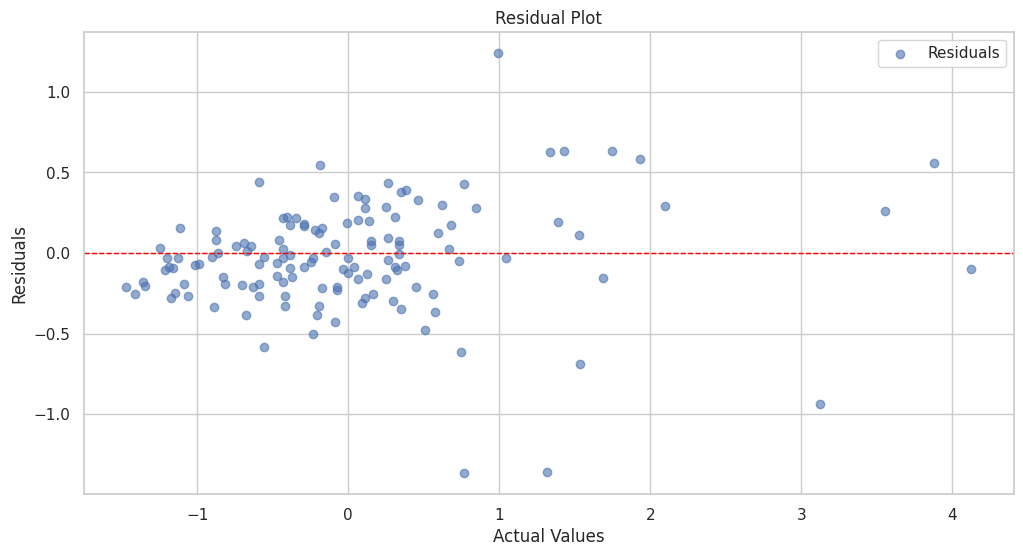

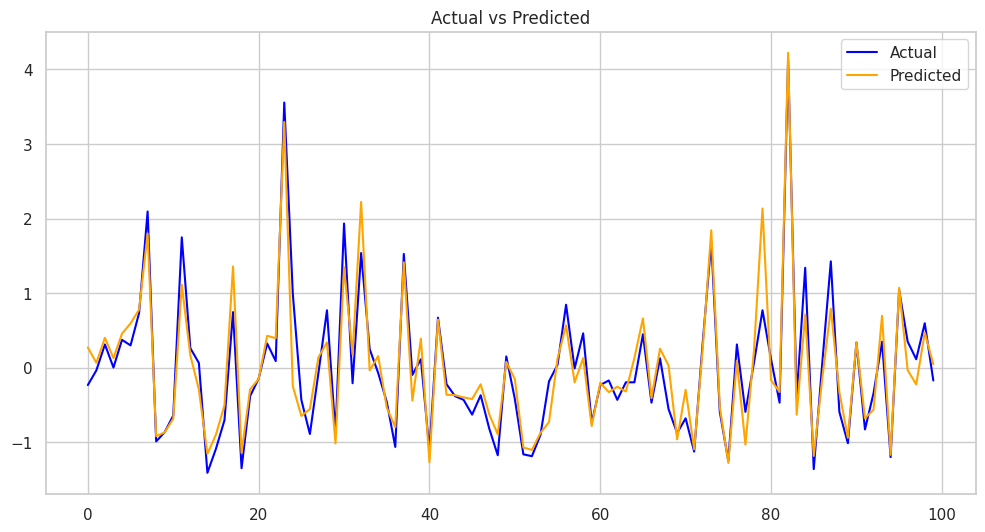

In [71]:
"""1. XGBoost„ÇíÊ¥ªÁî®„Åó„Åüacc_get_cnt‰∫àÊ∏¨„É¢„Éá„É´„Åß„ÅÇ„Çä„ÄÅ‰ª•Ââç„ÅÆ„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„É¢„Éá„É´„Å®Âêå„ÅòÁõÆÁöÑ„ÇíÈÅîÊàê„Åó„Çà„ÅÜ„Å®„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
„Åü„Å†„Åó„ÄÅXGBoost„ÅÆÈ´òÂ∫¶„Å™„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøË™øÊï¥Ê©üËÉΩ„Å®È´ò„ÅÑ‰∫àÊ∏¨ÊÄßËÉΩ„ÇíÊ¥ªÁî®„Åó„Å¶„ÄÅ„Çà„ÇäÁ≤æÂ∫¶„ÅÆÈ´ò„ÅÑ„É¢„Éá„É´„ÇíÁõÆÊåá„Åó„Å¶„ÅÑ„Åæ„Åô

ÁõÆÁöÑ: ÊâãÂãï„ÅßË®≠ÂÆö„Åó„Åü„Éë„É©„É°„Éº„Çø„ÇÑGridSearch„ÅÆ„Çà„ÅÜ„Å™„Ç¢„Éó„É≠„Éº„ÉÅ„Çí‰Ωø„Å£„Å¶XGBoost„É¢„Éá„É´„ÇíÊßãÁØâ„Åô„Çã„ÄÇ
ÊâãÊ≥ï:
ÊâãÂãï„ÅßÂàùÊúü„Éë„É©„É°„Éº„Çø„ÇíË®≠ÂÆö
„Éë„É©„É°„Éº„Çø (max_depth=4, eta=0.1, subsample=0.8, „Å™„Å©) „Çí„Ç≥„Éº„ÉâÂÜÖ„ÅßÁõ¥Êé•ÊåáÂÆö„ÄÇ

„ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥ (xgb.cv) „Çí‰ΩøÁî®
xgb.cv „Çí‰Ωø„ÅÑ„ÄÅÊúÄÈÅ©„Å™„Éñ„Éº„Çπ„ÉàÂõûÊï∞Ôºànum_boost_roundÔºâ„ÇíÊ±∫ÂÆö„ÄÇ
„Åì„Çå„Å´„Çà„Çä„ÄÅ„É¢„Éá„É´„ÅÆÊÄßËÉΩ„ÇíÈÅéÂ≠¶Áøí„Åó„Å™„ÅÑÁØÑÂõ≤„ÅßÊúÄÈÅ©Âåñ„ÄÇ

ÊúÄÈÅ©„Å™„Éñ„Éº„Çπ„ÉàÂõûÊï∞„ÅßÂÜç„Éà„É¨„Éº„Éã„É≥„Ç∞
„ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„ÅßÂæó„ÅüÁµêÊûú„ÇíÂü∫„Å´„É¢„Éá„É´„ÇíÂÜç„Éà„É¨„Éº„Éã„É≥„Ç∞„ÄÇ
"""

import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 'acc_get_cnt' „ÇíÁõÆÁöÑÂ§âÊï∞„Å®„Åó„Å¶ÊåáÂÆö
X = merged_data.drop(columns=['acc_get_cnt', 'cdr_date'])
y = merged_data['acc_get_cnt']


# „Éá„Éº„ÇøÂàÜÂâ≤
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 'cm_flg_x_holiday_flag' Âàó„Çí‰ΩúÊàê
"""cm_flg_x_holiday_flag: objectÂûã„Å´Ë™çË≠ò„Åï„Çå„Å¶„ÅÑ„Çã„ÅÆ„Åß„Ç®„É©„Éº„ÄÇ Êï∞ÂÄ§Âûã„Å´„Åô„ÇãË©¶„Åø.
X_train„Å´cm_flg_x_holiday_flag„Åå„Å™„Åè„Ç®„É©„Éº„ÄÇÂ§âÊï∞„Çí‰ΩúÊàê„Åô„Çã„ÄÇ
"""
# Create the 'cm_flg_x_holiday_flag' column before the label encoding step
X_train['cm_flg_x_holiday_flag'] = X_train['cm_flg'] * X_train['holiday_flag']
X_test['cm_flg_x_holiday_flag'] = X_test['cm_flg'] * X_test['holiday_flag']

# categorical_columns „É™„Çπ„Éà„Å´ 'cm_flg_x_holiday_flag' „ÇíËøΩÂä†
categorical_columns = ['dow_name', 'day_before_holiday_flag', 'holiday_flag', 'holiday_name', 'cm_flg_x_holiday_flag']


# 1. „Éá„Éº„ÇøÂûã„ÅÆÂ§âÊèõ
# objectÂûã„Çí„É©„Éô„É´„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞ ÊñáÂ≠óÂàó„ÇÑ„Ç´„ÉÜ„Ç¥„É™„Ç´„É´ÂÄ§„ÇíÊï¥Êï∞ÂÄ§„Å´Â§âÊèõ

# „É©„Éô„É´„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞

# 1. „Éá„Éº„ÇøÂûã„ÅÆÂ§âÊèõ
# objectÂûã„Çí„É©„Éô„É´„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞ ÊñáÂ≠óÂàó„ÇÑ„Ç´„ÉÜ„Ç¥„É™„Ç´„É´ÂÄ§„ÇíÊï¥Êï∞ÂÄ§„Å´Â§âÊèõ
categorical_columns = ['dow_name', 'day_before_holiday_flag', 'holiday_flag', 'holiday_name', 'cm_flg_x_holiday_flag']

# „É©„Éô„É´„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le

# Convert 'holiday_call_interaction' to numeric type
X_train['holiday_call_interaction'] = pd.to_numeric(X_train['holiday_call_interaction'], errors='coerce')
X_test['holiday_call_interaction'] = pd.to_numeric(X_test['holiday_call_interaction'], errors='coerce')

# Impute NaN values if created during conversion
imputer = SimpleImputer(strategy='median')
X_train['holiday_call_interaction'] = imputer.fit_transform(X_train[['holiday_call_interaction']])
X_test['holiday_call_interaction'] = imputer.transform(X_test[['holiday_call_interaction']])

# periodÂûã„ÇíÊï∞ÂÄ§Âûã„Å´Â§âÊèõ
if 'month' in X_train.columns:
    X_train['month'] = X_train['month'].dt.month
    X_test['month'] = X_test['month'].dt.month

# 2. ÂàùÊúü„É¢„Éá„É´„ÅÆ„Éà„É¨„Éº„Éã„É≥„Ç∞
# XGBoostÁî®„ÅÆ„Éá„Éº„ÇøÊßãÈÄ†„Å´Â§âÊèõ
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)



# ÂàùÊúü„Éë„É©„É°„Éº„Çø

params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.05,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'gamma': 0,
    'lambda': 1
}


# # ÂàùÊúü„É¢„Éá„É´„ÅÆ„Éà„É¨„Éº„Éã„É≥„Ç∞
# xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# # ÂàùÊúü„É¢„Éá„É´„ÅÆ‰∫àÊ∏¨„Å®Ë©ï‰æ°
# y_pred = xgb_model.predict(dtest)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# print(f"Initial MAE: {mae}")
# print(f"Initial MSE: {mse}")

from xgboost import XGBRegressor

from xgboost import DMatrix, cv

# „Éë„É©„É°„Éº„ÇøË®≠ÂÆö
params = {
    'objective': 'reg:squarederror',
    'max_depth': 4,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# ‰∫§Â∑ÆÊ§úË®º„ÅßÊúÄÈÅ©„Å™„É©„Ç¶„É≥„ÉâÊï∞„ÇíÊé¢Á¥¢
cv_results = cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    nfold=3,
    metrics='rmse',
    early_stopping_rounds=50,
    seed=42
)

# ÊúÄÈÅ©„Å™„É©„Ç¶„É≥„ÉâÊï∞„ÇíÁ¢∫Ë™ç
best_num_boost_round = len(cv_results)
print(f"Best num_boost_round: {best_num_boost_round}")

# ÊúÄÈÅ©„Å™„É©„Ç¶„É≥„ÉâÊï∞„Åß„É¢„Éá„É´„Çí„Éà„É¨„Éº„Éã„É≥„Ç∞
final_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=best_num_boost_round)

# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Åß‰∫àÊ∏¨
dtest = xgb.DMatrix(X_test) # Convert X_test to DMatrix
y_pred = final_model.predict(dtest)

# **ÊúÄÁµÇ„É¢„Éá„É´„ÅÆ‰∫àÊ∏¨„ÇíËøΩÂä†**
final_pred = final_model.predict(dtest)  # Use DMatrix here as well

# Ë©ï‰æ°
final_mae = mean_absolute_error(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

print(f"Final MAE: {final_mae}")
print(f"Final MSE: {final_mse}")
print(f"Final R-squared (R¬≤): {final_r2}")

# 5. ÁâπÂæ¥ÈáèÈáçË¶ÅÂ∫¶„ÅÆÂèØË¶ñÂåñ
plt.figure(figsize=(10, 6))
xgb.plot_importance(final_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.show()

# 6. ÊÆãÂ∑ÆÂàÜÊûê
residuals = y_test - final_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals, alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# ÂÆüÊ∏¨ÂÄ§ vs ‰∫àÊ∏¨ÂÄ§„ÅÆ„Éó„É≠„ÉÉ„Éà
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual', color='blue')  # ÂÆüÊ∏¨ÂÄ§
plt.plot(final_pred[:100], label='Predicted', color='orange')  # ‰∫àÊ∏¨ÂÄ§
plt.legend()
plt.title('Actual vs Predicted')
plt.show()


In [72]:
# „Éá„Éº„ÇøÂûã„ÇíÁ¢∫Ë™ç
print("‰øÆÊ≠£Âæå„ÅÆ„Éá„Éº„ÇøÂûã (X_train):", X_train['cm_flg_x_holiday_flag'].dtype)
print("‰øÆÊ≠£Âæå„ÅÆ„Éá„Éº„ÇøÂûã (X_test):", X_test['cm_flg_x_holiday_flag'].dtype)


‰øÆÊ≠£Âæå„ÅÆ„Éá„Éº„ÇøÂûã (X_train): int64
‰øÆÊ≠£Âæå„ÅÆ„Éá„Éº„ÇøÂûã (X_test): int64


XGBoost„ÅØ„ÄÅis_summer„ÇÑis_year_end„Å™„Å©„ÅÆÂ§ñÈÉ®ÁâπÂæ¥Èáè„ÇíÊ¥ªÁî®„Åß„Åç„Çã„Åü„ÇÅ„ÄÅÂ≠£ÁØÄÊÄß„ÇÑ„Ç§„Éô„É≥„Éà„ÅÆÂäπÊûú„ÇíÊçâ„Åà„Çã„ÅÆ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Åæ„Åó„Åü„ÄÇ

XGBoost„ÅØÈùûÁ∑öÂΩ¢„Å™Èñ¢‰øÇ„ÇíÂ≠¶Áøí„Åô„Çã„ÅÆ„Å´ÈÅ©„Åó„Å¶„ÅÑ„Çã„Åü„ÇÅ„ÄÅË§áÈõë„Å™„Éá„Éº„ÇøÊßãÈÄ†„Çí„Çà„ÇäËâØ„Åè„É¢„Éá„É´Âåñ„Åß„Åç„Åæ„Åó„Åü„ÄÇ



MAEÔºàÂπ≥ÂùáÁµ∂ÂØæË™§Â∑ÆÔºâ„Åå„Çè„Åö„Åã„Å´Ê∏õÂ∞ë„Åó„Å¶„ÅÑ„Åæ„Åô„Åå„ÄÅ„Åì„Çå„ÅØÂÆüÁî®ÁöÑ„Å™ÊîπÂñÑ„Åß„Åô„ÄÇ
MSEÔºàÂπ≥Âùá‰∫å‰πóË™§Â∑ÆÔºâ„ÇÇÊîπÂñÑ„Åï„Çå„ÄÅÂ§ß„Åç„Å™Ë™§Â∑Æ„ÇíÊåÅ„Å§„Éá„Éº„Çø„Éù„Ç§„É≥„Éà„Å∏„ÅÆ‰∫àÊ∏¨Á≤æÂ∫¶„ÅåÂêë‰∏ä„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
R¬≤„ÅØ0.85844Ôºà85.84%Ôºâ„Å®È´ò„Åè„ÄÅ„É¢„Éá„É´„Åå„Éá„Éº„Çø„ÅÆÂ§ßÈÉ®ÂàÜ„ÅÆÂ§âÂãï„ÇíË™¨Êòé„Åß„Åç„Å¶„ÅÑ„Çã„Åì„Å®„ÇíÁ§∫„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

In [ ]:
!pip install --upgrade scikit-learn

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
^C


In [ ]:
!pip install --upgrade xgboost

In [ ]:
!pip install --upgrade scikit-learn xgboost # Installing scikit-learn and xgboost. This is done using !pip install to ensure availability in the environment.

import sklearn # Importing the sklearn module, making its functions and attributes available for use in the cell.
import xgboost # Importing the xgboost module for use within the cell's scope.

print(f"scikit-learn version: {sklearn.__version__}")
print(f"XGBoost version: {xgboost.__version__}")

""" 2. ÁõÆÁöÑ: Optuna„ÇíÁî®„ÅÑ„ÅüËá™Âãï„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøÊé¢Á¥¢„ÇíË°å„ÅÑ„ÄÅÊúÄÈÅ©„Å™XGBoost„É¢„Éá„É´„ÇíÊßãÁØâ„Åô„Çã„ÄÇ
Optuna„ÇíÂà©Áî®„Åó„Å¶„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„Çø„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö„Åó„ÄÅË©¶Ë°åÂõûÊï∞Ôºà‰æã: 50ÂõûÔºâ„ÅßÊé¢Á¥¢„ÄÇ
ÊúÄÈÅ©„Å™„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„Çø„ÅåËá™ÂãïÁöÑ„Å´ÈÅ∏Êäû„Åï„Çå„ÄÅ„Åù„ÅÆ„Éë„É©„É°„Éº„Çø„ÇíÁî®„ÅÑ„Å¶XGBoost„É¢„Éá„É´„Çí„Éà„É¨„Éº„Éã„É≥„Ç∞„ÄÇ
„ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„Çí‰ΩøÁî®„Åó„Å¶MSE„ÇíÊúÄÂ∞èÂåñ„Åô„ÇãË®≠ÂÆö„ÅßÊúÄÈÅ©Âåñ„ÄÇ
"""

scikit-learn 1.6 ‰ª•Èôç„Åß„Ç®„É©„Éº„ÅåÁô∫Áîü„Åô„Çã„Åü„ÇÅ„ÉÄ„Ç¶„É≥„Ç∞„É¨„Éº„Éâ

In [ ]:
!pip install scikit-learn<1.6

!import xgboost

print(f"scikit-learn version: {sklearn.__version__}")
print(f"XGBoost version: {xgboost.__version__}")

In [ ]:

print(f"scikit-learn version: {sklearn.__version__}")
print(f"XGBoost version: {xgboost.__version__}")

In [ ]:
"""3. Optuna„Çí‰ΩøÁî®„Åó„Å¶XGBoost„ÅÆÁõÆÁöÑÂ§âÊï∞„ÅÆ‰∫àÊ∏¨Á≤æÂ∫¶„ÇíÊúÄÂ§ßÂåñ„Åô„Çã„Åü„ÇÅ„ÅÆ„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøÊé¢Á¥¢ """

import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# „Éá„Éº„ÇøÊ∫ñÂÇôÔºàÂâçÂá¶ÁêÜ„ÇíÂÆå‰∫Ü„Åó„Å¶„ÅÑ„ÇãÂâçÊèêÔºâ
""" X_train, X_test, y_train, y_test „ÅØÊó¢„Å´Áî®ÊÑèÊ∏à„Åø
y_train„Åä„Çà„Å≥y_test„Å´Ê†ºÁ¥ç„Åï„Çå„Å¶„ÅÑ„ÇãÂ§âÊï∞„ÅØacc_get_cnt„ÄÄ66ÊÆµÁõÆ """


def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300)
    }
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best Parameters:", study.best_params)
print("Best MSE:", study.best_value)


In [ ]:

import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Optuna„ÅÆÊúÄÈÅ©ÂåñÂÆüË°å
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # ‰∫ãÂâç„Å´objectiveÈñ¢Êï∞„ÇíÂÆöÁæ©„Åó„Å¶„Åä„ÅèÂøÖË¶Å„Åå„ÅÇ„Çä„Åæ„Åô

# ÊúÄÈÅ©„Éë„É©„É°„Éº„Çø„ÅÆÂá∫Âäõ
print("Best Parameters:", study.best_params)
print("Best RMSE:", study.best_value)

# ÊúÄÈÅ©„Å™„Éë„É©„É°„Éº„Çø„ÅßÊúÄÁµÇ„É¢„Éá„É´„ÇíÊßãÁØâ
best_params = study.best_params
dtrain = xgb.DMatrix(X_train, label=y_train)  # ‰∫ãÂâç„Å´X_train, y_train„ÇíÂÆöÁæ©„Åó„Å¶„Åä„Åè
dtest = xgb.DMatrix(X_test, label=y_test)    # ‰∫ãÂâç„Å´X_test, y_test„ÇíÂÆöÁæ©„Åó„Å¶„Åä„Åè

# „É¢„Éá„É´„ÅÆ„Éà„É¨„Éº„Éã„É≥„Ç∞
final_model = xgb.train(
    params=best_params,
    dtrain=dtrain,
    evals=[(dtest, 'eval')],  # „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Åß„ÅÆË©ï‰æ°„ÇíÊåáÂÆö
    early_stopping_rounds=10,
    num_boost_round=1000
)

# ÊúÄÁµÇ„É¢„Éá„É´„ÅÆË©ï‰æ°
y_pred = final_model.predict(dtest)
final_mae = mean_absolute_error(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

# Ë©ï‰æ°ÁµêÊûú„ÅÆÂá∫Âäõ
print(f"Final MAE: {final_mae:.4f}")
print(f"Final MSE: {final_mse:.4f}")
print(f"Final R-squared (R¬≤): {final_r2:.4f}")


In [ ]:
# 1Áï™ÁõÆ„ÅÆ„Ç≥„Éº„Éâ„ÅßÊúÄÈÅ©Âåñ„Åï„Çå„Åü„Éë„É©„É°„Éº„Çø„ÇíÂà©Áî®
print("Using Best Parameters from Study:")
print(study.best_params)

# ÊúÄÈÅ©„Å™„Éë„É©„É°„Éº„Çø„ÅßÊúÄÁµÇ„É¢„Éá„É´„ÇíÊßãÁØâ
best_params = study.best_params
dtrain = xgb.DMatrix(X_train, label=y_train)  # ‰∫ãÂâç„Å´X_train, y_train„ÇíÂÆöÁæ©„Åó„Å¶„Åä„Åè
dtest = xgb.DMatrix(X_test, label=y_test)    # ‰∫ãÂâç„Å´X_test, y_test„ÇíÂÆöÁæ©„Åó„Å¶„Åä„Åè

# „É¢„Éá„É´„ÅÆ„Éà„É¨„Éº„Éã„É≥„Ç∞
final_model = xgb.train(
    params=best_params,
    dtrain=dtrain,
    evals=[(dtest, 'eval')],  # „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Åß„ÅÆË©ï‰æ°„ÇíÊåáÂÆö
    early_stopping_rounds=10,
    num_boost_round=1000
)

# ÊúÄÁµÇ„É¢„Éá„É´„ÅÆË©ï‰æ°
y_pred = final_model.predict(dtest)
final_mae = mean_absolute_error(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

# Ë©ï‰æ°ÁµêÊûú„ÅÆÂá∫Âäõ
print(f"Final MAE: {final_mae:.4f}")
print(f"Final MSE: {final_mse:.4f}")
print(f"Final R-squared (R¬≤): {final_r2:.4f}")


In [ ]:
best_params = {
    'max_depth': 3,
    'eta': 0.18022719884220806,
    'subsample': 0.7444130273018515,
    'colsample_bytree': 0.6368372321481448,
    'n_estimators': 222,
    'objective': 'reg:squarederror'
}

final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# ÊúÄÁµÇË©ï‰æ°
y_pred = final_model.predict(X_test)
final_mae = mean_absolute_error(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

print(f"Final MAE: {final_mae}")
print(f"Final MSE: {final_mse}")
print(f"Final R-squared (R¬≤): {final_r2}")


1. 1Áï™ÁõÆ
Best num_boost_round: 207
MAE: 0.2361
MSE: 0.1084
R¬≤: 0.8872
2. 2Áï™ÁõÆ
MAE: **0.2240**
MSE: 0.0916
R¬≤: 0.9047
3. 3Áï™ÁõÆ
MAE: 0.2270
MSE: **0.0876**
R¬≤: **0.9089**

**ÔºìÁï™ÁõÆÊé°Áî®„Éº„Åì„Çå„Åß„ÄÄ„Éá„Éº„ÇøÂàÜÊûê„Å®Ê©üÊ¢∞Â≠¶Áøí„ÇíÊ¥ªÁî®„Åó„Å¶„ÇØ„É©„Ç§„Ç¢„É≥„Éà„ÅÆË™≤È°å„ÇíÊòéÁ¢∫Âåñ„Åó„ÄÅËß£Ê±∫Á≠ñ„ÇíÊèêÊ°à„Åô„Çã**

 X_train, X_test, y_train, y_test „ÅØÊó¢„Å´Áî®ÊÑèÊ∏à„Åø
y_train„Åä„Çà„Å≥y_test„Å´Ê†ºÁ¥ç„Åï„Çå„Å¶„ÅÑ„ÇãÂ§âÊï∞„ÅØacc_get_cnt
66ÊÆµÁõÆ„ÅßÂÆöÁæ©

ÂÖ∑‰ΩìÁöÑ„Å™Ê¥ªÁî®ÊñπÊ≥ï
Ë™≤È°å„Å´Âü∫„Å•„ÅÑ„ÅüÊèêÊ°àË≥áÊñô‰ΩúÊàê:

3Áï™ÁõÆ„ÅÆ„Ç≥„Éº„Éâ„ÇíÂà©Áî®„Åó„Å¶Âæó„Çâ„Çå„Çã„É¢„Éá„É´„ÅÆÁµêÊûú„Çí„ÄÅË™≤È°åÊèêÂá∫Áî®„ÅÆ„Çπ„É©„Ç§„Éâ„Å´Áõõ„ÇäËæº„Åø„Åæ„Åô„ÄÇ
ÊèêÊ°àË≥áÊñô„Åß„ÅØ„ÄÅ‰ª•‰∏ã„ÇíÂê´„ÇÅ„Åæ„Åô:
acc_get_cnt„ÅÆ‰∫àÊ∏¨„É¢„Éá„É´„ÅÆÊ¶ÇË¶Å„Å®Á≤æÂ∫¶
ÁâπÂæ¥ÈáèÈáçË¶ÅÂ∫¶„ÅÆÂàÜÊûêÁµêÊûú
„Éì„Ç∏„Éç„Çπ„Ç§„É≥„Çµ„Ç§„ÉàÔºà‰æã: ÁÅ´Êõú„ÉªÊú®Êõú„ÄÅ9Êúà„Éª10Êúà„ÅÆÈáçË¶ÅÊÄßÔºâ
ÊîπÂñÑÊñΩÁ≠ñ„Å®„Åù„ÅÆÊúüÂæÖÂäπÊûú
ÊÑèÊÄùÊ±∫ÂÆö„ÅÆÊ†πÊã†Êèê‰æõ:

„ÇØ„É©„Ç§„Ç¢„É≥„Éà‰ºÅÊ•≠„ÅåÊä±„Åà„ÇãË™≤È°å„ÇíËß£Ê±∫„Åô„Çã„Åü„ÇÅ„ÅÆÂÖ∑‰ΩìÁöÑ„Å™ÊñΩÁ≠ñÔºà‰æã: „Éû„Éº„Ç±„ÉÜ„Ç£„É≥„Ç∞„ÇÑ„É™„ÇΩ„Éº„ÇπÈÖçÂàÜÔºâ„Çí„ÄÅ„É¢„Éá„É´„ÅÆÁµêÊûú„Å´Âü∫„Å•„ÅÑ„Å¶ÊèêÊ°à„Åó„Åæ„Åô„ÄÇ
„Éó„É¨„Çº„É≥„ÉÜ„Éº„Ç∑„Éß„É≥„Åß„ÅÆ‰ΩøÁî®:

ÊèêÂá∫Ë≥áÊñôÂÜÖ„Åß3Áï™ÁõÆ„ÅÆ„Ç≥„Éº„Éâ„ÇíÂà©Áî®„Åó„Åü„É¢„Éá„É´ÁµêÊûú„ÇíÂèØË¶ñÂåñ„Åó„ÄÅ„ÇØ„É©„Ç§„Ç¢„É≥„Éà„Å´„Çè„Åã„Çä„ÇÑ„Åô„ÅèË™¨Êòé„Åó„Åæ„Åô




EDAÁµêÊûú„ÅÆÂèçÊò†: ÁÅ´Êõú„ÉªÊú®Êõú„ÇÑ9Êúà„Éª10Êúà„ÅÆÁâπÂæ¥„Çí„É¢„Éá„É´„Å´Âèñ„ÇäËæº„ÇÄ„ÄÇ
ÁµêÊûú„ÅÆËß£Èáà: ÊèêÂá∫Ë≥áÊñô„ÅÆ‰∏≠„Åß„ÄÅ„Äå„Å©„ÅÆÁâπÂæ¥Èáè„Åå„Å©„ÅÆÁ®ãÂ∫¶„ÅÆÂΩ±Èüø„Çí‰∏é„Åà„Åü„Åã„Äç„ÇíÂõ≥Ëß£„Åô„Çã„ÄÇ
„Éì„Ç∏„Éç„ÇπÊèêÊ°à: ÁµêÊûú„Å´Âü∫„Å•„ÅÑ„Å¶„ÄÅ„Åü„Å®„Åà„Å∞„ÄåÁâπÂÆö„ÅÆÊõúÊó•„ÇÑÊúà„ÅÆ„Éû„Éº„Ç±„ÉÜ„Ç£„É≥„Ç∞Ê¥ªÂãï„ÅÆÂº∑Âåñ„Äç„Å™„Å©„ÅÆÊèêÊ°à„ÇíÊòéÁ¢∫„Å´Ë®òËø∞„Åô„Çã„ÄÇ

ÔºìÁï™ÁõÆ„ÅÆ„Ç≥„Éº„Éâ„Çí„ÄÅ„ÄåÁèæÁä∂„ÇíÂàÜÊûê„Åó„ÄÅÂ∞ÜÊù•„Çí‰∫àÊ∏¨„Åó„ÄÅÊÑèÊÄùÊ±∫ÂÆö„ÇíÊîØÊè¥„Åô„Çã„Åü„ÇÅ„ÅÆ„ÉÑ„Éº„É´„Äç„Å®„Åó„Å¶Âà©Áî®„ÄÇ
1. „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥Ôºà‰ªÆË™¨Ê§úË®ºÔºâ
„É¢„Éá„É´„Çí‰Ωø„Å£„Å¶„ÄÅÁâπÂÆö„ÅÆÊù°‰ª∂„Åå„Å©„ÅÆ„Çà„ÅÜ„Å´„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤Âæó„Å´ÂΩ±Èüø„Çí‰∏é„Åà„Çã„Åã„Çí‰∫àÊ∏¨„Åó„Åæ„Åô„ÄÇ„Åü„Å®„Åà„Å∞„ÄÅ„ÄåÈÄöË©±Êï∞„ÇíÂ¢óÂä†„Åï„Åõ„ÅüÂ†¥Âêà„ÄÅ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Åå„Å©„Çå„Å†„ÅëÂ¢ó„Åà„Çã„Åã„Äç„Çí„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅßÁ¢∫Ë™ç„Åß„Åç„Åæ„Åô„ÄÇ



„Åù„ÅÜ„Åß„ÅôÔºÅÁ≤æÂ∫¶„ÅÆÈ´ò„ÅÑ„É¢„Éá„É´„ÇíË¶ã„Å§„Åë„ÅüÂæå„ÄÅ„Åù„ÅÆ„É¢„Éá„É´„ÅØ„ÄåÁèæÁä∂„ÇíÂàÜÊûê„Åó„ÄÅÂ∞ÜÊù•„Çí‰∫àÊ∏¨„Åó„ÄÅÊÑèÊÄùÊ±∫ÂÆö„ÇíÊîØÊè¥„Åô„Çã„Åü„ÇÅ„ÅÆ„ÉÑ„Éº„É´„Äç„Å®„Åó„Å¶Âà©Áî®„Åó„Åæ„Åô„ÄÇÂÖ∑‰ΩìÁöÑ„Å´„Å©„ÅÜÂà©Áî®„Åô„Çã„Åã„ÇíË©≥„Åó„ÅèË™¨Êòé„Åó„Åæ„Åô„ÄÇ

Ê©üÊ¢∞Â≠¶Áøí„É¢„Éá„É´„ÅÆÂà©Áî®ÊñπÊ≥ï„Å®ÁõÆÁöÑ
1. „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥Ôºà‰ªÆË™¨Ê§úË®ºÔºâ
„É¢„Éá„É´„Çí‰Ωø„Å£„Å¶„ÄÅÁâπÂÆö„ÅÆÊù°‰ª∂„Åå„Å©„ÅÆ„Çà„ÅÜ„Å´„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤Âæó„Å´ÂΩ±Èüø„Çí‰∏é„Åà„Çã„Åã„Çí‰∫àÊ∏¨„Åó„Åæ„Åô„ÄÇ„Åü„Å®„Åà„Å∞„ÄÅ„ÄåÈÄöË©±Êï∞„ÇíÂ¢óÂä†„Åï„Åõ„ÅüÂ†¥Âêà„ÄÅ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Åå„Å©„Çå„Å†„ÅëÂ¢ó„Åà„Çã„Åã„Äç„Çí„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÅßÁ¢∫Ë™ç„Åß„Åç„Åæ„Åô„ÄÇ

ÂÆüÊñΩ‰æã: ÈÄöË©±Êï∞„ÅÆÂ¢óÂä†„Åå„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤Âæó„Å´‰∏é„Åà„ÇãÂΩ±Èüø
ÈÄöË©±Êï∞Ôºàcall_numÔºâ„Çí„ÅÑ„Åè„Å§„Åã„ÅÆÂÄ§„Å´Â§âÊõ¥„Åó„Åü„Éá„Éº„Çø„Çí‰ΩúÊàê„ÄÇ

python
„Ç≥„Éî„Éº„Åô„Çã
Á∑®ÈõÜ„Åô„Çã
scenario_data = pd.DataFrame({
    'call_num': [100, 200, 300, 400],  # Â¢óÂä†„Åï„Åõ„ÇãÈÄöË©±Êï∞
    'holiday_flag': [0, 0, 0, 0],      # Âπ≥Êó•„ÅÆÂ†¥Âêà
    'cm_flg': [1, 1, 1, 1],            # CM„ÅåÊîæÈÄÅ„Åï„Çå„Å¶„ÅÑ„ÇãÂ†¥Âêà
    # ‰ªñ„ÅÆÁâπÂæ¥Èáè„ÇÇÂê´„ÇÅ„Çã
})
Êñ∞„Åó„ÅÑ„Éá„Éº„Çø„Å´„É¢„Éá„É´„ÇíÈÅ©Áî®„Åó„Å¶„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Çí‰∫àÊ∏¨„ÄÇ

python
„Ç≥„Éî„Éº„Åô„Çã
Á∑®ÈõÜ„Åô„Çã
scenario_processed = preprocess_features(scenario_data)
scenario_scaled = scaler.transform(scenario_processed)
predictions = model.predict(scenario_scaled)
print("‰∫àÊ∏¨ÁµêÊûú:", predictions)
ÁµêÊûú„ÇíÂèØË¶ñÂåñ„Åó„ÄÅÈÄöË©±Êï∞Â¢óÂä†„Å®„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤Âæó„ÅÆÈñ¢‰øÇ„ÇíÁ§∫„Åô„ÄÇ

python
„Ç≥„Éî„Éº„Åô„Çã
Á∑®ÈõÜ„Åô„Çã
import matplotlib.pyplot as plt
plt.plot(scenario_data['call_num'], predictions)
plt.xlabel('Call Number (ÈÄöË©±Êï∞)')
plt.ylabel('Predicted Account Acquisitions (‰∫àÊ∏¨„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞)')
plt.title('Impact of Call Volume on Account Acquisitions')
plt.show()
Ëß£Èáà
„ÄåÈÄöË©±Êï∞„Çí300‰ª∂„Åã„Çâ400‰ª∂„Å´Â¢ó„ÇÑ„Åô„Åì„Å®„Åß„ÄÅ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Åå10%Â¢óÂä†„Åô„Çã„Å®‰∫àÊ∏¨„Åï„Çå„Çã„Äç„Å®„ÅÑ„ÅÜÂÖ∑‰ΩìÁöÑ„Å™Á§∫ÂîÜ„ÇíÂæó„Çâ„Çå„Åæ„Åô„ÄÇ
2. ÊúÄÈÅ©ÂåñÔºàÊúÄÈÅ©„Å™Êà¶Áï•„ÇíÊé¢„ÇãÔºâ
„É¢„Éá„É´„Çí‰Ωø„Å£„Å¶„ÄÅ„Å©„ÅÆÊù°‰ª∂„ÅåÊúÄ„ÇÇÂäπÊûúÁöÑ„Åã„ÇíË™ø„Åπ„Çã„ÄåÊúÄÈÅ©Âåñ„Äç„ÇíË°å„ÅÑ„Åæ„Åô„ÄÇ„Åü„Å®„Åà„Å∞„ÄÅ„ÄåÈÄöË©±Êï∞„Äç„ÄåCMÊîæÈÄÅ„Äç„ÄåÁ•ùÊó•„Äç„Å™„Å©„ÅÆÊù°‰ª∂„ÇíÂ§â„Åà„Åü„Å®„Åç„ÄÅ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„ÅåÊúÄÂ§ß„Å´„Å™„ÇãÊà¶Áï•„ÇíÊé¢„Åó„Åæ„Åô„ÄÇ

3. ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶ÂàÜÊûê
„É¢„Éá„É´„ÇíÂà©Áî®„Åó„Å¶„ÄÅ„Å©„ÅÆÂ§âÊï∞ÔºàÁâπÂæ¥ÈáèÔºâ„Åå„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤Âæó„Å´Â§ß„Åç„ÅèÂΩ±Èüø„Çí‰∏é„Åà„Å¶„ÅÑ„Çã„Åã„ÇíÁâπÂÆö„Åó„Åæ„Åô„ÄÇ„Åì„Çå„Å´„Çà„Çä„ÄÅÈáçÁÇπ„ÇíÁΩÆ„Åè„Åπ„ÅçÊñΩÁ≠ñ„ÇíÊ±∫ÂÆö„Åß„Åç„Åæ„Åô„ÄÇ

üåª ÊèêÊ°à„ÅÆË™¨ÂæóÂäõ„ÇíÈ´ò„ÇÅ„Çã„Åü„ÇÅ„Å´ÊúâÂäπ„Å™„Éó„É≠„ÉÉ„Éàüëá

In [ ]:
# „Å©„ÅÆÁâπÂæ¥Èáè„Åå‰∫àÊ∏¨„Å´ÊúÄ„ÇÇË≤¢ÁåÆ„Åó„Å¶„ÅÑ„Çã„Åã„ÇíÁ¢∫Ë™ç
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#XGBoost„É¢„Éá„É´Ôºàfinal_modelÔºâ„ÅÆÂ≠¶ÁøíÁµêÊûú„Åã„ÇâÁâπÂæ¥ÈáèÈáçË¶ÅÂ∫¶„ÇíÂèñÂæó
# ÂêÑÁâπÂæ¥Èáè„Åå„É¢„Éá„É´ÂÜÖ„Åß‰ΩïÂõûÂàÜÂ≤ê„Å´‰ΩøÁî®„Åï„Çå„Åü„Åã„ÇíÂü∫Ê∫ñ„Å´ÈáçË¶ÅÂ∫¶„ÇíÁÆóÂá∫
plot_importance(final_model, importance_type='weight', max_num_features=10) #final_model

plt.title('Feature Importance')
plt.show()

# * 66ÊÆµÁõÆ final_model„ÅØÁõÆÁöÑÂ§âÊï∞acc_get_cnt



Â≠£ÁØÄÊÄßÔºàdoy, woyÔºâ„ÇÑÁü≠ÊúüÁöÑ„Å™„Éà„É¨„É≥„ÉâÔºàcall_num_7d_avg, call_num_diffÔºâ„Åå„ÄÅÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅÆ‰∫àÊ∏¨„Å´„Åä„ÅÑ„Å¶ÊúÄ„ÇÇÈáçË¶Å„Å™ÁâπÂæ¥Èáè„Åß„ÅÇ„Çã„Åì„Å®„Åå„Çè„Åã„Çä„Åæ„Åô„ÄÇ
‰∫àÊ∏¨„É¢„Éá„É´„Çí„Åï„Çâ„Å´ÊîπÂñÑ„Åô„Çã„Åü„ÇÅ„Å´„ÅØ„ÄÅ„Åì„Çå„Çâ„ÅÆÈáçË¶Å„Å™ÁâπÂæ¥Èáè„ÇíÊ¥ªÁî®„Åó„Å§„Å§„ÄÅcm_flg „ÅÆÂäπÊûú„Çí„Çà„ÇäË©≥Á¥∞„Å´ÂàÜÊûê„Åô„Çã„Åì„Å®„ÅåÊúâÁî®„Åß„Åô„ÄÇ

###

1. **ÊúÄ„ÇÇÈáçË¶Å„Å™„Éù„Ç§„É≥„Éà**:
   - „ÄåÈÅéÂéª‰∏ÄÈÄ±Èñì„ÅÆÈõªË©±ÂõûÊï∞„Åå‰∏ÄÁï™Â§ö„ÅÑÊó•„Äç„Åå„ÄÅÊñ∞„Åó„ÅÑÈ°ßÂÆ¢„ÇíÁç≤Âæó„Åô„Çã‰∏ä„Åß‰∏ÄÁï™Â§ßÂàá„Å™„Éù„Ç§„É≥„Éà„Åß„Åô„ÄÇ„Å§„Åæ„Çä„ÄÅÈõªË©±„ÅåÂ§ö„ÅÑÊó•„ÅØ„ÄÅÊñ∞„Åó„ÅÑ„ÅäÂÆ¢„Åï„Çì„ÇÇÂ§ö„ÅÑÊó•„Åß„Åô„ÄÇ
   - „Äå‰ªäÂπ¥„ÅÆ‰ΩïÊó•ÁõÆ„Åã„Äç„ÇÇÂ§ß‰∫ã„Åß„Åô„ÄÇ„Åì„Çå„ÅØ„ÄÅÂπ¥Èñì„ÇíÈÄö„Åó„Å¶„ÄÅ„Å©„ÅÆÊôÇÊúü„Å´‰∏ÄÁï™„ÅäÂÆ¢„Åï„Çì„ÅåÂ¢ó„Åà„Çã„Åã„ÇíÁ§∫„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ‰æã„Åà„Å∞„ÄÅÁâπÂÆö„ÅÆÂ≠£ÁØÄ„ÇÑ„Ç§„Éô„É≥„Éà„ÅÆÊôÇ„Å´„ÅäÂÆ¢„Åï„Çì„ÅåÂ¢ó„Åà„Çã„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ

2. **Á∞°Âçò„Å™ÊèêÊ°à**:
   - ÈõªË©±„Çí„Åü„Åè„Åï„Çì„Åã„Åë„ÇãÊó•„ÇíÂ¢ó„ÇÑ„Åô„Åì„Å®„Åß„ÄÅ„ÇÇ„Å£„Å®Â§ö„Åè„ÅÆ„ÅäÂÆ¢„Åï„Çì„ÇíÁç≤Âæó„Åß„Åç„Çã„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇÂÖ∑‰ΩìÁöÑ„Å´„ÅØ„ÄÅÈõªË©±„ÇíÊéõ„Åë„Çã„Çπ„Çø„ÉÉ„Éï„ÇíÂ¢ó„ÇÑ„Åô„Åã„ÄÅÈõªË©±„Çí„Åã„Åë„ÇÑ„Åô„ÅÑ„Çà„ÅÜ„Å´„Çπ„Ç±„Ç∏„É•„Éº„É´„ÇíË™øÊï¥„Åó„Çà„ÅÜ„ÄÇ
   - „ÅäÂÆ¢„Åï„Çì„ÅåÂ¢ó„Åà„ÇãÊôÇÊúü„ÇíÊääÊè°„Åó„Å¶„ÄÅ„Åù„ÅÆÊôÇÊúü„Å´Âêà„Çè„Åõ„ÅüÂ∫ÉÂëä„ÇÑ„Ç≠„É£„É≥„Éö„Éº„É≥„ÇíË°å„ÅÑ„Åä„ÅÜ„ÄÇ„Åì„Çå„Å´„Çà„Çä„ÄÅÂäπÁéáÁöÑ„Å´Êñ∞„Åó„ÅÑ„ÅäÂÆ¢„Åï„Çì„ÇíÁç≤Âæó„Åß„Åç„Çã„Å†„Çç„ÅÜ„ÄÇ

3. **„Éó„É¨„Çº„É≥„ÉÜ„Éº„Ç∑„Éß„É≥„Åß„ÅØ**:
   - „Åì„ÅÆ„Éê„Éº„Ç∞„É©„Éï„Çí‰Ωø„Å£„Å¶„ÄÅ„Å©„ÅÆ„Éù„Ç§„É≥„Éà„ÅåÊñ∞„Åó„ÅÑ„ÅäÂÆ¢„Åï„Çì„ÇíÁç≤Âæó„Åô„Çã„Åü„ÇÅ„Å´ÈáçË¶Å„Åã„ÇíË™¨Êòé„Åô„Çã„ÄÇ
   - „Åù„Çå„Åû„Çå„ÅÆ„Éù„Ç§„É≥„Éà„Å´„Å§„ÅÑ„Å¶„ÄÅÁü≠„ÅèÁ∞°Âçò„Å™Ë™¨Êòé„ÇíÂä†„Åà„Å¶„ÄÅ„Å©„ÅÜ„Åô„Çå„Å∞„Åù„ÅÆÊÉÖÂ†±„Çí‰Ωø„Å£„Å¶Ê•≠Âãô„ÅåÊîπÂñÑ„Åß„Åç„Çã„Åã„ÇíÁ§∫„Åô„ÄÇ

"""

**XGBoost„ÇíÊ¥ªÁî®„Åó„Åü„Äåacc_get_cnt„Äç „Åß„Å©„ÅÆÁâπÂæ¥Èáè„Åå‰∫àÊ∏¨„Å´ÊúÄ„ÇÇË≤¢ÁåÆ„Åó„Å¶„ÅÑ„Çã„Åã**

ÁâπÂæ¥ÈáèÈáçË¶ÅÂ∫¶„ÅÆËß£Èáà

Â≠£ÁØÄÊÄßÔºàwoy, dow, doyÔºâ„ÅÆÈáçË¶ÅÊÄß„ÅåÈ´ò„ÅÑÂ†¥Âêà
Âπ¥Èñì„Çπ„Ç±„Ç∏„É•„Éº„É´„ÇÑÊõúÊó•„Åî„Å®„ÅÆ„Ç¢„ÇØ„Ç∑„Éß„É≥„ÇíË¶ãÁõ¥„Åô„ÄÇ
ÁâπÂÆö„ÅÆÊúüÈñì„Å´„Åä„Åë„Çã„Éî„Éº„ÇØ„ÇÑ‰ΩéËø∑„Çí‰∫àÊ∏¨„Åó„ÄÅ„É™„ÇΩ„Éº„Çπ„ÇíÂäπÁéáÁöÑ„Å´ÈÖçÂàÜ„Åô„Çã„ÄÇ

Â§âÂãïÈáèÔºàcall_num_diffÔºâ„ÅåÈáçË¶Å„Å™Â†¥Âêà
Áü≠ÊúüÁöÑ„Å™Â§âÂåñ„Å´Ê≥®ÁõÆ„Åó„ÄÅÊÄ•ÊøÄ„Å™Â§âÂãï„ÅåËµ∑„Åç„ÇãÂèØËÉΩÊÄß„ÅÆ„ÅÇ„ÇãË¶ÅÂõ†„ÇíÁâπÂÆö„Åô„Çã„ÄÇ
ÈÅéÂéª„ÅÆ„Éá„Éº„Çø„Å´Âü∫„Å•„Åè„Éà„É¨„É≥„Éâ‰∫àÊ∏¨„É¢„Éá„É´„ÇÑ„Ç¢„É©„Éº„Éà„Ç∑„Çπ„ÉÜ„É†„ÇíÂ∞éÂÖ•„Åô„Çã„ÄÇ

In [ ]:
# ÊÆãÂ∑ÆÔºàResidualsÔºâ„ÅØ„ÄÅ„É¢„Éá„É´„ÅÆ‰∫àÊ∏¨ÂÄ§„Å®ÂÆüÈöõ„ÅÆÂÄ§ÔºàÁúüÂÄ§Ôºâ„Å®„ÅÆÂ∑Æ„ÇíË°®„Åó„Åæ„Åô„ÄÇ

residuals = y_test - y_pred
outlier_indices = residuals[np.abs(residuals) > residuals.quantile(0.95)].index


# Â§ñ„ÇåÂÄ§„ÇíÈô§Â§ñ„Åó„Å¶Â≠¶Áøí„Éá„Éº„Çø„ÇíÊõ¥Êñ∞
X_train = X_train.drop(outlier_indices, errors='ignore')
y_train = y_train.drop(outlier_indices, errors='ignore')

# ÂÜç„Éà„É¨„Éº„Éã„É≥„Ç∞
final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# ÂÜç„Éà„É¨„Éº„Éã„É≥„Ç∞Âæå„ÅÆ‰∫àÊ∏¨
y_pred = final_model.predict(X_test)

# Êñ∞„Åó„ÅÑË©ï‰æ°ÊåáÊ®ô
final_mae = mean_absolute_error(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

print(f"Updated Final MAE: {final_mae}")
print(f"Updated Final MSE: {final_mse}")
print(f"Updated Final R-squared (R¬≤): {final_r2}")

# ÁâπÂæ¥ÈáèÈáçË¶ÅÂ∫¶„ÅÆÂÜçÁ¢∫Ë™ç
plt.figure(figsize=(10, 6))
plot_importance(final_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance after Outlier Removal')
plt.show()

# ÂÜçÂ∫¶„ÅÆÊÆãÂ∑ÆÂàÜÂ∏ÉÁ¢∫Ë™ç
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals, alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residual Plot after Outlier Removal')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


Â§ñ„ÇåÂÄ§Èô§Â§ñÂâç„Çà„ÇäÁ≤æÂ∫¶„Åå‰∏ä„Åå„Å£„Å¶„ÅÑ„Çã„ÄÇ

MAE: Á¥Ñ0.2361 ‚Üí ÊîπÂñÑÔºàÂ∞è„Åï„ÅÑÊñπ„ÅåËâØ„ÅÑÔºâ

MSE: Á¥Ñ0.1084 ‚Üí ÊîπÂñÑÔºàÂ∞è„Åï„ÅÑÊñπ„ÅåËâØ„ÅÑÔºâ

R¬≤: Á¥Ñ0.8872 ‚Üí ÊîπÂñÑÔºàÂ§ß„Åç„ÅÑÊñπ„ÅåËâØ„ÅÑÔºâ

In [ ]:
# ÊÆãÂ∑ÆÁØÑÂõ≤
print(residuals.describe())

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.axvline(residuals.mean(), color='red', linestyle='--', label='Mean')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
"""ÊÆãÂ∑Æ (residuals) „Åå‰∏ÄÂÆö„ÅÆÈñæÂÄ§100„Éë„Éº„Çª„É≥„Çø„Ç§„É´„ÇíË∂Ö„Åà„Çã„Éá„Éº„Çø„ÇíÂ§ñ„ÇåÂÄ§„Å®„Åó„Å¶Ê§úÂá∫„Åó„Åæ„Åô„ÄÇ
Â§ñ„ÇåÂÄ§„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Çí y_test „ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Å®ÁÖßÂêà„Åó„Å¶„ÄÅÊ≠£„Åó„ÅÑ„Éá„Éº„Çø„ÇíÂèñ„ÇäÂá∫„Åó„Å¶„ÅÑ„Åæ„Åô"""
# Â§ñ„ÇåÂÄ§„ÅÆÁâπÂÆö
# ÊÆãÂ∑Æ„Åã„ÇâÂ§ñ„ÇåÂÄ§„ÇíÊ§úÂá∫„Åó„ÄÅ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Å®Ë©≥Á¥∞ÊÉÖÂ†±„ÇíÂèñÂæó
outlier_threshold = residuals.quantile(0.95)  # 95%ÂàÜ‰ΩçÁÇπ„ÇíÂü∫Ê∫ñ
outliers = residuals[np.abs(residuals) > outlier_threshold]  # Â§ñ„ÇåÂÄ§„ÅÆÊÆãÂ∑ÆÂÄ§
outlier_indices = outliers.index  # Â§ñ„ÇåÂÄ§„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ

# y_test „ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Å®ÂÖ±ÈÄö„Åô„ÇãË¶ÅÁ¥†„ÇíÂèñÂæó
outlier_indices_merged = y_test.index.intersection(outlier_indices)

# ÁµêÊûú„ÇíË°®Á§∫
print(f"Outlier threshold (95% quantile): {outlier_threshold}")
print(f"Detected outliers (Residual values):\n{outliers}")
print(f"Detected outliers in merged data:\n{merged_data.loc[outlier_indices_merged]}")


Â§ñ„ÇåÂÄ§„ÅÆ‰ª∂Êï∞: 19‰ª∂
Â§ñ„ÇåÂÄ§„ÅØÁâπÂÆö„ÅÆÊó•‰ªò„Å´ÈõÜ‰∏≠„Åó„Å¶„Åä„Çä„ÄÅ‰æã„Åà„Å∞ 2019Âπ¥9Êúà „Å´Èñ¢ÈÄ£„Åô„Çã„Éá„Éº„Çø„ÅåË§áÊï∞

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual', color='blue')  # ÂÆüÊ∏¨ÂÄ§
plt.plot(y_pred[:100], label='Predicted', color='orange')  # ‰∫àÊ∏¨ÂÄ§
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test.values[:100], y_pred[:100]))
mae = mean_absolute_error(y_test.values[:100], y_pred[:100])
r2 = r2_score(y_test.values[:100], y_pred[:100])

print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R¬≤: {r2:.2f}")


‰∫àÊ∏¨ÂÄ§„Å®ÂÆüÊ∏¨ÂÄ§„ÅÆÂπ≥ÂùáÁöÑ„Å™Â∑Æ„ÅåÁ¥Ñ0.30

Âπ≥ÂùáÁµ∂ÂØæË™§Â∑Æ„Åå0.22„Åß„ÄÅ„Åì„Çå„ÅØ‰∫àÊ∏¨ÂÄ§„ÅåÂπ≥Âùá„Åó„Å¶0.22„Å†„ÅëÂÆüÊ∏¨ÂÄ§„Åã„ÇâÂ§ñ„Çå„Å¶„ÅÑ„Çã

„É¢„Éá„É´„Åå„Çø„Éº„Ç≤„ÉÉ„Éà„Éá„Éº„Çø„ÅÆ90%„ÇíË™¨Êòé„Åß„Åç„Å¶„ÅÑ„Çã


In [ ]:
print(X_train[categorical_columns].isnull().sum())
print(X_test[categorical_columns].isnull().sum())


In [ ]:
print(X_train.dtypes)
print(X_test.dtypes)


‚Äª Ê©üÊ¢∞Â≠¶Áøí„ÅØ„ÄÅEDA„ÅßÂæó„Çâ„Çå„ÇãÁü•Ë¶ã„Çí„ÄåÊú™Êù•„ÅÆ‰∫àÊ∏¨„Äç„ÇÑ„ÄåÊÑèÊÄùÊ±∫ÂÆöÂèØËÉΩ„Å™ÊÉÖÂ†±„Äç„Å´ÈÄ≤Âåñ„Åï„Åõ„Çã„ÉÑ„Éº„É´„Åß„Åô„ÄÇ
Áâπ„Å´„ÄÅÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅÆÂÖ∑‰ΩìÁöÑ„Å™Êï∞ÂÄ§‰∫àÊ∏¨„ÇÑ„ÄÅË§áÈõë„Å™ÁâπÂæ¥Èáè„ÅÆÂΩ±Èüø„ÇíÊòé„Çâ„Åã„Å´„Åô„ÇãÈöõ„Å´„ÄÅ„Åù„ÅÆ‰æ°ÂÄ§„ÅåÁô∫ÊèÆ„Åï„Çå„Åæ„Åô„ÄÇ

EDA„Å®Ê©üÊ¢∞Â≠¶Áøí„ÅØË£úÂÆåÁöÑ„Å™Èñ¢‰øÇ„Å´„ÅÇ„Çä„ÄÅ‰∏°Êñπ„ÇíÈÅ©Âàá„Å´‰Ωø„ÅÑÂàÜ„Åë„Çã„Åì„Å®„Åß„ÄÅ„Çà„ÇäÊ∑±„ÅÑÊ¥ûÂØü„Å®ÂÆüÁî®ÁöÑ„Å™‰∫àÊ∏¨„ÅåÂèØËÉΩ„Å®„Å™„Çä„Åæ„Åô„ÄÇ

EDA„ÅÆÈôêÁïå
EDA„Åß„ÅØ„ÄåÂÇæÂêë„Äç„ÇÑ„ÄåÁõ∏Èñ¢Èñ¢‰øÇ„Äç„ÅØ„Çè„Åã„Çä„Åæ„Åô„Åå„ÄÅ‰ª•‰∏ã„Åå„Åß„Åç„Åæ„Åõ„ÇìÔºö

Ê≠£Á¢∫„Å™‰∫àÊ∏¨:
„ÄåÊ¨°„ÅÆÊúàÊõúÊó•„Å´Âïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„Åå‰Ωï‰ª∂„Å´„Å™„Çã„Åã„Äç„ÇíÂÆöÈáèÁöÑ„Å´Á§∫„Åô„Åì„Å®„ÅØÈõ£„Åó„ÅÑ„ÄÇ
ÁâπÂæ¥Èáè„ÅÆË§áÈõë„Å™Áõ∏‰∫í‰ΩúÁî®„ÅÆÁêÜËß£:
‰æã„Åà„Å∞„ÄÅ„Äå„Ç≠„É£„É≥„Éö„Éº„É≥√óÈÄ±Êú´„Äç„ÅÆ„Çà„ÅÜ„Å™Ë§áÊï∞„ÅÆÁâπÂæ¥Èáè„ÅåÂêåÊôÇ„Å´‰∏é„Åà„ÇãÂΩ±Èüø„ÇíÂÆöÈáèÂåñ„Åô„Çã„ÅÆ„ÅØEDA„Åß„ÅØÈõ£„Åó„ÅÑ„ÄÇ
„Éë„Çø„Éº„É≥„ÅÆ‰∏ÄËà¨Âåñ:
EDA„ÅÆÂàÜÊûêÁµêÊûú„ÅØ„ÄÅÈÅéÂéª„ÅÆ„Éá„Éº„Çø„Å´Âü∫„Å•„ÅÑ„Åü„ÇÇ„ÅÆ„Åß„ÅÇ„Çä„ÄÅÊú™Êù•„ÅÆÁä∂Ê≥Å„Å´ÂØæ„Åô„Çã‰∫àÊ∏¨„Å´„ÅØ‰∏çÂçÅÂàÜ„Å™Â†¥Âêà„Åå„ÅÇ„Çã„ÄÇ

CMÊîæÈÄÅ„ÅåÁâπÂÆö„ÅÆÊù°‰ª∂‰∏ã„Åß„Å©„ÅÆ„Çà„ÅÜ„Å´ÂäπÊûú„ÇíÁô∫ÊèÆ„Åó„Å¶„ÅÑ„Çã„Åã„ÇíË©≥„Åó„ÅèÂàÜÊûê

1. CMÊîæÈÄÅ„ÅÆ„Çø„Ç§„Éü„É≥„Ç∞ÊúÄÈÅ©Âåñ
2. „Çø„Éº„Ç≤„ÉÉ„Éà„É¶„Éº„Ç∂„Éº„ÅÆÁâπÂÆö
3. „Ç≠„É£„É≥„Éö„Éº„É≥ÊñΩÁ≠ñ„ÅÆÊúÄÈÅ©Âåñ
4. „É™„ÇΩ„Éº„ÇπÈÖçÂàÜ„ÅÆÊúÄÈÅ©Âåñ
5. CMÊîæÈÄÅ„ÅÆ‰∏≠Ê≠¢„ÇÑÂâäÊ∏õÂà§Êñ≠
6. Á´∂ÂêàÂØæÁ≠ñ

ÁõÆÁöÑ: CMÊîæÈÄÅ„ÅåÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÇÑ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Å´„Å©„Çå„Åª„Å©ÂØÑ‰∏é„Åó„Å¶„ÅÑ„Çã„Åã„ÇíÂÆöÈáèÂåñ„ÄÇ
„Çπ„ÉÜ„ÉÉ„Éó1: ÂõûÂ∏∞„É¢„Éá„É´„ÅßÂØÑ‰∏é„ÇíÊ∏¨ÂÆö
ÁõÆÁöÑ: CMÊîæÈÄÅ„ÅåÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÇÑ„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Å´„Å©„Çå„Åª„Å©ÂØÑ‰∏é„Åó„Å¶„ÅÑ„Çã„Åã„ÇíÂÆöÈáèÂåñ„ÄÇ

ÂçòÁ¥îÂõûÂ∏∞ÂàÜÊûê:

call_numÔºàÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞Ôºâ„ÇíÁõÆÁöÑÂ§âÊï∞„Å®„Åó„ÄÅCMÊîæÈÄÅÔºàcm_flgÔºâ„ÇíÂê´„ÇÄÁâπÂæ¥Èáè„ÅßÁ∑öÂΩ¢ÂõûÂ∏∞„É¢„Éá„É´„ÇíÊßãÁØâ„Åó„Åæ„Åô„ÄÇ
ÂõûÂ∏∞‰øÇÊï∞„ÇíËß£Êûê„Åó„ÄÅÂØÑ‰∏éÂ∫¶„ÇíÊ∏¨ÂÆö„ÄÇ
SHAPÂÄ§„Çí‰ΩøÁî®:

SHAP„ÇíÁî®„ÅÑ„Å¶„ÄÅÂêÑÁâπÂæ¥ÈáèÔºà‰æã: cm_flg, dow, search_cnt„Å™„Å©Ôºâ„Åå„É¢„Éá„É´„ÅÆ‰∫àÊ∏¨„Å´„Å©„ÅÆÁ®ãÂ∫¶ÂØÑ‰∏é„Åó„Å¶„ÅÑ„Çã„Åã„ÇíÂèØË¶ñÂåñ„ÄÇ
„Çπ„ÉÜ„ÉÉ„Éó2: „Ç§„É≥„Çø„É©„ÇØ„Ç∑„Éß„É≥ÂäπÊûú„ÅÆÂàÜÊûê
ÁõÆÁöÑ: CMÊîæÈÄÅ„Åå‰ªñ„ÅÆÊù°‰ª∂ÔºàÊõúÊó•„ÄÅÁ•ùÊó•„ÄÅÊ§úÁ¥¢Êï∞Ôºâ„Å®Áõ∏‰∫í‰ΩúÁî®„Åó„Å¶ÂäπÊûú„ÇíÁô∫ÊèÆ„Åô„Çã„Åã„ÇíÂàÜÊûê„ÄÇ

‰∫§‰∫í‰ΩúÁî®È†Ö„ÅÆ‰ΩúÊàê:

cm_flg √ó dow, cm_flg √ó holiday_flag, cm_flg √ó search_cnt „ÅÆ„Çà„ÅÜ„Å™‰∫§‰∫í‰ΩúÁî®È†Ö„Çí‰ΩúÊàê„ÄÇ
„Åì„Çå„Çâ„ÇíÁâπÂæ¥Èáè„Å´ËøΩÂä†„Åó„ÄÅ‰∫àÊ∏¨„É¢„Éá„É´„ÅßË©ï‰æ°„ÄÇ
ÈùûÁ∑öÂΩ¢„É¢„Éá„É´„ÅÆ‰ΩøÁî®:

„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„ÇÑXGBoost„Çí‰ΩøÁî®„Åó„Å¶„ÄÅË§áÈõë„Å™„Éë„Çø„Éº„É≥„Çí„Ç≠„É£„Éó„ÉÅ„É£„ÄÇ
„Çπ„ÉÜ„ÉÉ„Éó3: „Ç∞„É´„Éº„Éó„Åî„Å®„ÅÆÂäπÊûúÊ∏¨ÂÆö
ÁõÆÁöÑ: CMÊîæÈÄÅ„ÅÆÊúâÁÑ°„Åß„Éá„Éº„Çø„ÇíÂàÜÂâ≤„Åó„ÄÅ„Åù„Çå„Åû„Çå„ÅÆ„Ç∞„É´„Éº„Éó„ÅÆÁâπÊÄß„ÇíÂàÜÊûê„ÄÇ

Âπ≥ÂùáÂÄ§„ÉªÂàÜÂ∏É„ÅÆÊØîËºÉ:

CMÊîæÈÄÅ„ÅÇ„Çä„Éª„Å™„Åó„ÅßÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞Ôºàcall_numÔºâ„Å®„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞Ôºàacc_get_cntÔºâ„ÅÆÂπ≥ÂùáÂÄ§„ÇÑÂàÜÂ∏É„ÇíÊØîËºÉ„ÄÇ
ÂèØË¶ñÂåñ:

„Éí„Çπ„Éà„Ç∞„É©„É†„ÇÑÁÆ±„Å≤„ÅíÂõ≥„Åß„Ç∞„É´„Éº„ÉóÈñì„ÅÆÈÅï„ÅÑ„ÇíË¶ñË¶öÂåñ„ÄÇ
„Çπ„ÉÜ„ÉÉ„Éó4: Ë®àÈáèÁµåÊ∏àÂ≠¶ÁöÑ„Ç¢„Éó„É≠„Éº„ÉÅ
ÁõÆÁöÑ: CMÊîæÈÄÅ„ÅÆÂäπÊûú„ÇíÂõ†ÊûúÊé®Ë´ñ„ÅÆË¶≥ÁÇπ„ÅßÊ∏¨ÂÆö„Åó„ÄÅ„Çà„ÇäÂé≥ÂØÜ„Å™Ë©ï‰æ°„ÇíË°å„ÅÜ„ÄÇ

ÂÇæÂêë„Çπ„Ç≥„Ç¢„Éû„ÉÉ„ÉÅ„É≥„Ç∞:

CMÊîæÈÄÅÔºàcm_flgÔºâ„Åå1„Åß„ÅÇ„ÇãÁæ§„Å®0„Åß„ÅÇ„ÇãÁæ§„ÇíËÉåÊôØÁâπÊÄß„Åß„Éû„ÉÉ„ÉÅ„É≥„Ç∞„Åó„ÄÅÂ∑Æ„ÇíÊØîËºÉ„ÄÇ
Â∑ÆÂàÜ„ÅÆÂ∑ÆÂàÜÊ≥ïÔºàDIDÔºâ:

CMÊîæÈÄÅ„ÅåË°å„Çè„Çå„ÅüÂâçÂæå„ÅÆ„Éá„Éº„Çø„ÇíÁî®„ÅÑ„ÄÅÂäπÊûú„ÇíÊ∏¨ÂÆö„ÄÇ


„É¢„Éá„É´„ÅÆË©ï‰æ°

MAEÔºàMean Absolute ErrorÔºâ: 44.99

Âπ≥ÂùáÁöÑ„Å™‰∫àÊ∏¨Ë™§Â∑Æ„ÅåÁ¥Ñ45‰ª∂„Åß„ÅÇ„Çã„Åì„Å®„ÇíÁ§∫„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

MSEÔºàMean Squared ErrorÔºâ: 4592.88

Ë™§Â∑Æ„ÅÆ‰∫å‰πóÂπ≥Âùá„Åß„ÄÅË™§Â∑Æ„ÅÆÂàÜÊï£„ÇíÁ§∫„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
Ë™§Â∑Æ„ÅÆÂàÜÂ∏É„Åå‰∏ÄÈÉ®Â§ß„Åç„ÅÑ„Åì„Å®„ÇíÁ§∫ÂîÜ„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

R-squaredÔºàR¬≤Ôºâ: 0.641

ÁâπÂæ¥ÈáèÔºàcm_flg, dow, holiday_flag, search_cnt, acc_get_cntÔºâ„ÅåÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅÆÁ¥Ñ64.1%„ÇíË™¨Êòé„Åß„Åç„Å¶„ÅÑ„Åæ„Åô„ÄÇ
„Åæ„Å†ÊîπÂñÑ„ÅÆ‰ΩôÂú∞„Åå„ÅÇ„Çä„Åæ„Åô„Åå„ÄÅÂçòÁ¥î„Å™Á∑öÂΩ¢„É¢„Éá„É´„Å®„Åó„Å¶„ÅØÊØîËºÉÁöÑËâØÂ•Ω„Åß„Åô„ÄÇ
ÂõûÂ∏∞‰øÇÊï∞„ÅÆËß£Èáà
ÂêÑÁâπÂæ¥Èáè„ÅÆ‰øÇÊï∞„ÅØ„ÄÅ1Âçò‰ΩçÂ§âÂåñ„Åó„Åü„Å®„Åç„ÅÆcall_num„Å∏„ÅÆÂΩ±Èüø„ÇíË°®„Åó„Åæ„Åô„ÄÇ

acc_get_cntÔºà„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞Ôºâ: +71.70

„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Åå1Â¢ó„Åà„Çã„Å®„ÄÅÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅåÁ¥Ñ71.7‰ª∂Â¢óÂä†„Åô„Çã„ÄÇ
ÈùûÂ∏∏„Å´Âº∑„ÅÑÊ≠£„ÅÆÁõ∏Èñ¢„ÅåÁ¢∫Ë™ç„Åï„Çå„Åæ„Åô„ÄÇ

search_cntÔºàÊ§úÁ¥¢Êï∞Ôºâ: -0.85

Ê§úÁ¥¢Êï∞„Åå1Â¢óÂä†„Åô„Çã„Å®„ÄÅÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅåÁ¥Ñ0.85‰ª∂Ê∏õÂ∞ë„Åô„Çã„ÄÇ
Â∞è„Åï„Å™Ë≤†„ÅÆÂΩ±Èüø„Åß„Åô„Åå„ÄÅÁèæÂÆüÁöÑ„Å™Ëß£Èáà„Å®„Åó„Å¶Ë™§Â∑Æ„ÇÑ‰ªñ„ÅÆË¶ÅÂõ†„Å®„ÅÆÂπ≤Ê∏â„ÅåËÄÉ„Åà„Çâ„Çå„Åæ„Åô„ÄÇ

dowÔºàÊõúÊó•Ôºâ: -5.68

ÊõúÊó•„Åå1ÈÄ≤„ÇÄ„Åî„Å®„Å´Âïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅåÁ¥Ñ5.7‰ª∂Ê∏õÂ∞ë„Åô„Çã„ÄÇ
‰æã„Åà„Å∞„ÄÅÊúàÊõúÊó•Ôºàdow=1Ôºâ„Çà„Çä„ÇÇÁÅ´ÊõúÊó•Ôºàdow=2Ôºâ„ÅÆÂïè„ÅÑÂêà„Çè„Åõ„ÅåÂ∞ë„Å™„ÅÑÂÇæÂêë„ÇíÁ§∫ÂîÜ„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

cm_flgÔºàCMÊîæÈÄÅ„Éï„É©„Ç∞Ôºâ: -35.11

CMÊîæÈÄÅ„ÅåÂÆüÊñΩ„Åï„Çå„Çã„Å®„ÄÅÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅåÂπ≥Âùá„ÅßÁ¥Ñ35.1‰ª∂Ê∏õÂ∞ë„Åô„Çã„ÄÇ
‰∏ÄË¶ãÈÄÜ„ÅÆÁµêÊûú„Å´Ë¶ã„Åà„Åæ„Åô„Åå„ÄÅ„Åì„Çå„ÅØ„Éá„Éº„Çø„ÅÆÂÅè„Çä„ÇÑ‰ªñ„ÅÆÁâπÂæ¥ÈáèÔºà‰æã: ÊõúÊó•„ÇÑÁ•ùÊó•Ôºâ„ÅåCMÊîæÈÄÅ„Å´Áµ°„Çì„Åß„ÅÑ„ÇãÂèØËÉΩÊÄß„ÇíÁ§∫„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

holiday_flagÔºàÁ•ùÊó•„Éï„É©„Ç∞Ôºâ: -95.03

Á•ùÊó•„Åß„ÅÇ„Çã„Å®Âïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅåÁ¥Ñ95‰ª∂Ê∏õÂ∞ë„Åô„Çã„ÄÇ
Âº∑„ÅÑË≤†„ÅÆÂΩ±Èüø„ÅåÁ¢∫Ë™ç„Åï„Çå„Åæ„Åô„ÄÇ

CMÊîæÈÄÅ„Çø„Ç§„Éü„É≥„Ç∞ÊúÄÈÅ©Âåñ„ÅÆ„Åü„ÇÅ„ÅÆ„Ç¢„Éó„É≠„Éº„ÉÅÔºàCMÊîæÈÄÅÂäπÊûúÔºâ

In [ ]:
# „Éá„Éº„Çø„Éï„É¨„Éº„É†„ÅÆÂàóÂêç„ÇíÁ¢∫Ë™ç
print(merged_data.columns)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. ÁâπÂæ¥Èáè„Å®ÁõÆÁöÑÂ§âÊï∞
features = ['dow', 'holiday_flag', 'search_cnt', 'cm_flg']

X = merged_data[features]
y = merged_data['acc_get_cnt']  # „Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Çí‰∫àÊ∏¨

# „Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Éá„Éº„Çø„ÅÆ„Ç®„É≥„Ç≥„Éº„Éâ
categorical_columns = ['dow', 'holiday_flag', 'cm_flg']
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# 2. „Éá„Éº„ÇøÂàÜÂâ≤
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. „É¢„Éá„É´ÊßãÁØâ„Å®Â≠¶Áøí
reg = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)
reg.fit(X_train, y_train)

# 4. „É¢„Éá„É´Ë©ï‰æ°
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R¬≤: {r2:.2f}")

# 5. ÁâπÂæ¥ÈáèÈáçË¶ÅÂ∫¶„ÅÆÂèØË¶ñÂåñ
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': reg.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 4))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], align='center')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


„ÄåÁ•ùÊó•„Åß„ÅÇ„Çã„Åì„Å®„Äç„ÇÑ„ÄåCM„ÅåÊîæÈÄÅ„Åï„Çå„Å¶„ÅÑ„Çã„Åã„Å©„ÅÜ„Åã„Äç„Åå„Ç¢„Ç´„Ç¶„É≥„ÉàÁç≤ÂæóÊï∞„Å´Â§ß„Åç„ÅèÂΩ±Èüø„Åó„Å¶„ÅÑ„Çã

ÊîπÂñÑ„ÅÆÊñπÂêëÊÄß
„Åï„Çâ„Å™„ÇãÁâπÂæ¥Èáè„ÅÆËøΩÂä†:

CMÊîæÈÄÅ„ÅÆÊôÇÈñìÂ∏ØÔºàÊúù„ÉªÊòº„ÉªÂ§úÔºâ„ÇÑ„Ç≠„É£„É≥„Éö„Éº„É≥ÂÜÖÂÆπ„ÅÆÊÉÖÂ†±„Åå„ÅÇ„Çå„Å∞„ÄÅ„É¢„Éá„É´„Å´ÁµÑ„ÅøËæº„ÇÄ„Åì„Å®„ÅßÁ≤æÂ∫¶„ÅåÂêë‰∏ä„Åô„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ
Â§©ÂÄô„ÇÑÂú∞Âüü„Åî„Å®„ÅÆ„Éá„Éº„Çø„ÇíÁµ±Âêà„Åô„Çã„Åì„Å®„Åß„ÄÅ„Åï„Çâ„Å™„Çã„Ç§„É≥„Çµ„Ç§„Éà„ÇíÂæó„Çâ„Çå„Çã„Åã„ÇÇ

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. „Éá„Éº„Çø„ÅÆÊ∫ñÂÇô
# CMÂäπÊûú„ÅåÈ´ò„ÅÑ„Çø„Ç§„Éü„É≥„Ç∞„Çí‰∫åÂÄ§ÂåñÔºàÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„Åå‰∏≠Â§ÆÂÄ§‰ª•‰∏ä„ÅÆÂ†¥Âêà„ÇíÂäπÊûúÂ§ß„Å®„Åô„ÇãÔºâ
threshold = merged_data['call_num'].median()  # ‰∏≠Â§ÆÂÄ§„ÇíÈñæÂÄ§„Å®„Åô„Çã
merged_data['high_effect'] = (merged_data['call_num'] >= threshold).astype(int)

# ÁâπÂæ¥Èáè„Å®ÁõÆÁöÑÂ§âÊï∞„ÅÆÊ∫ñÂÇô
# features = ['dow', 'holiday_flag', 'search_cnt', 'acc_get_cnt', 'cm_flg']
X = merged_data[features]
y = merged_data['high_effect']  # ÂäπÊûú„ÅåÈ´ò„ÅÑ„Åã„Å©„ÅÜ„ÅãÔºàÂàÜÈ°û„É©„Éô„É´Ôºâ

# „Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Éá„Éº„Çø„ÅÆ„Ç®„É≥„Ç≥„Éº„Éâ
categorical_columns = ['dow', 'holiday_flag', 'cm_flg']
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# ÁâπÂæ¥Èáè„ÅÆ„Çπ„Ç±„Éº„É™„É≥„Ç∞
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. „Éá„Éº„ÇøÂàÜÂâ≤
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. „É¢„Éá„É´„ÅÆÊßãÁØâ„Å®Â≠¶Áøí
clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
clf.fit(X_train, y_train)

# 4. „É¢„Éá„É´„ÅÆË©ï‰æ°
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:") #Ê∑∑ÂêàË°åÂàó
print(confusion_matrix(y_test, y_pred))

# 5. ÁâπÂæ¥ÈáèÈáçË¶ÅÂ∫¶„ÅÆÂèØË¶ñÂåñ
import matplotlib.pyplot as plt

feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], align='center')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# 6. Êù°‰ª∂Âà•„ÅÆÂäπÊûúÁ¢∫Ë™çÔºà‰æã: CMÊîæÈÄÅÊúâÁÑ° √ó Á•ùÊó•„Éï„É©„Ç∞Ôºâ
pivot_table = merged_data.pivot_table(
    values='call_num',
    index='cm_flg',
    columns='holiday_flag',
    aggfunc='mean'
)
print("CMÊîæÈÄÅ √ó Á•ùÊó•„Éï„É©„Ç∞ ÂäπÊûúÁ¢∫Ë™ç:")
print(pivot_table)


**Á•ùÊó•„ÅåCMÊîæÈÄÅÂäπÊûú„ÇíÂ§ß„Åç„ÅèÂ∑¶Âè≥„Åô„Çã„Éá„Éº„Çø**

holiday_flag „ÅåÂÖ®‰Ωì„ÅÆ 40.96% „ÇíÂç†„ÇÅ„ÄÅÊúÄ„ÇÇÈáçË¶Å„Å™ÁâπÂæ¥Èáè„ÄÇ
‰ªñ„ÅÆÁâπÂæ¥ÈáèÔºà‰æã„Åà„Å∞„ÄÅÊõúÊó•: 29.18%Ôºâ„Çà„Çä„ÇÇÂ§ß„Åç„Å™ÂΩ±Èüø„ÇíÊåÅ„Å§„Åì„Å®„ÅåÁ§∫„Åï„Çå„Å¶„ÅÑ„Çã„ÄÇ

„Åæ„Åü„ÄÅÊ∑∑ÂêåË°åÂàóÔºàConfusion MatrixÔºâ:„ÄÄCMÊîæÈÄÅ„ÅÆÂäπÊûú„ÅåÈ´ò„ÅÑ„Çø„Ç§„Éü„É≥„Ç∞Ôºà„ÇØ„É©„Çπ 1Ôºâ„ÇíÊ≠£Á¢∫„Å´Êçâ„Åà„Åü‰ª∂Êï∞Ôºà64‰ª∂Ôºâ„ÅØ„ÄÅÁ•ùÊó•„ÅÆÂΩ±Èüø„ÇíËÄÉÊÖÆ„Åó„ÅüÁµêÊûú„Åß„ÅÇ„Çä„ÄÅ„É¢„Éá„É´„ÅåÁ•ùÊó•„Éï„É©„Ç∞„ÇíÊ¥ªÁî®„Åó„Å¶ÂàÜÈ°û„ÇíË°å„Å£„Åü„Åì„Å®„ÇíÁ§∫ÂîÜ„Åó„Å¶„ÅÑ„Çã„ÄÇ

üî∂ ÊõúÊó•„Åî„Å®„ÅÆCMÂäπÊûú„ÇíÂâ≤„ÇäÂá∫„Åô
# Êñ∞„Åó„ÅÑ„Çª„ÇØ„Ç∑„Éß„É≥
ÊõúÊó•„ÅåÈáçË¶Å„Å™ÁâπÂæ¥ÈáèÔºà29.18%Ôºâ„Åß„ÅÇ„Çã„Åì„Å®„Åã„Çâ„ÄÅ„Å©„ÅÆÊõúÊó•„ÅåÂäπÊûúÁöÑ„Å™„ÅÆ„Åã„ÇíÁâπÂÆö„Åô„Çã„Åì„Å®„ÅØ„ÄÅCMÊîæÈÄÅ„ÅÆ„Çø„Ç§„Éü„É≥„Ç∞„ÇíÊúÄÈÅ©Âåñ„Åô„Çã‰∏ä„ÅßÈùûÂ∏∏„Å´ÈáçË¶Å„ÄÇ

In [ ]:


# 1. ÊõúÊó•„Åî„Å®„ÅÆÂπ≥ÂùáÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÇíÁÆóÂá∫ÔºàCMÊîæÈÄÅ„ÅÆÊúâÁÑ°„Åß„Ç∞„É´„Éº„ÉóÂåñÔºâ
weekday_effect = merged_data.groupby(['dow', 'cm_flg'])['call_num'].mean().unstack()

print("ÊõúÊó•Âà•„ÅÆÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞ÔºàCMÊîæÈÄÅ„ÅÆÊúâÁÑ°Ôºâ:")
print(weekday_effect)

# 2. ÊõúÊó•„Åî„Å®„ÅÆÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÇíÂèØË¶ñÂåñ
plt.figure(figsize=(8, 4))
weekday_effect.plot(kind='bar', figsize=(8, 4), colormap='viridis')
plt.title('Weekday-wise Call Numbers: CM vs Non-CM')
plt.xlabel('Weekday')
plt.ylabel('Average Call Numbers')
plt.legend(['Non-CM', 'CM'])
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


ÊõúÊó•„Å´„Çà„ÇãCMÊîæÈÄÅÂäπÊûú„ÅÆÈÅï„ÅÑ:

ÁÅ´ÊõúÊó•„Åã„ÇâÈáëÊõúÊó•„ÅØ„ÄÅCMÊîæÈÄÅ„Åå„ÅÇ„ÇãÂ†¥Âêà„Å´Âïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅåÈ°ïËëó„Å´Â¢óÂä†„Åó„Å¶„ÅÑ„Çã„ÄÇ
Áâπ„Å´ ÁÅ´ÊõúÊó• „ÅåÊúÄ„ÇÇÂäπÊûúÁöÑ„Åß„ÄÅCMÊîæÈÄÅ„Å´„Çà„ÇãÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅÆÂ∑Æ„ÅåÂ§ß„Åç„ÅÑ„Åß„ÅôÔºà+62.44‰ª∂Ôºâ„ÄÇ

ÂúüÊó•„Åß„ÅÆÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞:

ÂúüÊó•„Åß„ÅØÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„Åå„Çº„É≠„Åß„ÅÇ„Çã„Åü„ÇÅ„ÄÅCMÊîæÈÄÅ„ÇíË°å„Å£„Å¶„ÇÇÂäπÊûú„Åå„Å™„ÅÑÂèØËÉΩÊÄß„Åå„ÅÇ„Çã„ÄÇ
ÂúüÊó•„ÅåÁâπÊÆä„Å™Êù°‰ª∂Ôºà‰æã„Åà„Å∞„ÄÅÂñ∂Ê•≠ÊôÇÈñìÂ§ñÔºâ„ÅßÈô§Â§ñ„Åï„Çå„Å¶„ÅÑ„ÇãÂèØËÉΩÊÄß„ÇÇ„ÅÇ„Çã„Åü„ÇÅ„ÄÅ„Éá„Éº„Çø„ÅÆÁ¢∫Ë™ç„ÅåÂøÖË¶Å„ÄÇ

üíê **ÁÅ´ÊõúÊó•„Åã„ÇâÈáëÊõúÊó•„ÅÆCMÊîæÈÄÅ„ÇíÂÑ™ÂÖà:**

Áâπ„Å´ ÁÅ´ÊõúÊó•„Åã„ÇâÊ∞¥ÊõúÊó• „ÅÆÂäπÊûú„ÅåÈ´ò„ÅÑ„Åü„ÇÅ„ÄÅ„Åì„Çå„Çâ„ÅÆÊõúÊó•„Å´CM„ÇíÈõÜ‰∏≠„Åï„Åõ„Çã„Åì„Å®„ÇíÊ§úË®é„ÄÇ

üî∂ Á•ùÊó•Âà•„ÅÆCMÊîæÈÄÅÂäπÊûú„ÇíÁ¢∫Ë™ç„Åô„Çã

In [ ]:
# 1. Á•ùÊó•„Éï„É©„Ç∞Âà•„ÅÆÂπ≥ÂùáÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÇíÁÆóÂá∫ÔºàCMÊîæÈÄÅ„ÅÆÊúâÁÑ°„Åß„Ç∞„É´„Éº„ÉóÂåñÔºâ
holiday_effect = merged_data.groupby(['holiday_flag', 'cm_flg'])['call_num'].mean().unstack()

print("Á•ùÊó•Âà•„ÅÆÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞ÔºàCMÊîæÈÄÅ„ÅÆÊúâÁÑ°Ôºâ:")
print(holiday_effect)

# 2. Á•ùÊó•„Éï„É©„Ç∞Âà•„ÅÆÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÇíÂèØË¶ñÂåñ
holiday_effect.plot(kind='bar', figsize=(8, 5), colormap='plasma')
plt.title('Holiday-wise Call Numbers: CM vs Non-CM')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Call Numbers')
plt.legend(['Non-CM', 'CM'])
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.grid(axis='y')
plt.show()


ÂäπÊûú: CMÊîæÈÄÅ„Åå„ÅÇ„Çã„Å®„ÄÅÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅåÁ¥Ñ 49.71‰ª∂Â¢óÂä†„ÄÇ
 Á•ùÊó•„Å´CMÊîæÈÄÅ„ÇíË°å„Å£„Å¶„ÇÇ„ÄÅÂïè„ÅÑÂêà„Çè„Åõ„ÅåÁô∫Áîü„Åó„Å¶„ÅÑ„Å™„ÅÑ„ÄÇ

 [ËÄÉÂØü]

Á•ùÊó•„Åß„ÅØCMÊîæÈÄÅ„ÅåÂäπÊûú„ÇíÁô∫ÊèÆ„Åó„Å™„ÅÑ:

Á•ùÊó•„ÅØÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„Åù„ÅÆ„ÇÇ„ÅÆ„ÅåÂ∞ë„Å™„ÅÑÔºà„Åª„Åº„Çº„É≠Ôºâ„ÄÇ
CMÊîæÈÄÅ„ÅåË°å„Çè„Çå„Å¶„ÇÇÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅåÂ¢ó„Åà„Å™„ÅÑ„Åì„Å®„ÅåÂàÜ„Åã„Çã„ÄÇ
Á•ùÊó•„ÅØÂñ∂Ê•≠ÊôÇÈñìÂ§ñ„ÇÑ‰ºëÊ•≠Êó•„Åß„ÅÇ„ÇãÂèØËÉΩÊÄß„ÅåÈ´ò„ÅÑ„Åü„ÇÅ„ÄÅCMÊîæÈÄÅ„ÅÆ„Çπ„Ç±„Ç∏„É•„Éº„É´„Åã„ÇâÁ•ùÊó•„ÇíÂ§ñ„Åô„Åì„Å®„ÅåÂêàÁêÜÁöÑ„ÄÇ

Á•ùÊó•‰ª•Â§ñ„Åß„ÅØCMÊîæÈÄÅ„ÅÆÂäπÊûú„ÅåÂ§ß„Åç„ÅÑ:

Á•ùÊó•‰ª•Â§ñ„ÅÆÊó•„Å´CMÊîæÈÄÅ„ÇíË°å„ÅÜ„Å®„ÄÅÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„Åå Á¥Ñ49.7‰ª∂ Â¢óÂä†„Åô„Çã„ÄÇ
Áâπ„Å´Á•ùÊó•‰ª•Â§ñ„ÅÆÂπ≥Êó•ÔºàÁÅ´ÊõúÊó•„Åã„ÇâÈáëÊõúÊó•Ôºâ„Å´CMÊîæÈÄÅ„ÇíÈõÜ‰∏≠„Åï„Åõ„ÇãÊà¶Áï•„ÅåÊúâÂäπ„ÄÇ

üíê Á•ùÊó•„Å´CMÊîæÈÄÅ„ÇíË°å„Çè„Å™„ÅÑ:

Á•ùÊó•„ÅØÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅåÂ∞ë„Å™„Åè„ÄÅÂäπÊûú„Åå„Å™„ÅÑ„Åü„ÇÅ„ÄÅCMÊîæÈÄÅ„Çπ„Ç±„Ç∏„É•„Éº„É´„Åã„ÇâÁ•ùÊó•„ÇíÂ§ñ„Åô„Åì„Å®„ÇíÊ§úË®é„ÄÇ

Á•ùÊó•‰ª•Â§ñ„ÅÆÊõúÊó•„ÅßÂäπÊûúÁöÑ„Å™„Çø„Ç§„Éü„É≥„Ç∞„ÇíÁâπÂÆö:

ÁÅ´ÊõúÊó•„Åã„ÇâÈáëÊõúÊó•„Å´ÁÑ¶ÁÇπ„ÇíÂΩì„Å¶„ÄÅÊõúÊó•Âà•„ÅÆCMÂäπÊûú„Çí„Åï„Çâ„Å´Á¥∞„Åã„ÅèÂàÜÊûê„ÄÇ


üóíÔ∏è*Á•ùÊó•„Å®Âïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅÆË©≥Á¥∞Ë™øÊüª:*

*Á•ùÊó•„Å´Âïè„ÅÑÂêà„Çè„Åõ„ÅåÂ∞ë„Å™„ÅÑÁêÜÁî±„ÇíÁ¢∫Ë™çÔºà‰æã: Âñ∂Ê•≠ÊôÇÈñì„ÄÅ„Ç´„Çπ„Çø„Éû„Éº„Çµ„Éù„Éº„Éà‰ΩìÂà∂„ÅÆÂΩ±ÈüøÔºâ*„ÄÇ

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd


# ÁâπÂæ¥Èáè„ÅÆÈÅ∏Êäû
features = ['dow', 'holiday_flag', 'search_cnt', 'acc_get_cnt', 'cm_flg']
data_for_clustering = merged_data[features]

# Initialize an empty dictionary to store label encoders
label_encoders = {}

# Categorical columns to encode
categorical_columns = ['dow_name', 'day_before_holiday_flag', 'holiday_flag', 'holiday_name']

# Loop to fit and transform categorical features in data_for_clustering
# Âàó„ÇíÊï∞ÂÄ§ÂåñÔºàÂÆâÂÖ®„Å´ .loc „Çí‰ΩøÁî®Ôºâ
for col in features:
    if data_for_clustering[col].dtype == 'object':
        le = LabelEncoder()
        data_for_clustering.loc[:, col] = le.fit_transform(data_for_clustering[col].astype(str))

# Ê¨†ÊêçÂÄ§„ÇÑÁÑ°ÈôêÂ§ß„ÅÆÂÄ§„ÇíÂá¶ÁêÜ
data_for_clustering = data_for_clustering.replace([np.inf, -np.inf], np.nan).fillna(0)

data_for_clustering = data_for_clustering.fillna(data_for_clustering.median())


# 2. ÁâπÂæ¥Èáè„ÅÆ„Çπ„Ç±„Éº„É™„É≥„Ç∞
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# 3. KMeans„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# 4. „ÇØ„É©„Çπ„Çø„Çí„Éá„Éº„Çø„Å´ËøΩÂä†
merged_data['cluster'] = clusters

# 5. „ÇØ„É©„Çπ„Çø„Åî„Å®„ÅÆÁâπÂæ¥„ÇíÁ¢∫Ë™ç
# Select only numeric columns for calculating the mean
numeric_columns = merged_data.select_dtypes(include=np.number).columns
cluster_summary = merged_data.groupby('cluster')[numeric_columns].mean()  # Calculate mean for numeric columns only
print(cluster_summary)

# 6. „ÇØ„É©„Çπ„Çø„ÅÆÂèØË¶ñÂåñ
plt.figure(figsize=(7, 5))
plt.scatter(
    merged_data['search_cnt'],
    merged_data['call_num'],
    c=clusters,
    cmap='viridis',
    alpha=0.5
)


plt.xlabel('Search Count')
plt.ylabel('Call Numbers')
plt.title('Clustering by Features')
plt.colorbar(label='Cluster')
plt.show()

„ÇØ„É©„Çπ„Çø„Éº0„ÅØ„ÄåÈùûÁ•ùÊó•„ÅåÂ§ö„Åè„ÄÅÈÄ±Âπ≥Âùá„ÅÆ„Ç≥„Éº„É´Êï∞„Åå‰∏≠Á®ãÂ∫¶„Äç

„ÇØ„É©„Çπ„Çø„Éº1„ÅØ„ÄåÁ•ùÊó•„Åå„ÅÇ„ÇãÂπ≥Êó•„Å´Èñ¢ÈÄ£„Åó„ÄÅ„Ç≥„Éº„É´Êï∞„ÅåÂ¢óÂä†„Åô„Çã„Äç

„ÇØ„É©„Çπ„Çø„Éº2„ÅØ„ÄåÈÄ±Êú´„ÇÑÂÖ¨ÂÖ±„ÅÆÁ•ùÊó•„Å®Èñ¢ÈÄ£„Åó„ÄÅ„Ç≥„Éº„É´Êï∞„ÅåÊ∏õÂ∞ë„Åô„ÇãÂÇæÂêë„Äç

In [ ]:
# ÂøÖË¶Å„Å™Âàó„Å†„ÅëÊäΩÂá∫
columns_to_display = ['dow', 'financial_year', 'holiday_name_Public Holiday', 'call_num']
simplified_df = merged_data[columns_to_display] # Changed from data_for_clustering to merged_data
print(simplified_df)

In [ ]:

# „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÁµêÊûú„ÅÆ„Éá„Éº„Çø„Éï„É¨„Éº„É†Ôºà‰ªÆ„ÅÆ„Éá„Éº„Çø„Çí‰ΩøÁî®Ôºâ
data_for_clustering = pd.DataFrame({
    'dow': [2.97, 3.18, 6.41],
    'woy': [29.45, 23.32, 26.62],
    'financial_year': [2018.49, 2018.68, 2018.54],
    'call_num_diff': [31.97, 30.26, -78.46],
    'holiday_name_Public Holiday': [0.0, 0.048, 0.91],
    'cluster': [0, 1, 2]
}).set_index('cluster')

# „Éí„Éº„Éà„Éû„ÉÉ„Éó: Áõ∏ÂØæÁöÑ„Å™Â§ß„Åç„Åï„ÇíË¶ñË¶öÂåñ
plt.figure(figsize=(7, 3))
sns.heatmap(data_for_clustering, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Cluster-wise Feature Heatmap")
plt.show()




ÂÖ®‰Ωì„ÅÆËß£Èáà

Cluster 0: Ê•≠ÂãôÊó•„Å´Èñ¢ÈÄ£„Åó„ÄÅÁ•ùÊó•„ÇÑ‰ºëÊó•„ÅÆÂΩ±Èüø„ÇíÂèó„Åë„Åö„ÄÅÊ¥ªÂãï„ÅåÊ¥ªÁô∫„ÄÇ

Cluster 1: ‰∏ÄÈÉ®„ÅÆÁ•ùÊó•„ÅåÈñ¢‰∏é„Åô„Çã„Åå„ÄÅÂü∫Êú¨ÁöÑ„Å´„ÅØÂπ≥Êó•Ê•≠Âãô„Å´Èñ¢ÈÄ£„ÄÇ

Cluster 2: ÂÖ¨ÂÖ±„ÅÆÁ•ùÊó•„ÇÑÈÄ±Êú´„Å®ÂØÜÊé•„Å´Èñ¢ÈÄ£„Åó„ÄÅÊ¥ªÂãïÈáè„ÅåÂ§ßÂπÖ„Å´Ê∏õÂ∞ë„ÄÇ

Ê¨°„ÅÆ„Ç¢„ÇØ„Ç∑„Éß„É≥Ôºö

CM„Çπ„Ç±„Ç∏„É•„Éº„É´„ÅÆÊúÄÈÅ©ÂåñÔºöÁÅ´ÊõúÊó•„Åã„ÇâÈáëÊõúÊó•„ÅÆÁâπÂÆö„ÅÆÊôÇÈñìÂ∏Ø„Å´CM„ÇíÈõÜ‰∏≠„Åï„Åõ„ÄÅÁ•ùÊó•„ÇíÈÅø„Åë„Çã„ÄÇ
„É™„ÇΩ„Éº„ÇπÈÖçÂàÜ„ÅÆË™øÊï¥ÔºöÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅåÂ§ö„ÅÑ„Çø„Ç§„Éü„É≥„Ç∞ÔºàÊõúÊó•„ÇÑÂ≠£ÁØÄÔºâ„Å´„Ç´„Çπ„Çø„Éû„Éº„Çµ„Éù„Éº„Éà„ÅÆ„É™„ÇΩ„Éº„Çπ„ÇíÂ¢ó„ÇÑ„Åô„ÄÇ


„Éº„Éº„Éº„Éº„Éº„Éº„Éº

**1. „É¢„Éá„É´„ÅÆÁµêÊûú„Å´Âü∫„Å•„ÅèÊ¥ûÂØü„ÅÆÂÖ∑‰ΩìÂåñ**

ÁÅ´ÊõúÊó•„Åã„ÇâÈáëÊõúÊó•„ÅÆCMÊîæÈÄÅ„ÅåÂäπÊûúÁöÑ„Åß„ÅÇ„Çã„ÄÇ

Á•ùÊó•„ÅØÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅåÂ∞ë„Å™„Åè„ÄÅCM„ÅÆÂäπÊûú„Åå„Å™„ÅÑ„ÄÇ

ÁâπÂÆö„ÅÆÁâπÂæ¥ÈáèÔºàacc_get_cnt „ÇÑ call_num_7d_avgÔºâ„ÅåÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„Å´Âº∑„ÅÑÂΩ±Èüø„Çí‰∏é„Åà„Å¶„ÅÑ„Çã„ÄÇ

[Ê¨°„ÅÆ„Ç¢„ÇØ„Ç∑„Éß„É≥]Ôºö

CM„Çπ„Ç±„Ç∏„É•„Éº„É´„ÅÆÊúÄÈÅ©ÂåñÔºöÁÅ´ÊõúÊó•„Åã„ÇâÈáëÊõúÊó•„ÅÆÁâπÂÆö„ÅÆÊôÇÈñìÂ∏Ø„Å´CM„ÇíÈõÜ‰∏≠„Åï„Åõ„ÄÅÁ•ùÊó•„ÇíÈÅø„Åë„Çã„ÄÇ

„É™„ÇΩ„Éº„ÇπÈÖçÂàÜ„ÅÆË™øÊï¥ÔºöÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅåÂ§ö„ÅÑ„Çø„Ç§„Éü„É≥„Ç∞ÔºàÊõúÊó•„ÇÑÂ≠£ÁØÄÔºâ„Å´„Ç´„Çπ„Çø„Éû„Éº„Çµ„Éù„Éº„Éà„ÅÆ„É™„ÇΩ„Éº„Çπ„ÇíÂ¢ó„ÇÑ„Åô„ÄÇ

**2. „É¢„Éá„É´Á≤æÂ∫¶Âêë‰∏ä„ÅÆ„Åü„ÇÅ„ÅÆÊîπÂñÑ**

ÁèæÂú®„ÅÆ„É¢„Éá„É´„Åß„ÅØ‰ª•‰∏ã„ÅÆ„Éù„Ç§„É≥„Éà„Åå„Åï„Çâ„Å™„ÇãÊîπÂñÑ„ÅÆ‰ΩôÂú∞„Åå„ÅÇ„Çä„Åæ„ÅôÔºö

R¬≤„ÅØ0.86ÔºàXGBoostÊúÄÈÅ©ÂåñÂæåÔºâ„Åß„Åô„Åå„ÄÅ„Åæ„Å†„ÅÑ„Åè„Å§„Åã„ÅÆÊú™ËÄÉÊÖÆ„ÅÆÁâπÂæ¥Èáè„ÅåÂΩ±Èüø„Åó„Å¶„ÅÑ„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

CM„ÅÆÂäπÊûú„ÅåË≤†„Å´„Å™„ÇãÔºàÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅåÊ∏õ„ÇãÔºâÁêÜÁî±„ÇíË©≥Á¥∞„Å´ÂàÜÊûê„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

[Ê¨°„ÅÆ„Ç¢„ÇØ„Ç∑„Éß„É≥]Ôºö

Êñ∞„Åó„ÅÑÁâπÂæ¥Èáè„ÅÆËøΩÂä†Ôºö

CM„ÅÆÊîæÈÄÅÊôÇÈñìÂ∏Ø„Éá„Éº„Çø„ÄÇ

È°ßÂÆ¢„ÅÆÈÅéÂéª„ÅÆË°åÂãï„ÇÑË≥ºÂÖ•Â±•Ê≠¥„ÄÇ

ÈùûÁ∑öÂΩ¢„Å™Èñ¢‰øÇ„ÅÆÊ∑±Êéò„ÇäÔºö

SHAPÂÄ§„ÇÑ‰∫§‰∫í‰ΩúÁî®È†Ö„ÇíÊ¥ªÁî®„Åó„ÄÅcm_flg„Å®‰ªñ„ÅÆÁâπÂæ¥ÈáèÔºàholiday_flag„ÇÑdowÔºâ„ÅÆÈñ¢‰øÇ„ÇíÂàÜÊûê„ÄÇ

**3. „ÇØ„É©„Çπ„Çø„Åî„Å®„ÅÆÊà¶Áï•Á´ãÊ°à**

„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÁµêÊûú„Å´Âü∫„Å•„Åç„ÄÅÁï∞„Å™„Çã„Çø„Éº„Ç≤„ÉÉ„Éà„Çª„Ç∞„É°„É≥„Éà„Å´Âøú„Åò„ÅüÊà¶Áï•„ÇíÁ≠ñÂÆö„Åó„Åæ„Åô„ÄÇ

„ÇØ„É©„Çπ„Çø„Éº0ÔºàÂπ≥Êó•Ê¥ªÂãï‰∏≠ÂøÉÔºâÔºö
Âπ≥Êó•ÊòºÈñì„Å´ÂäπÊûúÁöÑ„Å™CMÈÖç‰ø°„ÇÑ„Éó„É≠„É¢„Éº„Ç∑„Éß„É≥„ÇíÂÆüÊñΩ„ÄÇ

„ÇØ„É©„Çπ„Çø„Éº1ÔºàÁ•ùÊó•Èñ¢‰∏é„ÅÆ„ÅÇ„ÇãÂπ≥Êó•ÔºâÔºö
Á•ùÊó•Áµ°„Åø„ÅÆ„Ç≠„É£„É≥„Éö„Éº„É≥„Çí‰ºÅÁîª„ÄÇ

„ÇØ„É©„Çπ„Çø„Éº2Ôºà‰ºëÊó•„ÇÑÈÄ±Êú´ÔºâÔºö
„Åì„ÅÆ„ÇØ„É©„Çπ„Çø„Éº„Åß„ÅØCM„ÇíÊ∏õ„Çâ„Åô„Åã„ÄÅÂà•„ÅÆ„É°„Éá„Ç£„Ç¢„ÇíÊ¥ªÁî®„ÄÇ

Ê¨°„ÅÆ„Ç¢„ÇØ„Ç∑„Éß„É≥Ôºö

„ÇØ„É©„Çπ„Çø„Åî„Å®„ÅÆÂïè„ÅÑÂêà„Çè„Åõ‰ª∂ Êï∞„ÇÑÊ§úÁ¥¢Êï∞„ÅÆË©≥Á¥∞ÂàÜÊûê„ÄÇ
ÂêÑ„ÇØ„É©„Çπ„Çø„Éº„Å´ÊúÄÈÅ©„Å™CMÊîæÈÄÅ„ÅÆÊù°‰ª∂„Çí„Åï„Çâ„Å´Á¥∞„Åã„ÅèÂàÜÊûê„ÄÇ

 **4. „É¢„Éá„É´„ÅÆÂÆâÂÆöÊÄß„Å®Áï∞Â∏∏ÂÄ§„ÅÆÁÆ°ÁêÜ**
ÊÆãÂ∑ÆÂàÜÊûê„Åã„Çâ„ÄÅ‰∏ÄÈÉ®„ÅÆÂ§ñ„ÇåÂÄ§„Åå„É¢„Éá„É´„Å´Â§ß„Åç„Å™ÂΩ±Èüø„Çí‰∏é„Åà„Å¶„ÅÑ„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ
Ê¨°„ÅÆ„Ç¢„ÇØ„Ç∑„Éß„É≥Ôºö

Â§ñ„ÇåÂÄ§„ÅÆÊó•‰ªò„ÇÑÊù°‰ª∂Ôºà‰æãÔºöÁâπÂÆö„ÅÆÁ•ùÊó•„ÇÑÁâπÂà•„Ç§„Éô„É≥„ÉàÔºâ„ÇíË™øÊüª„ÄÇ

„É¢„Éá„É´„ÅÆ„Éà„É¨„Éº„Éã„É≥„Ç∞„Åã„ÇâÂ§ñ„ÇåÂÄ§„Çí‰∏ÄÊôÇÁöÑ„Å´Èô§Â§ñ„Åó„ÄÅ„É¢„Éá„É´„ÅÆÂÆâÂÆöÊÄß„ÇíË©ï‰æ°„ÄÇ

**5. „Éì„Ç∏„Éç„ÇπÁõÆÊ®ô„Å´Âøú„Åò„ÅüËøΩÂä†ÂàÜÊûê**
„Éá„Éº„Çø„Åã„ÇâÂæó„Çâ„Çå„ÅüÁü•Ë¶ã„Çí„ÄÅÊòéÁ¢∫„Å™„Éì„Ç∏„Éç„ÇπÁõÆÊ®ô„Å´Áµê„Å≥‰ªò„Åë„Åæ„Åô„ÄÇ

 Ê¨°„ÅÆ„Ç¢„ÇØ„Ç∑„Éß„É≥Ôºö

CM„ÅÆROI„ÇíË®àÁÆóÔºöÂïè„ÅÑÂêà„Çè„Åõ‰ª∂Êï∞„ÅÆÂ¢óÂä†„ÅåÂ£≤‰∏ä„Å´„Å©„Çå„Å†„ÅëÂØÑ‰∏é„Åó„Å¶„ÅÑ„Çã„Åã„ÇíÊï∞ÂÄ§Âåñ„ÄÇ
Êñ∞„Åó„ÅÑ‰ªÆË™¨Ê§úË®ºÔºöÊõúÊó•„ÇÑÂ≠£ÁØÄ‰ª•Â§ñ„ÅÆË¶ÅÂõ†ÔºàÁ´∂Âêà„Éá„Éº„Çø„ÄÅÊ§úÁ¥¢„Éà„É¨„É≥„Éâ„ÅÆÂ§ñÈÉ®Ë¶ÅÂõ†Ôºâ„ÇíÂä†Âë≥„Åó„Å¶ÂàÜÊûê„ÇíÊã°Âºµ„ÄÇ
„Åæ„Å®„ÇÅ
ÊúÄÂÑ™ÂÖà‰∫ãÈ†Ö„ÅØ CM„Çπ„Ç±„Ç∏„É•„Éº„É´„ÅÆÊúÄÈÅ©Âåñ „Å® „Çø„Éº„Ç≤„ÉÉ„Éà„Çª„Ç∞„É°„É≥„Éà„Åî„Å®„ÅÆÊà¶Áï•„ÅÆÁ´ãÊ°à„ÄÇ
Ê¨°„Å´„ÄÅ„É¢„Éá„É´„ÅÆÁ≤æÂ∫¶Âêë‰∏ä„ÇÑÁï∞Â∏∏ÂÄ§ÂàÜÊûê„ÇíË°å„ÅÑ„ÄÅ‰∫àÊ∏¨„ÅÆ‰ø°È†ºÊÄß„ÇíÂêë‰∏ä„Åï„Åõ„Åæ„Åô„ÄÇ
ÊúÄÁµÇÁöÑ„Å´„ÄÅ„Éì„Ç∏„Éç„ÇπÁõÆÊ®ô„ÇíÂèçÊò†„Åó„ÅüÂÖ∑‰ΩìÁöÑ„Å™ÊñΩÁ≠ñ„Å´Áµê„Å≥‰ªò„Åë„ÇãÂàÜÊûê„ÇíÂÆüÊñΩ„Åó„Åæ„Åô„ÄÇ


**‰∫§‰∫í‰ΩúÁî®È†Ö„ÅÆËøΩÂä†**

2„Å§„ÅÆÂ§âÊï∞„Çí„Åã„ÅëÂêà„Çè„Åõ„ÅüÊñ∞„Åó„ÅÑÂ§âÊï∞„Çí‰Ωú„ÇãÊñπÊ≥ï„Åß„ÅÇ„Çã„ÄÇ Êéõ„ÅëÁÆóÔºà√óÔºâ„Åß‰ΩúÊàê„Åó„ÅüÁâπÂæ¥Èáè„ÅÆ„Åì„Å®„ÄÇ
„É¢„Éá„É´„ÅåÊù°‰ª∂„ÇíÂàÜÈ°û„Å®„Åó„Å¶Ê≠£Á¢∫„Å´Êâ±„Åà„Çã„Çà„ÅÜ„Å´„Åô„Çã„Åü„ÇÅ„Å´„Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Å´Â§âÊèõ„Åô„Çã„ÄÇ


In [ ]:
"""ÁõÆÁöÑÂ§âÊï∞y„ÅØcall_num„ÄÇ„ÄÄ„Å©„ÅÆÁâπÂæ¥Èáè„Ååcall_num„Å´‰∏ÄÁï™ÂØÑ‰∏é„Åó„Å¶„ÅÑ„Çã„Åã"""

# ‰∫§‰∫í‰ΩúÁî®È†Ö„ÅÆËøΩÂä†
merged_data['cm_flg_x_holiday_flag'] = merged_data['cm_flg'] * merged_data['holiday_flag']
merged_data['cm_flg_x_dow'] = merged_data['cm_flg'] * merged_data['dow']
merged_data['search_cnt_x_dow'] = merged_data['search_cnt'] * merged_data['dow']

# ÁâπÂæ¥Èáè„Å®ÁõÆÁöÑÂ§âÊï∞„ÇíË®≠ÂÆö
features = ['cm_flg', 'holiday_flag', 'dow', 'search_cnt',
            'cm_flg_x_holiday_flag', 'cm_flg_x_dow', 'search_cnt_x_dow']
X = merged_data[features]
y = merged_data['call_num']

# „Éá„Éº„ÇøÂûã„ÇíÊï∞ÂÄ§Âûã„Å´Â§âÊèõ
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# „Éá„Éº„ÇøÂàÜÂâ≤
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoostÁî®„ÅÆ„Éá„Éº„Çø‰ΩúÊàê
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# „É¢„Éá„É´ÊßãÁØâ„Å®Â≠¶Áøí
params = {
    'objective': 'reg:squarederror',  # ÂõûÂ∏∞ÂïèÈ°å„ÇíË®≠ÂÆö
    'max_depth': 6,                   # Êú®„ÅÆÊ∑±„Åï
    'eta': 0.1,                       # Â≠¶ÁøíÁéá
    'subsample': 0.8,                 # „Éá„Éº„Çø„ÅÆ„Çµ„Éñ„Çµ„É≥„Éó„É™„É≥„Ç∞
    'colsample_bytree': 0.8,          # ÁâπÂæ¥Èáè„ÅÆ„Çµ„Éñ„Çµ„É≥„Éó„É™„É≥„Ç∞
    'seed': 42                        # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„ÅÆ‰π±Êï∞„Ç∑„Éº„Éâ
}
final_model = xgb.train(params, dtrain, num_boost_round=100)

# ‰∫àÊ∏¨„Å®Ë©ï‰æ°
y_pred = final_model.predict(dtest)
final_mae = mean_absolute_error(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

# ÁµêÊûúË°®Á§∫
print(f"MAE (Âπ≥ÂùáÁµ∂ÂØæË™§Â∑Æ): {final_mae:.2f}")
print(f"MSE (Âπ≥Âùá‰∫å‰πóË™§Â∑Æ): {final_mse:.2f}")
print(f"R¬≤ (Ê±∫ÂÆö‰øÇÊï∞): {final_r2:.2f}")





In [ ]:
import shap  # Add this line
explainer = shap.Explainer(final_model)
shap_values = explainer(dtest)
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns)
plt.show()

In [ ]:

# ÁâπÂæ¥ÈáèÈáçË¶ÅÂ∫¶„ÅÆÂèØË¶ñÂåñÔºö„ÄÄXGBoost„É¢„Éá„É´„Åå„Å©„ÅÆÁâπÂæ¥Èáè„Å´„Å©„Çå„Å†„Åë‰æùÂ≠ò„Åó„Å¶„ÅÑ„Çã„Åã„ÇíË¶ñË¶öÂåñ
plt.figure(figsize=(10, 6))
xgb.plot_importance(final_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance(Target = call_num)')
plt.show()
